In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lightgbm, lime, mapclassify, mlxtend, nilearn, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade pandas #--2.0.3,2.1.3
!pip install numpy>=1.16.5

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b1/67/aca1f6e215d957d24d0a290321f368503305480268f9617bf625243e9dea/pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.10.0 which is incompatible.
beatrix-jupyterlab 2023.8

# Importación de librerias

In [3]:
# Manipulación y análisis de datos
import pandas as pd

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

# Estadísticas
import statistics

# Preprocesamiento y transformación de datos
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

# Modelos y machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import shap

# Redes neuronales
import keras
from keras.layers import Dense,BatchNormalization, Dropout
from keras import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Evaluación de modelos y métricas
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Técnicas de reducción de dimensionalidad (Análisis de componentes principales (PCA) y UMAP)
from sklearn.decomposition import PCA
import umap

# Clustering
from sklearn import cluster

# Json
import json

# Factor de Inflación de la varianza
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Joblib
import joblib


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Carga del dataframe de train y dimensiones del conjunto

In [4]:
# Se carga el archivo CSV en un DataFrame de pandas (conjunto de train)
df_credit_score = pd.read_csv('/kaggle/input/credit-score-classification/train.csv',sep=',', low_memory=False)

In [5]:
print("Dimensiones del dataframe: "+str(df_credit_score.shape))
print("Número de observaciones del conjunto de datos: "+str(len(df_credit_score)))
print("Número de variables del conjunto de datos: "+str(df_credit_score.shape[1]))

Dimensiones del dataframe: (100000, 28)
Número de observaciones del conjunto de datos: 100000
Número de variables del conjunto de datos: 28


# Valores nulos y tipo de las variables

In [6]:
print(df_credit_score.isna().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [7]:
# Tipos de las variables de este dataframe
column_types = df_credit_score.dtypes
print(column_types)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

# Explicación de las variables y frecuencia de la variable objetivo

- **ID**: Variable categórica que representa el identificador único de cada registro.  

- **Customer_ID**: Variable categórica que se utiliza para identificar de manera única a cada cliente.

- **Month**: Variable categórica que indica el mes.

- **Name**: Variable categórica que representa el nombre del cliente.

- **Age**: Variable categórica que representa la edad del cliente.

- **SSN**: Variable categórica que contiene el número de la seguridad social del cliente.

- **Occupation**: Variable categórica que describe la ocupación del cliente.

- **Annual_Income**: Variable categórica que describe los ingresos anuales del cliente.

- **Monthly_Inhand_Salary**: Variable numérica que representa el salario mensual del cliente.

- **Num_Bank_Accounts**: Variable numérica que representa el número de cuentas bancarias del cliente.

- **Num_Credit_Card**: Variable numérica que representa el número de tarjetas de crédito que posee el cliente.

- **Interest_Rate**: Variable numérica que representa la tasa de interés asociada a la tarjeta de crédito.
      
- **Type_of_Loan**: Variable categórica que representa los tipos de préstamos que tiene el cliente.

- **Delay_from_due_date**: Variable numérica que representa los días de retraso en el pago respecto a la fecha de vencimiento.
    
- **Num_of_Delayed_Payment**: Variable categórica que representa el número de pagos retrasados.

- **Changed_Credit_Limit**: Variable categórica que representa el cambio porcentual en el límite de la tarjeta de crédito.

- **Num_Credit_Inquiries**: Variable numérica que representa el número de consultas de crédito.

- **Credit_Mix**: Variable categórica que describe la clasificación de los tipos de crédito que tiene el cliente.

- **Outstanding_Debt**: Variable categórica que indica la deuda que tiene el cliente (USD).       

- **Credit_Utilization_Ratio**: Variable numérica que indica el índice de utilización de crédito.

- **Credit_History_Age**: Variable categórica que representa la antiguedad del historial crediticio del cliente.
           
- **Payment_of_Min_Amount**: Variable categórica que indica si solo la cantidad mínima fue pagada por el cliente.

- **Total_EMI_per_month**: Variable numérica que representa la cuota mensual de préstamos del cliente.

- **Amount_invested_monthly**: Variable categórica que indica la cantidad invertida mensualmente por el cliente.

- **Payment_Behaviour**: Variable categórica que indica el comportamiento de pago del cliente.

- **Monthly_Balance**: Variable categórica que indica el saldo mensual final del cliente (USD).

- **Credit_Score**: Variable objetivo (a predecir) del conjunto de datos. Es una variable categórica que clasifica en 3 categorías la puntuación crediticia de un cliente.


La frecuencia de la variable del scoring de crédito es:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


Text(0.5, 1.0, 'Frecuencia de la variable target Credit Score')

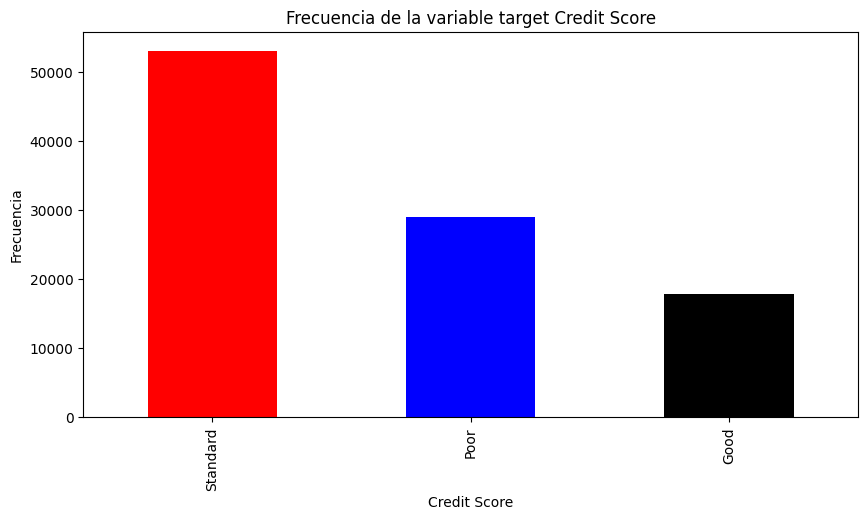

In [8]:
# Frecuencia de la variable objetivo credit_Score
credit_score_frequence = df_credit_score["Credit_Score"].value_counts()
print("La frecuencia de la variable del scoring de crédito es:\n{}".format(credit_score_frequence))

# Gráfico de barras
plt.figure(figsize=(10, 5)) 
credit_score_frequence.plot(kind='bar', color=['red', 'blue', 'black'])

# Titulos y etiquetas
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la variable target Credit Score')

Como se ve en la figura anterior, las clases están desbalanceadas.

# Preprocesado de datos

# Registros duplicados

In [9]:
# Ver si hay algún registro duplicado 
duplicated_rows = df_credit_score[df_credit_score.duplicated(subset=['ID'])]
print("Hay "+str(duplicated_rows.shape[0])+" registros duplicados")

Hay 0 registros duplicados


# Eliminación de ID y SSN

Se eliminan ambas variables dado que no van a proporcionar información predictiva en este problema.

In [10]:
# Eliminamos las variables ID y SSN ya que no aportan nada para el analisis
columns = ['ID', 'SSN']
df_credit_score = df_credit_score.drop(columns, axis=1)

# Verificamos que hay dos columnas menos en el dataframe
df_credit_score.shape

(100000, 26)

In [11]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


# Variable Name

Los registros que contengan valores nulos en esta variable, se imputarán por el nombre que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [12]:
# Variable Name (pegamos el name a traves del customer id)

# Se obtienen los nombres no nulos por Customer_ID
customer_name_id = df_credit_score.groupby('Customer_ID')['Name'].last().to_dict()

In [13]:
def impute_values_by_customer_id(df,variable,customer_name_id):

    # Iterar a través del DataFrame y actualizar los registros con 'name' nulo
    for i, j in df.iterrows():
        if pd.isnull(j[variable]):
            customer_id = j['Customer_ID']
            if customer_id in customer_name_id:
                df.at[i, variable] = customer_name_id[customer_id]
                
# Se imputan los valores de Name 
impute_values_by_customer_id(df_credit_score,'Name',customer_name_id)

In [14]:
# Ya no hay valores nulos en Name
df_credit_score[df_credit_score['Name'].isnull()]


Empty DataFrame
Columns: [Customer_ID, Month, Name, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 26 columns]

In [15]:
print(df_credit_score.isna().sum())

Customer_ID                     0
Month                           0
Name                            0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


# Annual_Income

Se convierte la variable a numérica y se detectan valores atípicos y se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por el **valor mínimo** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [16]:
# Ver si hay string con "_" en Annual_Income
df_credit_score[df_credit_score['Annual_Income'].str.contains('_')]

Customer_ID     Month             Name   Age     Occupation  \
10     CUS_0x21b1     March  Rick Rothackerj    28        Teacher   
27     CUS_0xb891     April           Jasond    55   Entrepreneur   
32     CUS_0x1cdb   January           Deepaa    21      Developer   
56     CUS_0x5407   January             Annk  7580  Media_Manager   
66     CUS_0x4157     March     Charlie Zhur    23         Doctor   
...           ...       ...              ...   ...            ...   
99959  CUS_0x2084    August            Ryanl    21      Architect   
99974   CUS_0xf16      July   Maria Sheahanb    45  Media_Manager   
99981  CUS_0xaf61      June   Chris Wickhamm    50         Writer   
99993  CUS_0x942c  February            Nicks    25       Mechanic   
99999  CUS_0x942c    August            Nicks    25       Mechanic   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
10        34847.84_            3037.986667                  2   
27        30689.89_            2612.490833                  2   
32        35547.71_            2853.309167                  7   
56        34081.38_                    NaN                  8   
66       114838.41_                    NaN                  2   
...             ...                    ...                ...   
99959     38321.39_            3106.647859                  4   
99974     16680.35_            1528.029167                  1   
99981      37188.1_            3097.008333                  1   
99993     39628.99_            3359.415833                  4   
99999     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  ... Credit_Mix Outstanding_Debt  \
10                1385              6  ...          _           605.03   
27                   5              4  ...       Good           632.46   
32                   5              5  ...   Standard           943.86   
56                   7             15  ...   Standard          1704.18   
66                   5              7  ...       Good          1377.74   
...                ...            ...  ...        ...              ...   
99959                4              3  ...          _           678.57   
99974                1              5  ...          _           897.16   
99981                4              5  ...       Good           620.64   
99993                6              7  ...       Good           502.38   
99999                6              7  ...       Good           502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
10                    33.224951   26 Years and 9 Months                    No   
27                    38.132348   17 Years and 6 Months                    No   
32                    39.797764   30 Years and 8 Months                   Yes   
56                    24.448063                     NaN                    NM   
66                    35.141567   21 Years and 6 Months                    NM   
...                         ...                     ...                   ...   
99959                 28.951691   17 Years and 6 Months                    No   
99974                 36.166925   21 Years and 7 Months                    No   
99981                 37.753013   30 Years and 2 Months                    NM   
99993                 29.135447   31 Years and 4 Months                    No   
99999                 34.192463  31 Years and 10 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
10               18.816215       58.51597569589465   
27               16.415452       272.3340373956682   
32                0.000000      276.72539431736266   
56               70.478333       162.4410091967751   
66              226.892792       470.3857956796373   
...                    ...                     ...   
99959           362.072453       259.1356349754664   
99974            41.113561                     NaN   
99981            84.205949      147.339907866539

In [17]:
# Eliminar el caracter('_') de la columna 'Annual_Income' y la convertimos a numerica
df_credit_score['Annual_Income'] = df_credit_score['Annual_Income'].str.replace('_', '')
# Convertir la columna 'annual_income' a tipo numérico
df_credit_score['Annual_Income'] = pd.to_numeric(df_credit_score['Annual_Income'])


In [18]:
# Tipos de las variables de este dataframe
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


# Outliers

In [19]:
values_uniques = df_credit_score['Annual_Income'].unique()
values_uniques.sort()
print(values_uniques)

[7.0059300e+03 7.0060350e+03 7.0065200e+03 ... 2.4177153e+07 2.4188807e+07
 2.4198062e+07]


In [20]:
def plot_violin_hist_feature(df,feature,violin=True):

    if(violin):
        fig, axes = plt.subplots(1,2,figsize=(15, 9)) 
        sns.violinplot(x=df[feature], ax=axes[0],color=np.random.rand(3,))  
        axes[0].set_title(f'{feature}')
        
        sns.histplot(x=df[feature], ax=axes[1],color=np.random.rand(3,),log_scale=False)  
        axes[1].set_title(f'{feature}')
    else:
        fig, axes = plt.subplots(1,1,figsize=(7,4))
        sns.histplot(x=df[feature],color=np.random.rand(3,),log_scale=False)  
        axes.set_title(f'{feature}')

    
    plt.tight_layout()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


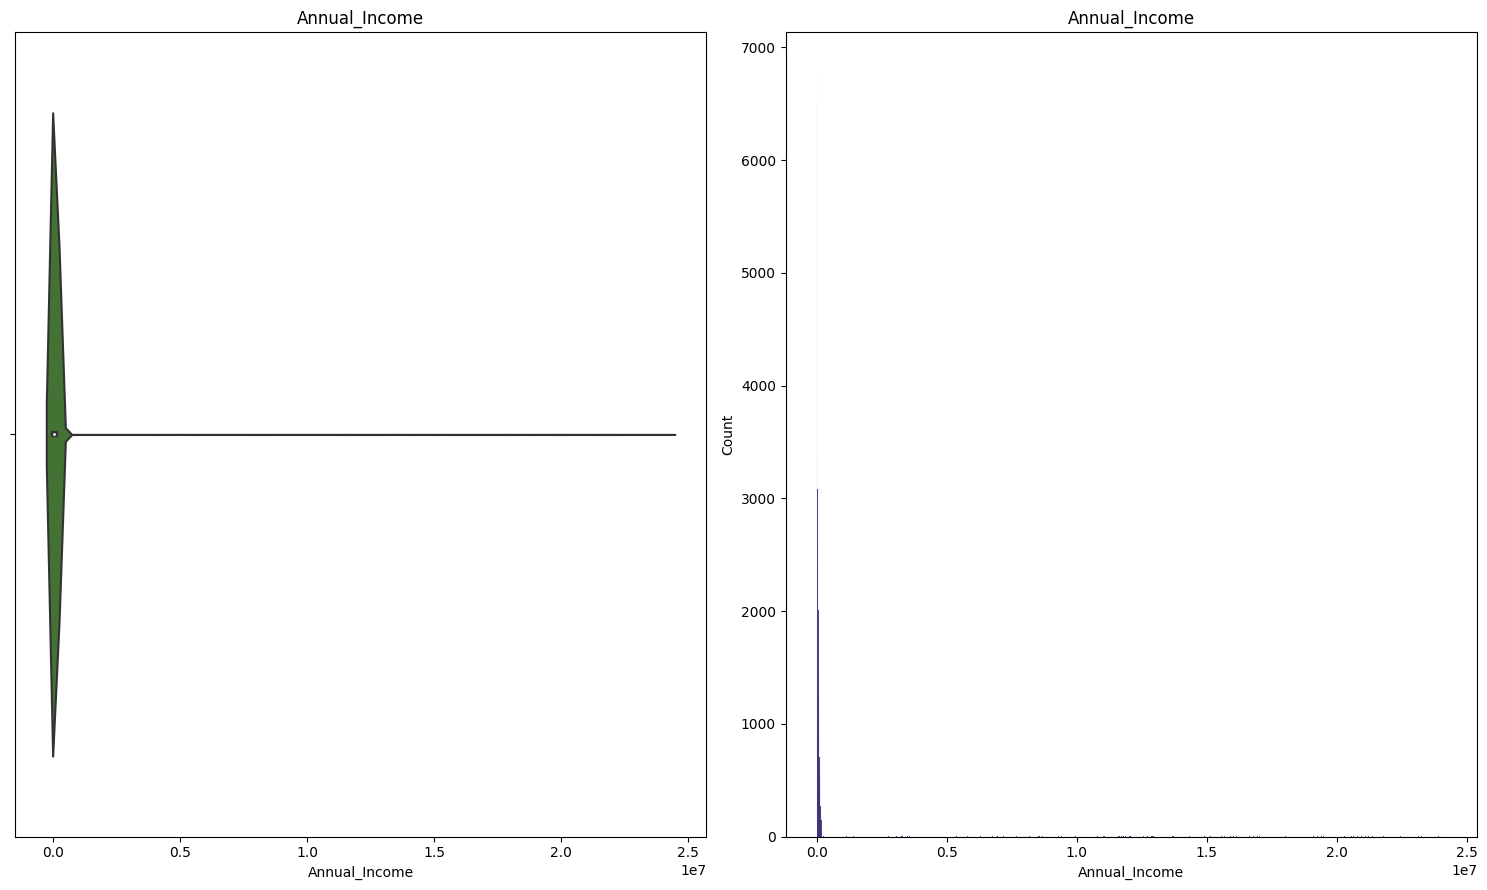

In [21]:
plot_violin_hist_feature(df_credit_score,'Annual_Income')

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


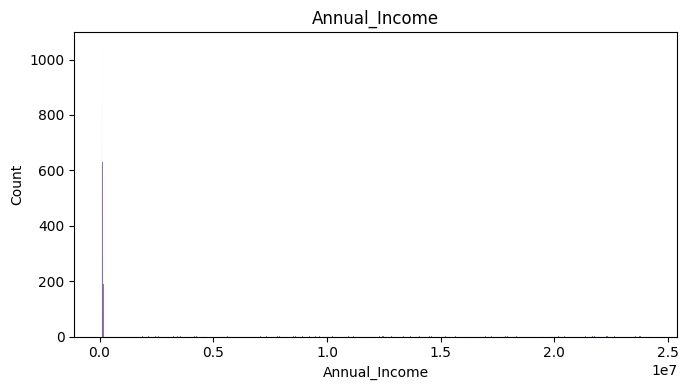

In [22]:
# Se filtran los valores superiores a 100000
values_sup_100000 = df_credit_score[(df_credit_score['Annual_Income'] >=100000)]
plot_violin_hist_feature(values_sup_100000,'Annual_Income',violin=False)

In [23]:
# Se identifican las filas que contengan los outliers de Annual_Income
rows_with_outliers = (df_credit_score['Annual_Income'] >=180000)

In [24]:
def update_outliers_by_min(df,variable,rows_with_outliers):

    # Se asignan valores nulos a esos registros
    df.loc[rows_with_outliers, variable] = pd.NA

    # Imputamos los valores nulos por el mínimo de la variable y por customer id
    # Iterar a través del DataFrame y actualizar los registros con la variable a nulo
    for i, j in df.iterrows():
        if pd.isnull(j[variable]):
            customer_id = j['Customer_ID']
        
            # Filtra df para obtener todos los registros con el mismo 'Customer_ID' y la variable no nulos
            rows_same_customer_id = df[(df['Customer_ID'] == customer_id) & (df[variable].notnull())]
            if not rows_same_customer_id.empty:
                # Mínimo de 'Variable'
                min_variable = rows_same_customer_id[variable].min()
                df.at[j.name, variable] = min_variable
                
# Se actualizan los outliers de 
update_outliers_by_min(df_credit_score,'Annual_Income',rows_with_outliers)

In [25]:
print(df_credit_score.isna().sum())

Customer_ID                     0
Month                           0
Name                            0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [26]:
values_uniques = df_credit_score['Annual_Income'].unique()
values_uniques.sort()
print(values_uniques)

[  7005.93    7006.035   7006.52  ... 179825.36  179948.84  179987.28 ]


Se vuelve a ver la distribucion de la variable

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


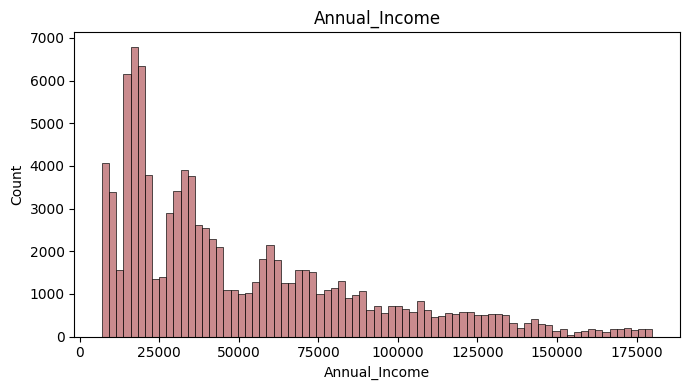

In [27]:
plot_violin_hist_feature(df_credit_score,'Annual_Income',violin=False)

# Variable Monthly_Inhand_Salary

Los nulos de esta variable se imputarán por los valores no nulos de los registros que tienen el mismo sueldo anual.

In [28]:
values_uniques = df_credit_score['Monthly_Inhand_Salary'].unique()
values_uniques.sort()
print(values_uniques)

[  303.64541667   319.55625      332.12833333 ... 15167.18
 15204.63333333            nan]


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


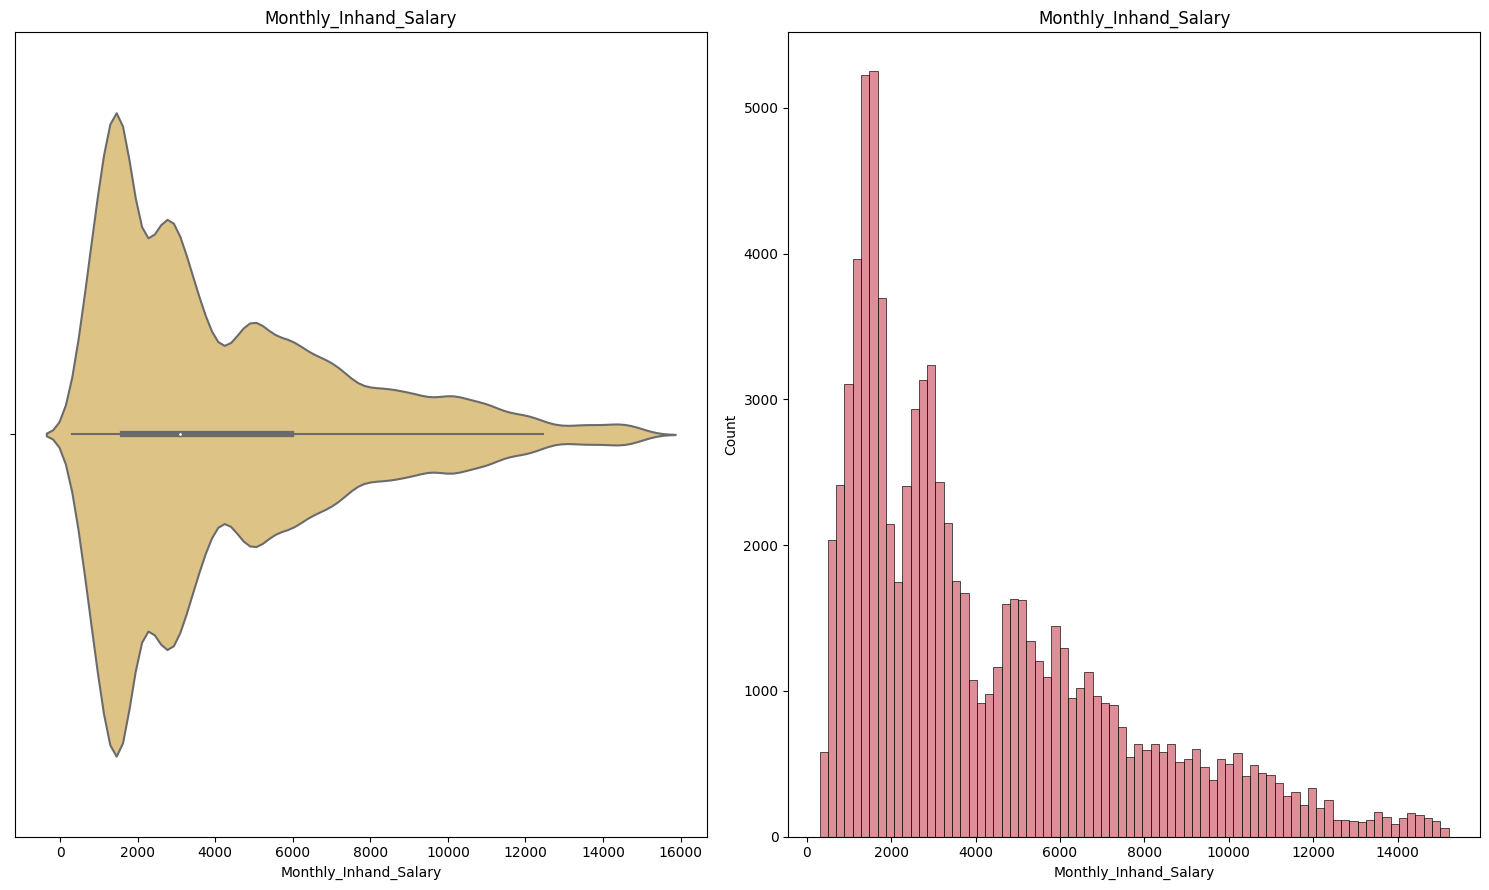

In [29]:
plot_violin_hist_feature(df_credit_score,'Monthly_Inhand_Salary',violin=True)

No tomamos outliers en esta variable.

In [30]:
# Variable Monthly_Inhand_Salary (pegamos el Monthly_Inhand_Salary a traves del Annual_Income)

# Se obtienen los sueldos mensuales no nulos por Annual_Income
customer_monthly_inhand_salary_annual_income = df_credit_score.groupby('Annual_Income')['Monthly_Inhand_Salary'].last().to_dict()

In [31]:
def impute_values_salary_monthly_by_annual(df,variable,customer_monthly_inhand_salary_annual_income):

    # Iterar a través del DataFrame y actualizar los registros con 'name' nulo
    for i, j in df.iterrows():
        if pd.isnull(j[variable]):
            annual_income = j['Annual_Income']
            if annual_income in customer_monthly_inhand_salary_annual_income:
                df.at[i, variable] = customer_monthly_inhand_salary_annual_income[annual_income]
                
# Se imputan los valores de Name 
impute_values_salary_monthly_by_annual(df_credit_score,'Monthly_Inhand_Salary',customer_monthly_inhand_salary_annual_income)


In [32]:
# Ya no hay nulos en Monthly_Inhand_Salary
df_credit_score[df_credit_score['Monthly_Inhand_Salary'].isnull()]

Empty DataFrame
Columns: [Customer_ID, Month, Name, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 26 columns]

In [33]:
print(df_credit_score.isna().sum())

Customer_ID                     0
Month                           0
Name                            0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


# Variable Num Of Loan

Se convierte la variable a numérica y se detectan valores atípicos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [34]:
# Ver si hay string con "_"
df_credit_score[df_credit_score['Num_of_Loan'].notnull() & df_credit_score['Num_of_Loan'].str.contains('_')]

Customer_ID     Month              Name   Age     Occupation  \
37     CUS_0x1cdb      June            Deepaa    21      Developer   
80     CUS_0xa66b   January           Saphirj    40        Teacher   
84     CUS_0xa66b       May           Saphirj    40        Teacher   
94     CUS_0xc0ab      July          Soyoungd    33       Engineer   
119     CUS_0xff4    August         Poornimaf    37   Entrepreneur   
...           ...       ...               ...   ...            ...   
99918  CUS_0x1619      July       Phil Wahbao    54  Media_Manager   
99937  CUS_0xad4f  February  Sabina Zawadzkig  -500        _______   
99940  CUS_0xad4f       May  Sabina Zawadzkig    47      Developer   
99958  CUS_0x2084      July             Ryanl    21      Architect   
99984  CUS_0x8600   January    Sarah McBridec    28      Architect   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
37          35547.71            2853.309167                  7   
80          33751.27            2948.605833                  5   
84          33751.27            2948.605833                  5   
94          88640.24            7266.686667                  3   
119         25546.26            2415.855000                  8   
...              ...                    ...                ...   
99918       20059.98            1523.665000                  8   
99937       22620.79            1722.065833                  7   
99940       22620.79            1722.065833                  7   
99958       38321.39            3106.647859                  4   
99984       20002.88            1929.906667                 10   

       Num_Credit_Card  Interest_Rate  ... Credit_Mix Outstanding_Debt  \
37                   5              5  ...   Standard           943.86   
80                   5             20  ...   Standard          1328.93   
84                   5             20  ...   Standard          1328.93   
94                   6              1  ...          _           950.36   
119                  7             14  ...   Standard           758.44   
...                ...            ...  ...        ...              ...   
99918                5             12  ...       Good           909.01   
99937                3              9  ...   Standard           642.46   
99940                3              9  ...   Standard           642.46   
99958                4              3  ...       Good           678.57   
99984                8             29  ...        Bad          3571.7_   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
37                    29.217556   31 Years and 1 Months                   Yes   
80                    37.089076   19 Years and 2 Months                    NM   
84                    29.073758   19 Years and 6 Months                   Yes   
94                    25.979173  25 Years and 11 Months                    No   
119                   39.333488   18 Years and 9 Months                   Yes   
...                         ...                     ...                   ...   
99918                 37.619516   16 Years and 9 Months                    No   
99937                 31.841872                     NaN                    No   
99940                 37.450793   29 Years and 7 Months                    No   
99958                 28.360351   17 Years and 5 Months                    No   
99984                 22.895966    5 Years and 8 Months                   Yes   

       Total_EMI_per_month Amount_invested_monthly  \
37                0.000000       37.64363788963997   
80               65.008174      117.30669710658556   
84               65.008174      243.32968479530567   
94            80357.000000       164.0748218779106   
119             101.328637      189.81586133347676   
...                    ...                     ...   
99918            45.076827       72.16622965635719   
99937             0.000000      105.07629339039072   
99940             0.0000

In [35]:
# Eliminar el caracter('_') de la columna 'Num_of_Loan' y la convertimos a numerica
df_credit_score['Num_of_Loan'] = df_credit_score['Num_of_Loan'].str.replace('_', '')
# Convertir la columna 'annual_income' a tipo numérico
df_credit_score['Num_of_Loan'] = pd.to_numeric(df_credit_score['Num_of_Loan'])


In [36]:
# Tipos de las variables de este dataframe
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


# Outliers Variable Loan

In [37]:
values_uniques = df_credit_score['Num_of_Loan'].unique()
values_uniques.sort()
print(values_uniques)

[-100    0    1    2    3    4    5    6    7    8    9   17   18   19
   23   27   29   31   32   33   39   41   49   50   52   54   55   56
   58   65   70   78   83   84   87   89   92   95  100  101  103  119
  123  126  131  132  136  137  138  141  143  146  147  148  153  157
  164  172  174  182  186  190  191  192  193  196  198  201  208  215
  216  217  227  228  229  231  235  237  238  241  242  243  251  252
  254  267  274  275  280  282  284  285  288  289  290  291  292  295
  300  302  311  313  316  319  321  323  329  330  332  336  341  344
  348  349  350  351  352  359  365  372  378  387  392  394  404  405
  415  416  418  420  424  430  433  437  438  439  444  447  449  455
  457  462  463  464  466  472  484  492  494  497  501  504  507  510
  515  520  526  527  529  538  540  545  546  548  562  563  571  574
  579  581  590  596  597  601  606  613  614  617  621  622  628  629
  630  633  635  636  638  639  640  649  652  653  654  656  657  659
  661 

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


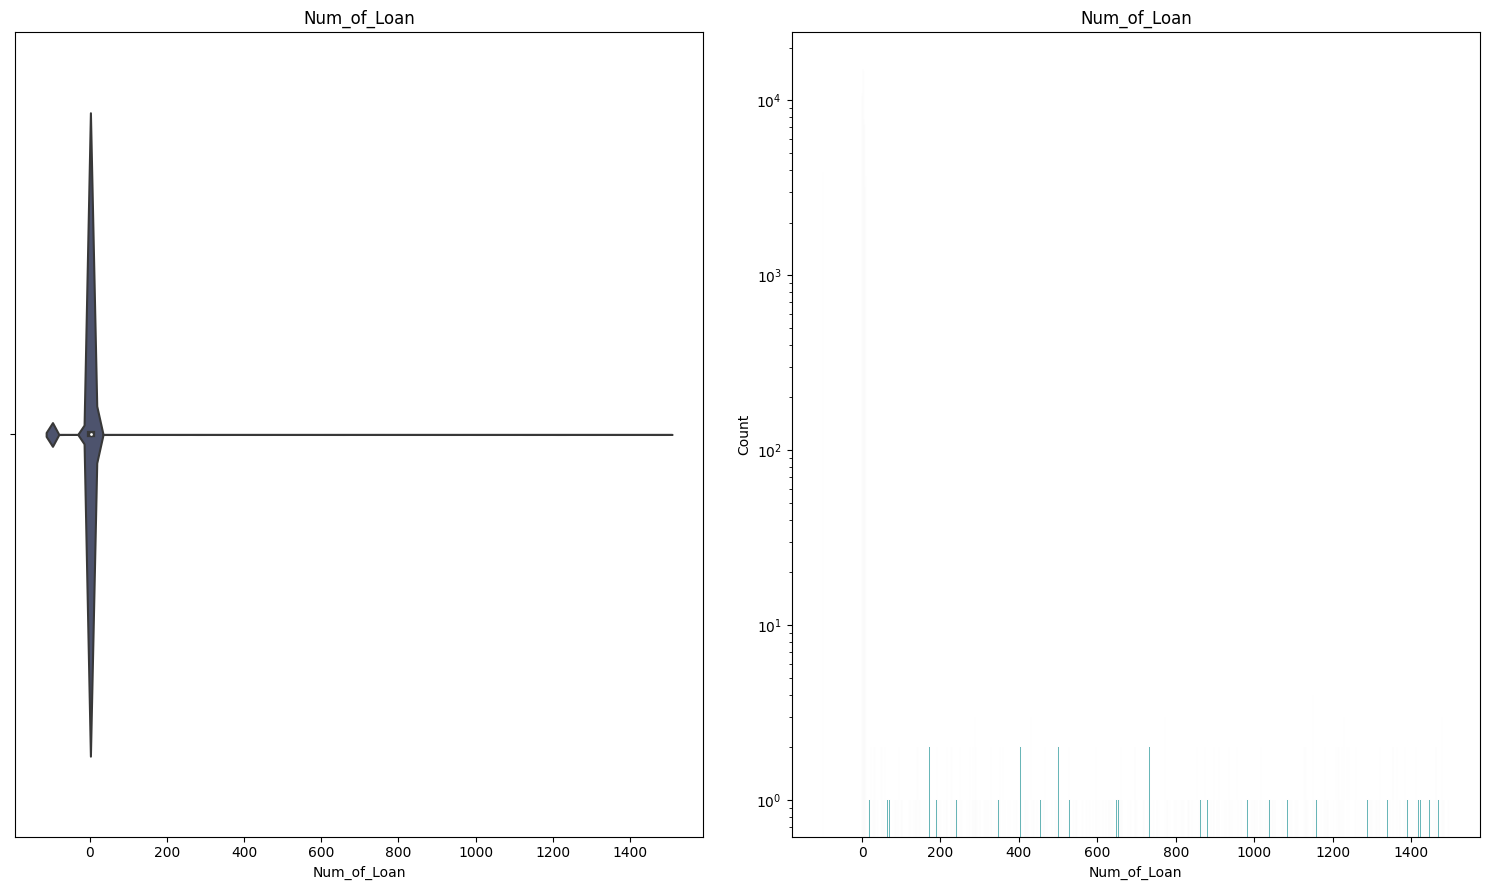

In [38]:
plot_violin_hist_feature(df_credit_score,'Num_of_Loan')
plt.yscale('log')  # Cambiar a escala logarítmica el eje y
plt.show()

In [39]:
# Se filtran los valores negativos y superiores a 10
values_outliers = df_credit_score[(df_credit_score['Num_of_Loan'] >= 10) | (df_credit_score['Num_of_Loan'] == -100)]



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


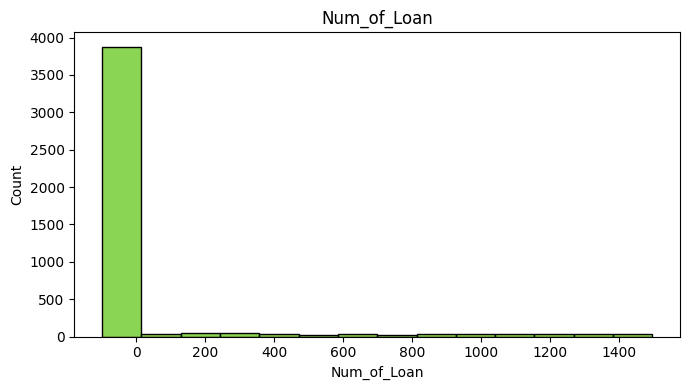

In [40]:
plot_violin_hist_feature(values_outliers,'Num_of_Loan',violin=False)

In [41]:
# Se identifican las filas que contengan outliers
rows_with_outliers = (df_credit_score['Num_of_Loan'] >= 17) | (df_credit_score['Num_of_Loan'] == -100)

In [42]:
def update_outliers_by_mode(df,variable,rows_with_outliers,outliers=True):

    if(outliers):
        # Se asignan valores nulos a esos registros
        df.loc[rows_with_outliers, variable] = pd.NA

    # Imputamos los valores nulos por la moda de la variable y por customer id
    # Iterar a través del DataFrame y actualizar los registros con la variable a nulo
    for i, j in df.iterrows():
        if pd.isnull(j[variable]):
            customer_id = j['Customer_ID']
        
            # Filtra df para obtener todos los registros con el mismo 'Customer_ID' y la variable no nulos
            rows_same_customer_id = df[(df['Customer_ID'] == customer_id) & (df[variable].notnull())]
            if not rows_same_customer_id.empty:
                # Moda de 'Changed_Credit_Limit'
                mode_variable = statistics.mode(rows_same_customer_id[variable])
                df.at[j.name, variable] = mode_variable
                
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Num_of_Loan',rows_with_outliers)

In [43]:
# Convertir la columna 'Num_of_Loan' a tipo entero
df_credit_score['Num_of_Loan'] = df_credit_score['Num_of_Loan'].astype(int)

In [44]:
valores_uniques = df_credit_score['Num_of_Loan'].unique()
valores_uniques.sort()
print(valores_uniques)

[0 1 2 3 4 5 6 7 8 9]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


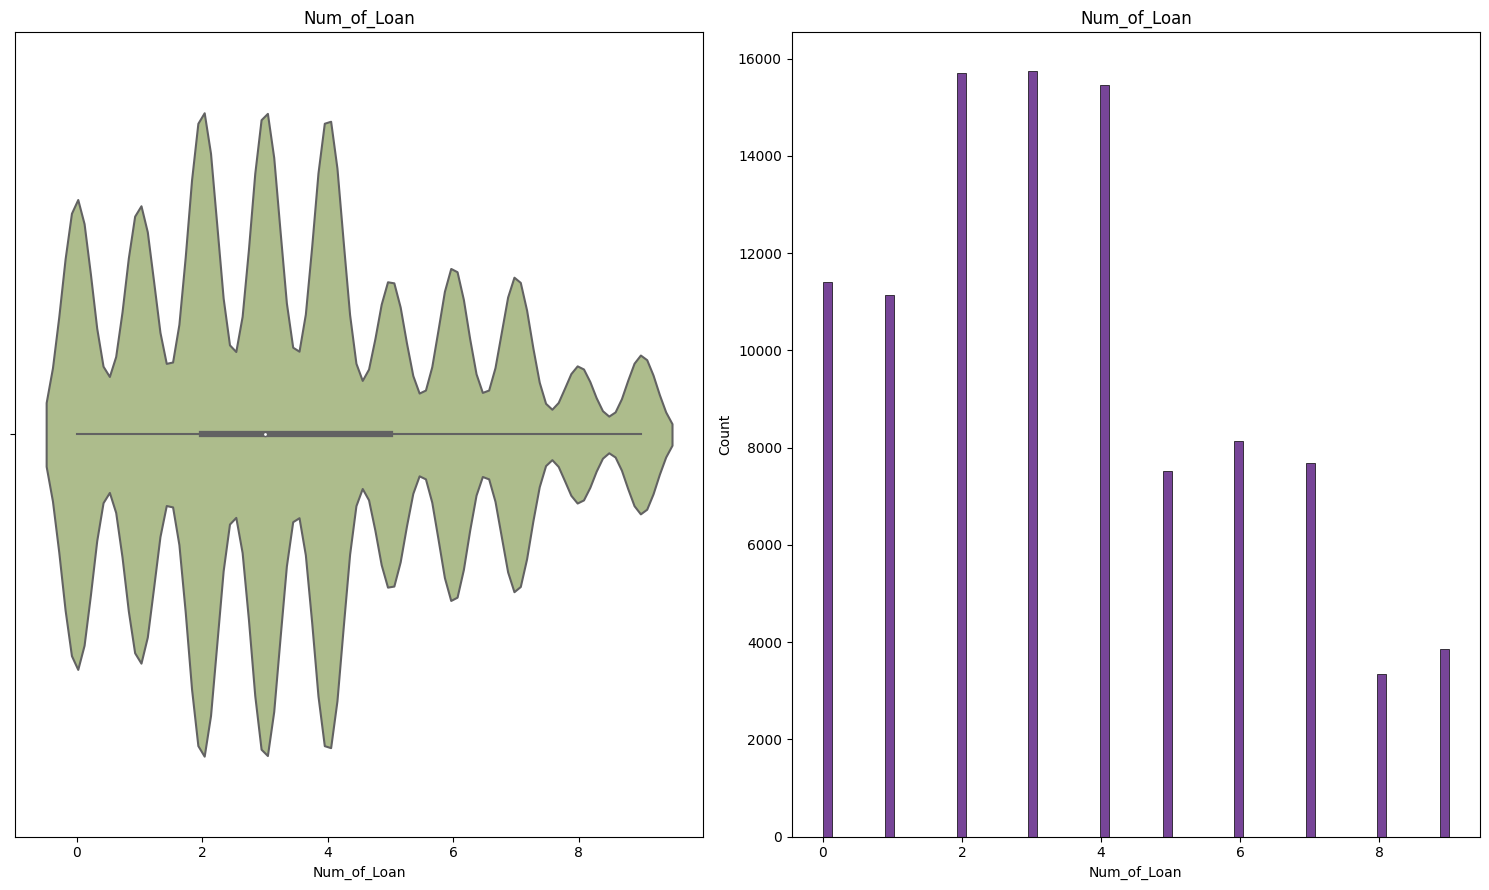

In [45]:
plot_violin_hist_feature(df_credit_score,'Num_of_Loan')

# Variable Type Of Loan

Los registros con valor Num of loan a cero le asigno el string 'none loan' al campo type_of_loan.

Los registros que contengan valores nulos en esta variable, se imputarán por el tipo de préstamos que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [46]:
# Se filtran los registros donde 'Num_of_Loan' es igual a cero y se actualiza el 'Type_of_Loan' a 'None'
df_credit_score.loc[df_credit_score['Num_of_Loan'] == 0, 'Type_of_Loan'] = 'None Loan'

In [47]:
# Variable Type_of_Loan  (pegamos el Type_of_Loan a traves del customer id)

# # Se obtienen los Type_of_Loan no nulos por Customer_ID
customer_type_of_loan_id = df_credit_score.groupby('Customer_ID')['Type_of_Loan'].last().to_dict()

In [48]:
# Se imputan los valores 
impute_values_by_customer_id(df_credit_score,'Type_of_Loan',customer_type_of_loan_id)

In [49]:
# Convertir la columna 'Type_of_Loan' a tipo string
df_credit_score['Type_of_Loan'] = df_credit_score['Type_of_Loan'].astype(str)

In [50]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                    0
Month                          0
Name                           0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64


# Variable Num of delayed payment

Se convierte la variable a numérica y se detectan valores atípicos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [51]:
# Eliminar el caracter('_') de la columna 'Num_of_Delayed_Payment' y la convertimos a numerica
df_credit_score['Num_of_Delayed_Payment'] = df_credit_score['Num_of_Delayed_Payment'].str.replace('_', '')
# Convertir la columna 'Num_of_Delayed_Payment' a tipo numérico
df_credit_score['Num_of_Delayed_Payment'] = pd.to_numeric(df_credit_score['Num_of_Delayed_Payment'])

In [52]:
# Tipos de las variables de este dataframe
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


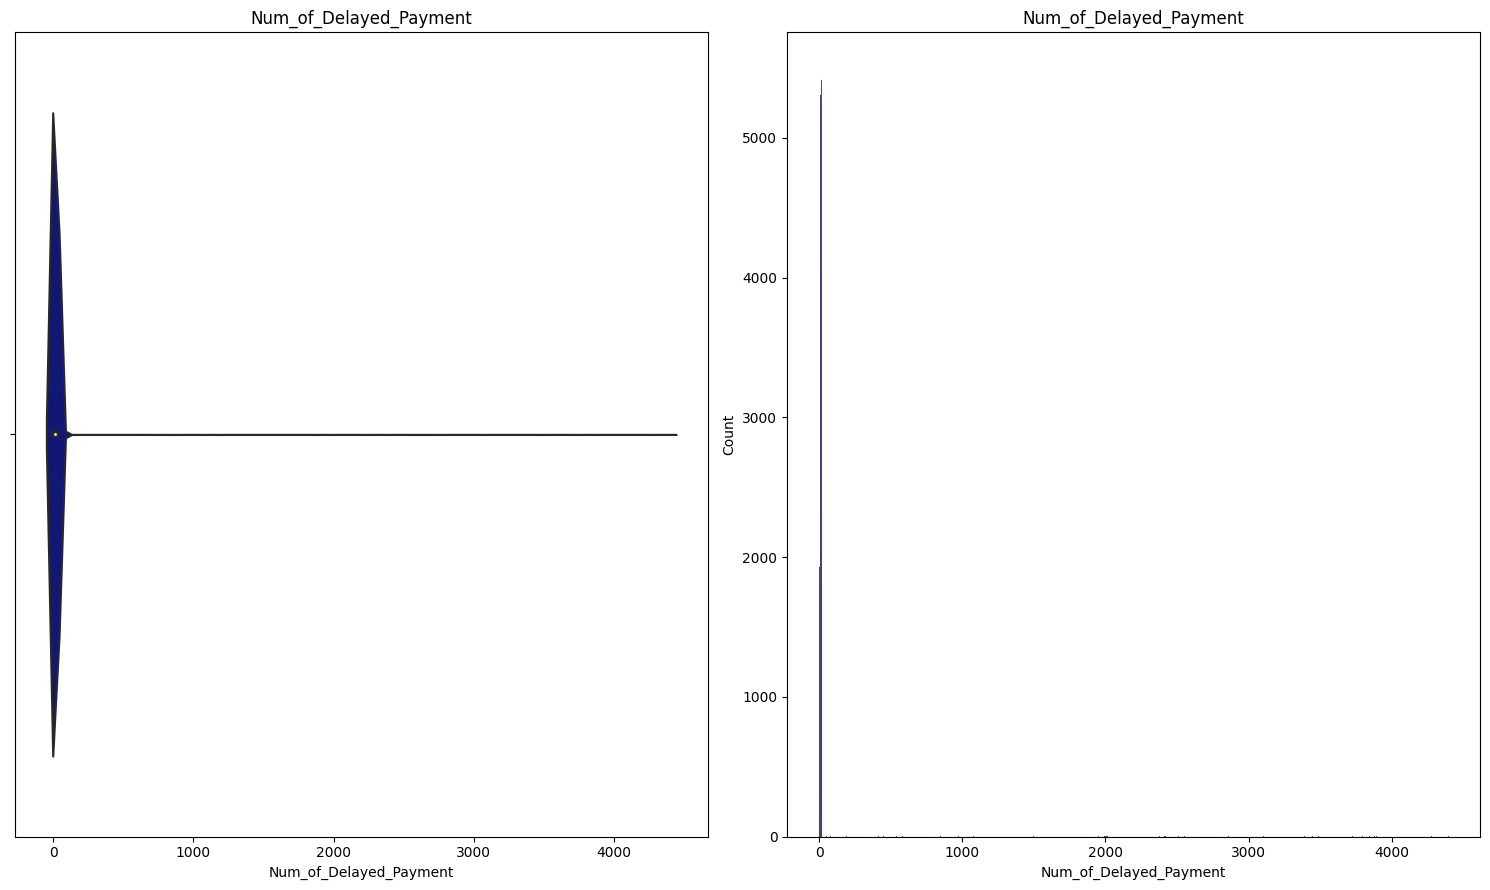

In [53]:
plot_violin_hist_feature(df_credit_score,'Num_of_Delayed_Payment')

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


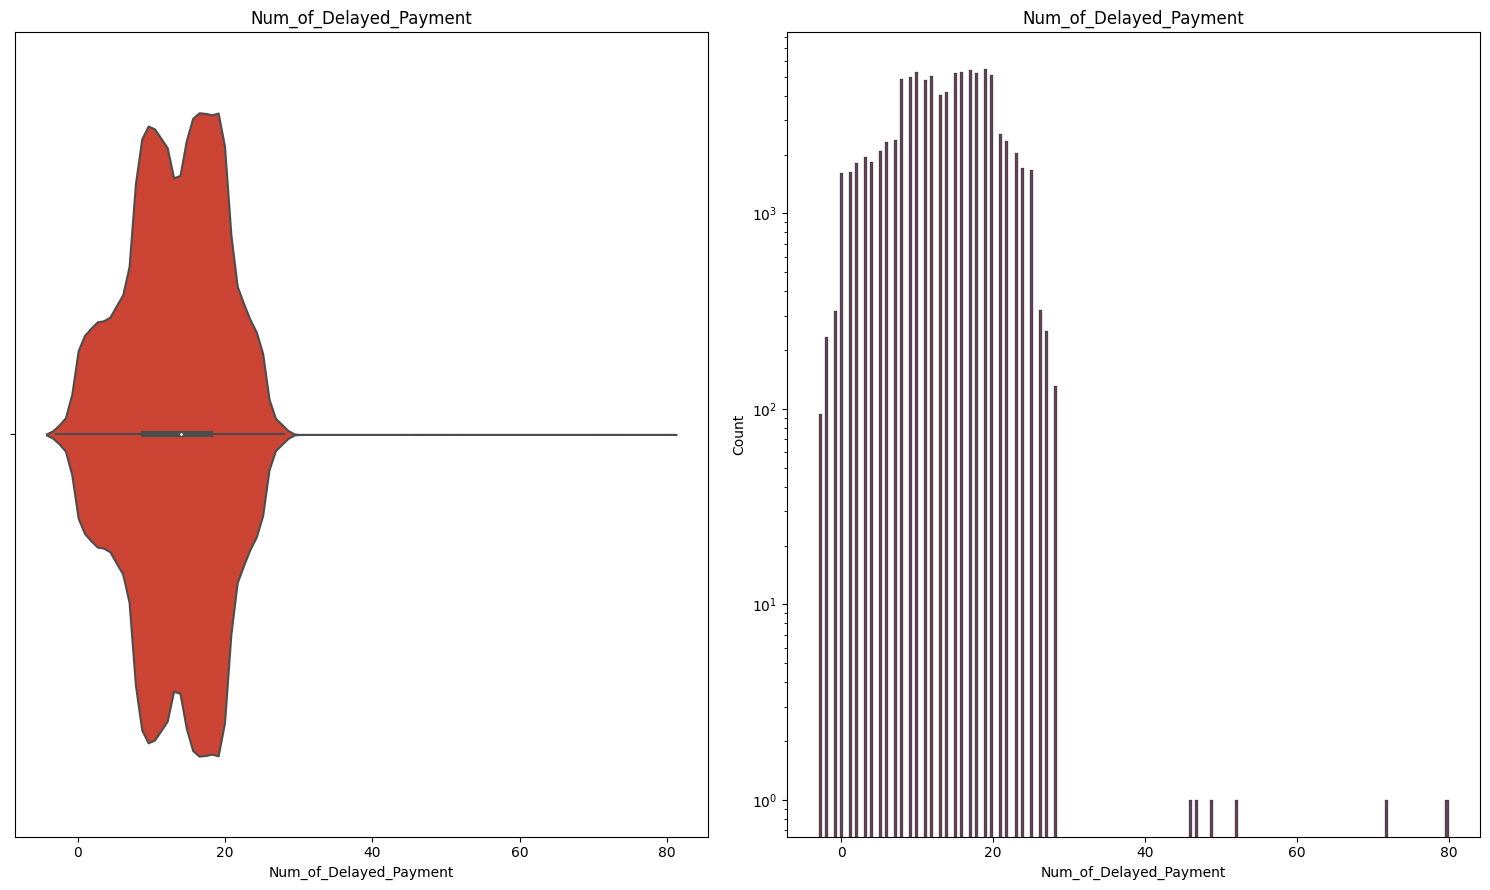

In [54]:
# Se filtran los valores inferiores a 80
values_inf_80 = df_credit_score[(df_credit_score['Num_of_Delayed_Payment'] <=80)]
plot_violin_hist_feature(values_inf_80,'Num_of_Delayed_Payment')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()


Se ve como a partir de 40 la frecuencia es muy prácticamente nula.

In [55]:
# Se identifican las filas que consideramos outliers
rows_with_outliers = (df_credit_score['Num_of_Delayed_Payment']>=46) | (df_credit_score['Num_of_Delayed_Payment'] < 0)

In [56]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Num_of_Delayed_Payment',rows_with_outliers)

In [57]:
# Convertir la columna 'Num_of_Delayed_Payment' a entero
df_credit_score['Num_of_Delayed_Payment'] = df_credit_score['Num_of_Delayed_Payment'].astype(int)

In [58]:
valores_uniques = df_credit_score['Num_of_Delayed_Payment'].unique()
valores_uniques.sort()
print(valores_uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


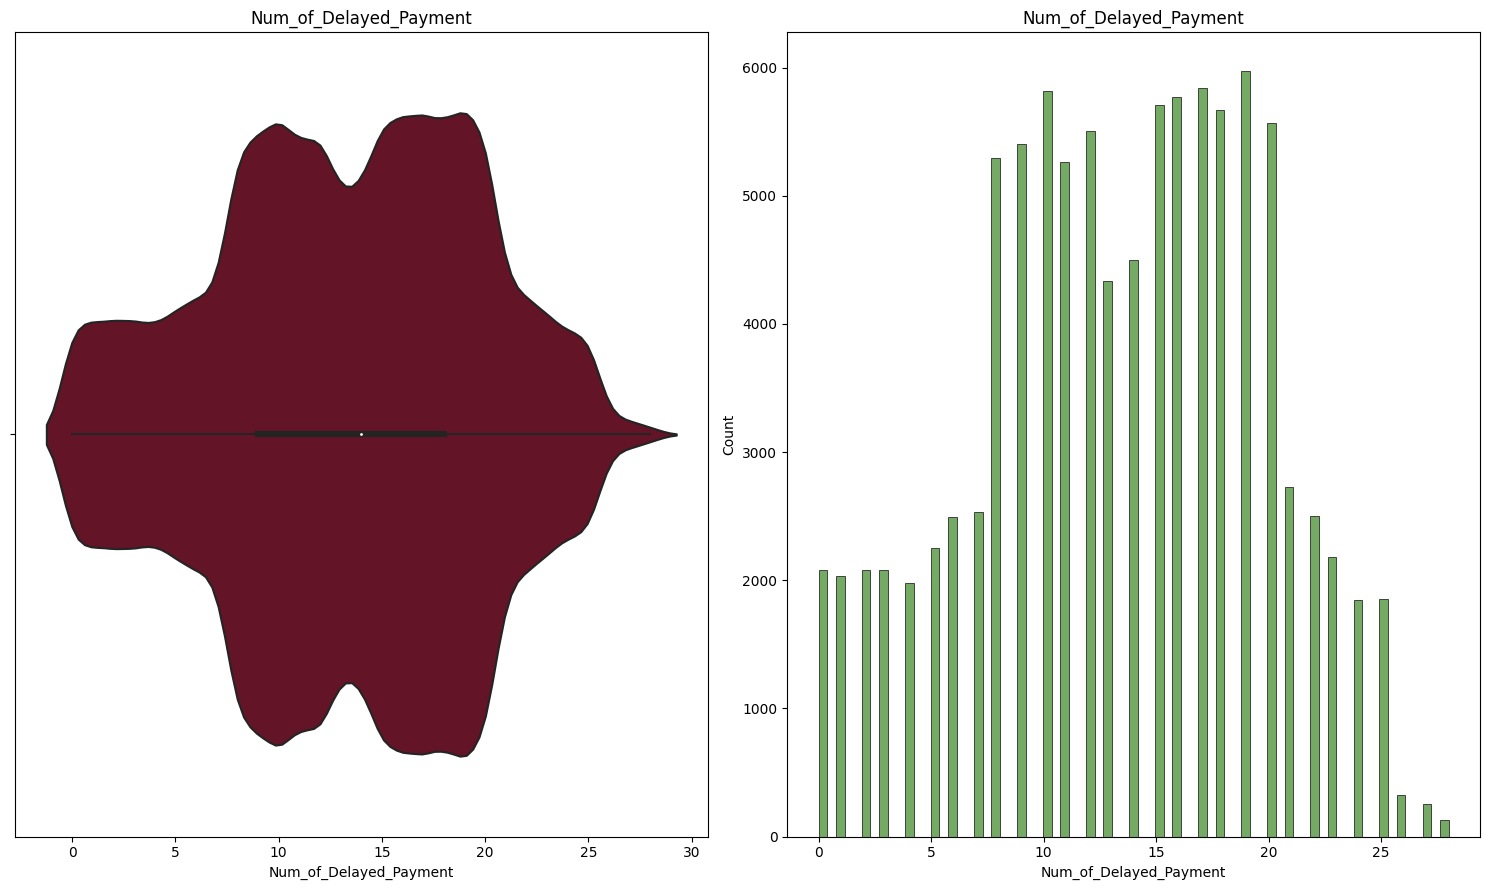

In [59]:
plot_violin_hist_feature(df_credit_score,'Num_of_Delayed_Payment')

# NUM CREDIT INQUIRIES

Se detectan valores atípicos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [60]:
valores_uniques = df_credit_score['Num_Credit_Inquiries'].unique()
valores_uniques.sort()
print(valores_uniques)

[0.000e+00 1.000e+00 2.000e+00 ... 2.594e+03 2.597e+03       nan]


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


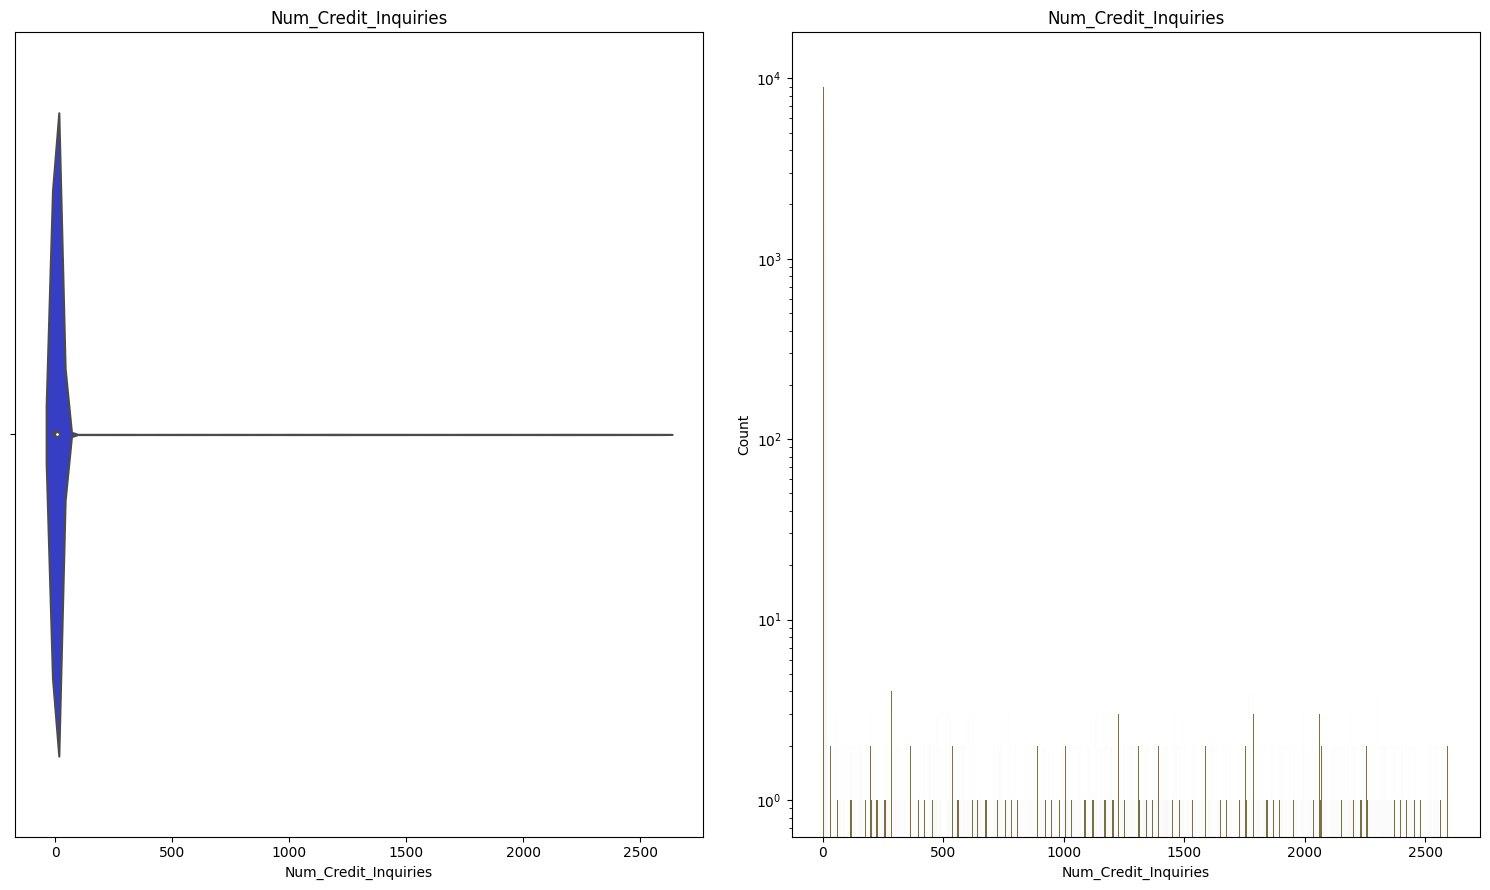

In [61]:
plot_violin_hist_feature(df_credit_score,'Num_Credit_Inquiries')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


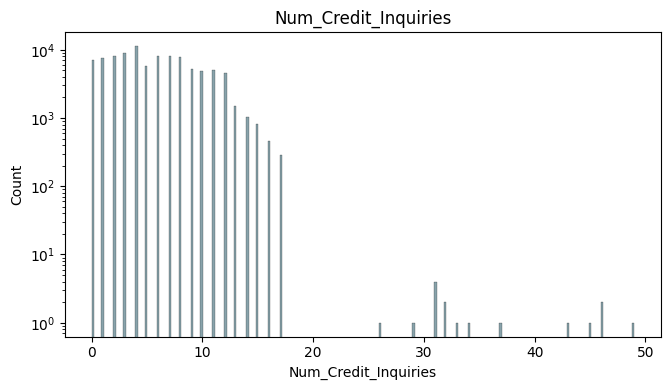

In [62]:
# Se filtran los valores inferiores a 50
values_inf_50 = df_credit_score[(df_credit_score['Num_Credit_Inquiries'] <= 50)]
plot_violin_hist_feature(values_inf_50,'Num_Credit_Inquiries',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()


Se ve como a partir de 25 la frecuencia es muy prácticamente nula.

In [63]:
# Se identifican las filas que consideramos outliers 
rows_with_outliers = (df_credit_score['Num_Credit_Inquiries']>=26)

In [64]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Num_Credit_Inquiries',rows_with_outliers)

In [65]:
# Convertir la columna 'Num_Credit_Inquiries' a tipo numérico
df_credit_score['Num_Credit_Inquiries'] = df_credit_score['Num_Credit_Inquiries'].astype(int)

In [66]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


In [67]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                    0
Month                          0
Name                           0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64


In [68]:
valores_uniques = df_credit_score['Num_Credit_Inquiries'].unique()
valores_uniques.sort()
print(valores_uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


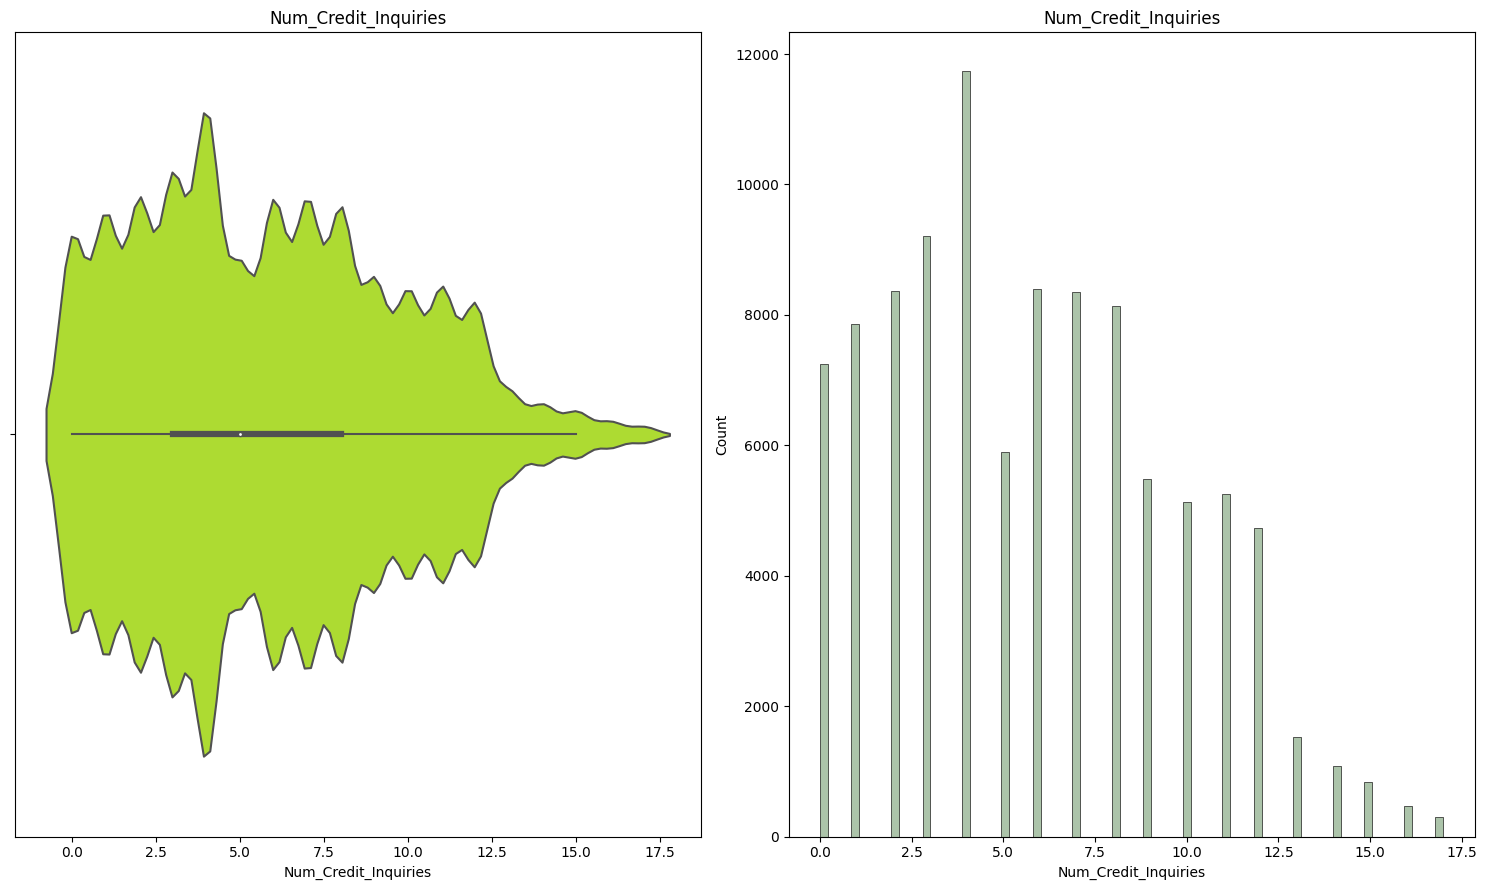

In [69]:
plot_violin_hist_feature(df_credit_score,'Num_Credit_Inquiries')

# Credit_History_Age          

Vamos a pasar el x Years and x Months a entero, y serán el número de meses.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

# Imputar valores nulos

In [70]:
# Se imputan los nulos 
update_outliers_by_mode(df_credit_score,'Credit_History_Age',rows_with_outliers,outliers=False)

In [71]:
# Se extran los valores del año y de los meses de la variable Credit_History_Age
extracted_values = df_credit_score['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months')

# Se convierten los valores anteriores en un entero que serán los meses totales de antiguedad de credito
df_credit_score['Credit_History_Age'] = (extracted_values[0].astype(int) * 12) + extracted_values[1].astype(int)

# Outliers

In [72]:
valores_outliers = df_credit_score['Credit_History_Age'].unique()
valores_outliers.sort()
print(valores_outliers)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


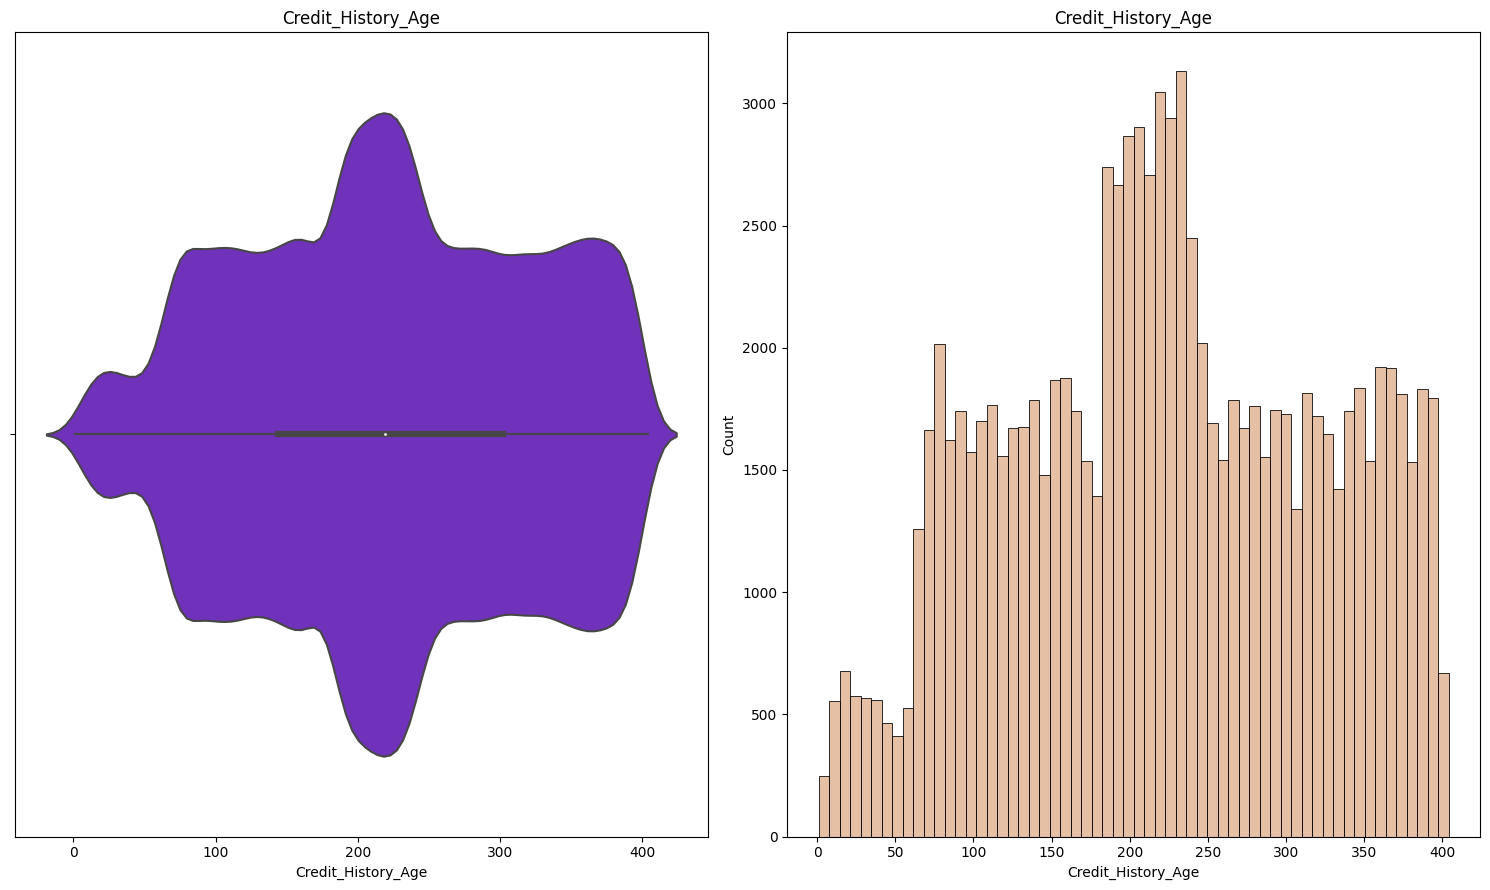

In [73]:
plot_violin_hist_feature(df_credit_score,'Credit_History_Age')
#plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
#plt.show()

No considero outliers en esta variable.

In [74]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                    0
Month                          0
Name                           0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64


In [75]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


# Amount_invested_monthly 

Se convierte la variable a numérica, se detectan valores atípicos e incorrectos (valor **--10000--**),  se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **media** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.


In [76]:
# Ver si hay string con "_"
df_credit_score[df_credit_score['Amount_invested_monthly'].notnull() & df_credit_score['Amount_invested_monthly'].str.contains('_')]


Customer_ID     Month              Name Age     Occupation  \
18     CUS_0x2dbc     March            Langep  34        _______   
23     CUS_0x2dbc    August            Langep  34       Engineer   
28     CUS_0xb891       May            Jasond  55   Entrepreneur   
121    CUS_0x33d2  February         Chalmersa  30      Scientist   
142     CUS_0xfdb      July          Patrickg  46        Teacher   
...           ...       ...               ...  ..            ...   
99879  CUS_0x3855    August             Xolai  27      Scientist   
99882  CUS_0x47fa     March  Yantoultra Nguif  31       Mechanic   
99919  CUS_0x1619    August       Phil Wahbao  54  Media_Manager   
99951  CUS_0x51b3    August             Ryana  33  Media_Manager   
99973   CUS_0xf16      June    Maria Sheahanb  45  Media_Manager   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
18         143162.64           12187.220000                  1   
23         143162.64           12187.220000                  1   
28          30689.89            2612.490833                  2   
121         31993.78            2942.148333                  6   
142         32284.62            2898.385000                  6   
...              ...                    ...                ...   
99879      118677.54            9963.795000                  4   
99882       64511.34            5440.945000                  7   
99919       20059.98            1523.665000                  8   
99951       59146.36            4908.863333                  3   
99973       16680.35            1528.029167                  1   

       Num_Credit_Card  Interest_Rate  ...  Credit_Mix Outstanding_Debt  \
18                   5              8  ...        Good          1303.01   
23                   5              8  ...        Good          1303.01   
28                   5              4  ...        Good           632.46   
121                  6              7  ...    Standard           818.22   
142                  7             17  ...    Standard         1283.37_   
...                ...            ...  ...         ...              ...   
99879                4              6  ...        Good           995.47   
99882                3           1947  ...    Standard            330.6   
99919                5             12  ...        Good           909.01   
99951                6              6  ...        Good           418.03   
99973                1              5  ...        Good           897.16   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
18                    26.519815                 215                    No   
23                    38.374753                 220                    No   
28                    41.154317                 211                    No   
121                   37.958569                 203                   Yes   
142                   24.205533                  83                   Yes   
...                         ...                 ...                   ...   
99879                 39.747228                 366                    No   
99882                 38.524095                 276                   Yes   
99919                 32.473773                 202                    No   
99951                 27.682186                 248                    No   
99973                 24.972853                 258                    No   

       Total_EMI_per_month Amount_invested_monthly  \
18              246.992319               __10000__   
23              246.992319               __10000__   
28               16.415452               __10000__   
121              45.141298               __10000__   
142             103.037560               __10000__   
...                    ...                     ...   
99879           237.106366               __10000__   
99882             0.000000               __10000__   
99919            45.076827               __10000__   
99951            26.778419    

In [77]:
# Se guardan los registros que contienen el carácter "_" en Amount_invested_monthly
rows_with_characters = df_credit_score['Amount_invested_monthly'].str.contains('_',na=False)
# Se asignan valores nulos a esos registros
df_credit_score.loc[rows_with_characters, 'Amount_invested_monthly'] = pd.NA

In [78]:
# Convertir la columna 'Amount_invested_monthly' a tipo numérico
df_credit_score['Amount_invested_monthly'] = pd.to_numeric(df_credit_score['Amount_invested_monthly'])

In [79]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


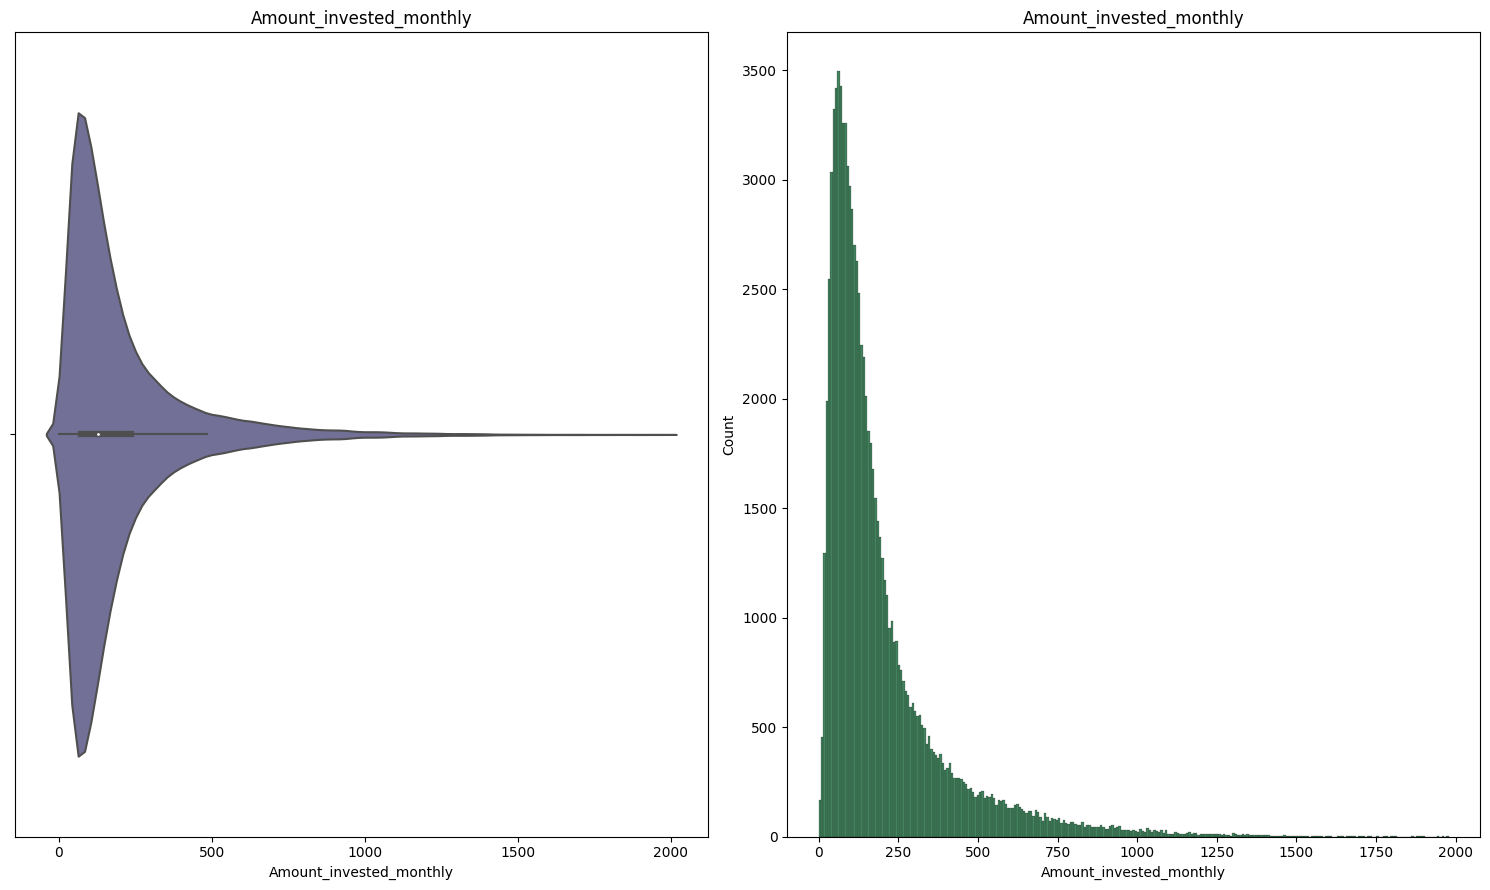

In [80]:
plot_violin_hist_feature(df_credit_score,'Amount_invested_monthly')


In [81]:
valores_uniques = df_credit_score['Amount_invested_monthly'].unique()
valores_uniques.sort()
print(valores_uniques)

[   0.           10.01019426   10.0114248  ... 1961.21885025 1977.32610225
           nan]


No tomaremos valores extremos en esta variable dado que entran dentro del rango de valores posible.

In [82]:
def update_outliers_by_mean(df,variable,rows_with_outliers,outliers=True):

    if(outliers):
        # Se asignan valores nulos a esos registros
        df.loc[rows_with_outliers, variable] = pd.NA

    # Imputamos los valores nulos por la moda de la variable y por customer id
    # Iterar a través del DataFrame y actualizar los registros con la variable a nulo
    for i, j in df.iterrows():
        if pd.isnull(j[variable]):
            customer_id = j['Customer_ID']
        
            # Filtra df para obtener todos los registros con el mismo 'Customer_ID' y la variable no nulos
            rows_same_customer_id = df[(df['Customer_ID'] == customer_id) & (df[variable].notnull())]
            if not rows_same_customer_id.empty:
                # Media de Variable
                mean_variable = np.mean(rows_same_customer_id[variable])
                df.at[j.name, variable] = mean_variable


In [83]:
update_outliers_by_mean(df_credit_score,'Amount_invested_monthly',rows_with_outliers,outliers=False)

In [84]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


In [85]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                    0
Month                          0
Name                           0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64


# Monthly_Balance

Se convierte la variable a numérica, se detectan valores atípicos e incorrectos (valor **---333333333333333333333333333__--**), se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **media** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.


In [86]:
# Ver si hay string con "_"
df_credit_score[df_credit_score['Monthly_Balance'].notnull() & df_credit_score['Monthly_Balance'].str.contains('_')]


Customer_ID     Month              Name Age  Occupation  Annual_Income  \
5545   CUS_0x9885  February         Paul Dayl  17   Developer      41086.400   
26177  CUS_0x5a90  February         Scuffhamq  45    Engineer      29728.310   
29158  CUS_0x288d      July            Selamk  55      Lawyer      30748.930   
35570  CUS_0x85e9     March      Anna Driveri  45     _______      20929.295   
38622  CUS_0x2b77      July       Longstretho  21      Doctor      15167.620   
60009  CUS_0xc06e  February            radenp  30  Journalist      92114.680   
75251  CUS_0x57f3     April     Kristen Haysq  29    Mechanic      60904.590   
82918  CUS_0x41bf      July          Doeringq  44  Journalist      61990.520   
83255  CUS_0x2f7e    August  Sabina Zawadzkif  31      Doctor     126353.040   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
5545             3660.866667                  3                4   
26177            2551.359167                  3                4   
29158            2572.410833                  1                6   
35570            1704.107917                  5                3   
38622            1471.968333                  4                5   
60009            7811.223333                  3                4   
75251            5080.382500                  3                4   
82918            4900.876667                 10               10   
83255           10635.420000                  4                7   

       Interest_Rate  ...  Credit_Mix Outstanding_Debt  \
5545               6  ...    Standard           113.98   
26177              6  ...        Good            917.0   
29158             12  ...        Good           860.97   
35570              9  ...           _           858.09   
38622              3  ...        Good           847.03   
60009              8  ...    Standard           820.52   
75251             12  ...    Standard          2441.47   
82918             25  ...         Bad          3618.91   
83255             19  ...           _           859.77   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
5545                  34.826541                 138                   Yes   
26177                 38.198076                 381                    No   
29158                 40.634250                 233                    No   
35570                 33.943626                 259                    No   
38622                 28.541848                 325                    NM   
60009                 39.089475                 250                   Yes   
75251                 29.878716                 155                   Yes   
82918                 37.718591                 164                    NM   
83255                 28.442867                 381                    No   

       Total_EMI_per_month Amount_invested_monthly  \
5545            145.544320              201.142993   
26177            34.496445              198.611513   
29158            43.727774               79.071807   
35570         13798.000000              220.304552   
38622             9.930809              128.875872   
60009            54.219664              300.741631   
75251            61.525140              394.893957   
82918           355.143396              194.283488   
83255           167.043910              549.766139   

                     Payment_Behaviour                   Monthly_Balance  \
5545   Low_spent_Medium_value_payments  __-333333333333333333333333333__   
26177   Low_spent_Large_value_payments  __-333333333333333333333333333__   
29158  High_spent_Small_value_payments  __-333333333333333333333333333__   
35570   Low_spent_Small_value_payments  __-333333333333333333333333333__   
38622   Low_spent_Small_value_payments  __-333333333333333333333333333__   
60009  High_spent_Large_value_payments  __-333333333333333333333333333__   
75251   Low_spent_Small_value_payments  __-333333333333333333333333333__   
82918   Low_spent_Small

In [87]:
# Se guardan los registros que contienen el carácter "_" en Monthly_Balance
rows_with_characters = df_credit_score['Monthly_Balance'].str.contains('_',na=False)
# Se asignan valores nulos a esos registros
df_credit_score.loc[rows_with_characters, 'Monthly_Balance'] = pd.NA
# Se convierte la columna 'Monthly_Balance' a tipo numérico
df_credit_score['Monthly_Balance'] = pd.to_numeric(df_credit_score['Monthly_Balance'])

In [88]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


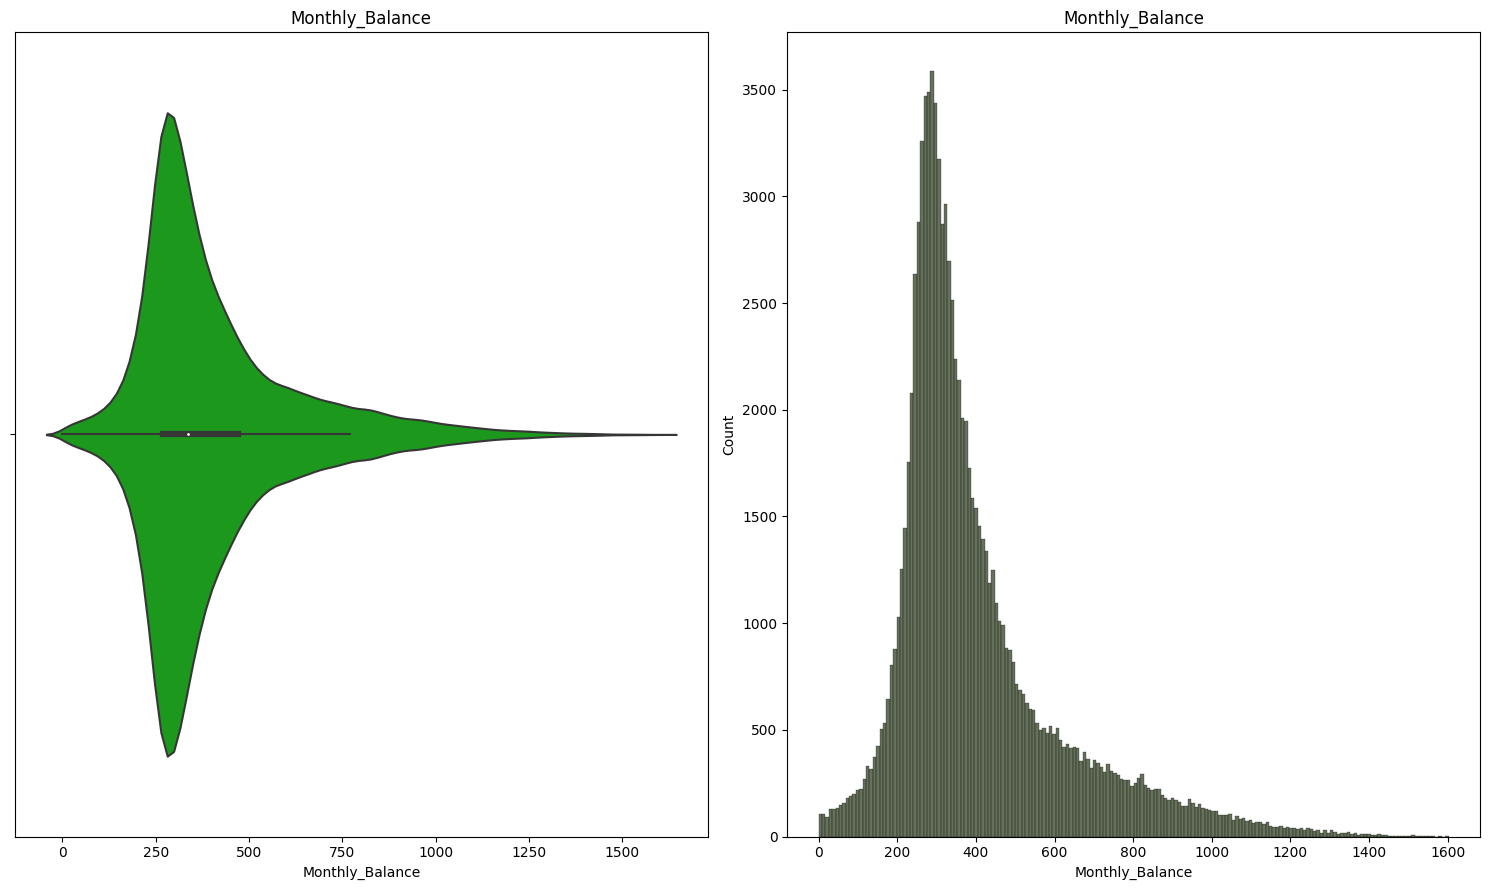

In [89]:
plot_violin_hist_feature(df_credit_score,'Monthly_Balance')

In [90]:
valores_uniques = df_credit_score['Monthly_Balance'].unique()
valores_uniques.sort()
print(valores_uniques)


[7.75966478e-03 8.86278653e-02 9.54824960e-02 ... 1.57628894e+03
 1.60204052e+03            nan]


No tomaremos valores extremos en esta variable dado que entran dentro del rango de valores posible.

Una vez imputados los valores que contenían el string "_" a nulos, se imputará el valor medio de Monthly_Balance
por id de cliente.

In [91]:
update_outliers_by_mean(df_credit_score,'Monthly_Balance',rows_with_outliers,outliers=False)

In [92]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                        object
Name                         object
Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [93]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# Variable Age

Se convierte la variable a numérica, se detectan valores atípicos e incorrectos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.


In [94]:
# Ver si hay string con "_"
df_credit_score[df_credit_score['Age'].str.contains('_')]

Customer_ID     Month              Name    Age     Occupation  \
8      CUS_0x21b1   January   Rick Rothackerj    28_        _______   
54     CUS_0x284a      July            Nadiaq    34_         Lawyer   
58     CUS_0x5407     March              Annk    30_  Media_Manager   
71     CUS_0x4157    August      Charlie Zhur    24_         Doctor   
89     CUS_0xc0ab  February          Soyoungd    33_       Engineer   
...           ...       ...               ...    ...            ...   
99908  CUS_0xa053       May         t Astridn  4808_         Writer   
99922  CUS_0x2654     March               enj    38_  Media_Manager   
99933  CUS_0xb11c      June    Yinka Adegokej    38_        Manager   
99942  CUS_0xad4f      July  Sabina Zawadzkig    48_      Developer   
99987  CUS_0x8600     April    Sarah McBridec    28_      Architect   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
8           34847.84            3037.986667                  2   
54         131313.40           10469.207759                  0   
58          34081.38            2611.115000                  8   
71         114838.41            9843.867500                  2   
89          88640.24            7266.686667                  3   
...              ...                    ...                ...   
99908       87695.34            7337.945000                  2   
99922      139664.96           11777.746667                  3   
99933       15319.65            1460.637500                  6   
99942       22620.79            1722.065833                  6   
99987       20002.88            1929.906667                 10   

       Num_Credit_Card  Interest_Rate  ...  Credit_Mix Outstanding_Debt  \
8                    4              6  ...        Good           605.03   
54                   1              8  ...        Good           352.16   
58                   7             15  ...    Standard          1704.18   
71                   5              7  ...        Good          1377.74   
89                   6            433  ...        Good           950.36   
...                ...            ...  ...         ...              ...   
99908                7              7  ...        Good           361.68   
99922                6             12  ...    Standard           365.66   
99933                7             15  ...         Bad          1453.61   
99942                2              9  ...    Standard           642.46   
99987                8             29  ...           _           3571.7   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
8                     24.464031                 319                    No   
54                    26.947565                 373                    No   
58                    35.111552                 177                   Yes   
71                    27.813354                 263                    No   
89                    41.036168                 306                    NM   
...                         ...                 ...                   ...   
99908                 28.147193                 233                    No   
99922                 35.828569                 357                   Yes   
99933                 24.846424                 134                   Yes   
99942                 24.714779                 357                    No   
99987                 30.614953                  71                   Yes   

       Total_EMI_per_month Amount_invested_monthly  \
8                18.816215              104.291825   
54              911.220179              930.391898   
58               70.478333              199.720765   
71              226.892792              254.571767   
89              135.173371              157.174788   
...                    ...                     ...   
99908         65671.000000              168.798784   
99922           423.731016              124.134750   
99933            28.182033               45.6117

In [95]:
# Eliminar el caracter('_') de la columna 'Age' y la convertimos a numerica
df_credit_score['Age'] = df_credit_score['Age'].str.replace('_', '')
# Convertir la columna 'Age' a tipo numérico
df_credit_score['Age'] = df_credit_score['Age'].astype(int)

# Outliers Age

In [96]:
valores_uniques = df_credit_score['Age'].unique()
valores_uniques.sort()
print(valores_uniques[:100])

[-500   14   15   16   17   18   19   20   21   22   23   24   25   26
   27   28   29   30   31   32   33   34   35   36   37   38   39   40
   41   42   43   44   45   46   47   48   49   50   51   52   53   54
   55   56   95   99  100  102  109  111  112  115  118  123  124  126
  134  142  146  169  181  182  186  189  194  203  208  210  216  221
  223  234  236  240  246  252  262  267  275  278  283  287  292  293
  305  306  316  325  328  330  333  335  344  347  349  356  359  362
  365  372]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


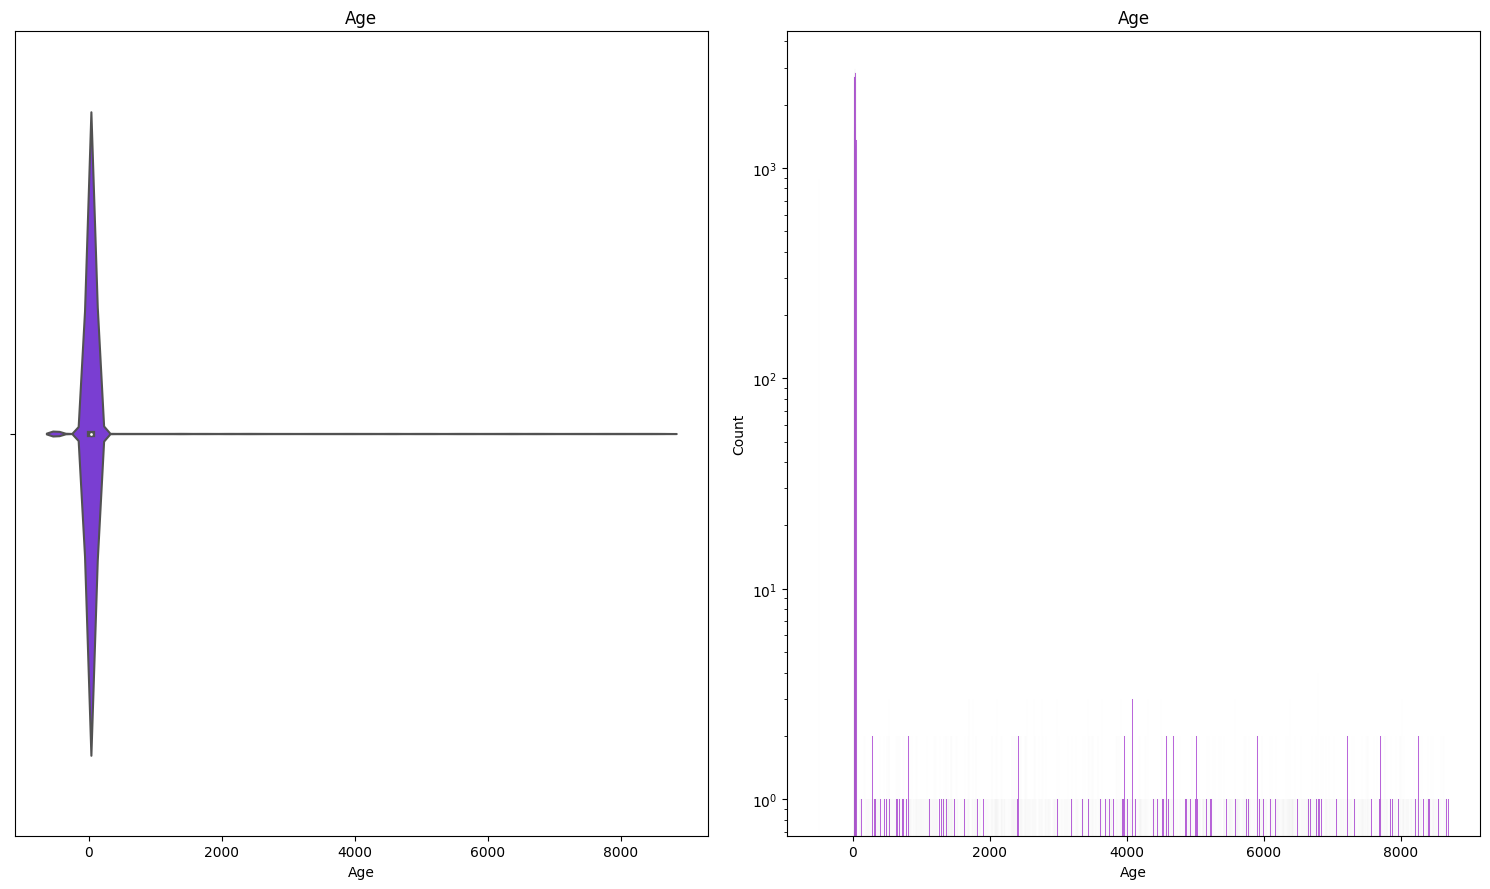

In [97]:
plot_violin_hist_feature(df_credit_score,'Age')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

Testeando los outliers, las edades incorrectas son las mayores de 56, es decir, desde 95 y las de -500.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


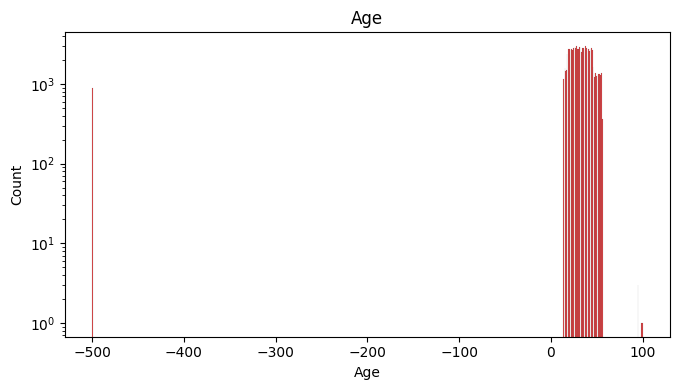

In [98]:
# Se filtran los valores inferiores a 100
values_outliers = df_credit_score[(df_credit_score['Age'] <=100)]
plot_violin_hist_feature(values_outliers,'Age',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


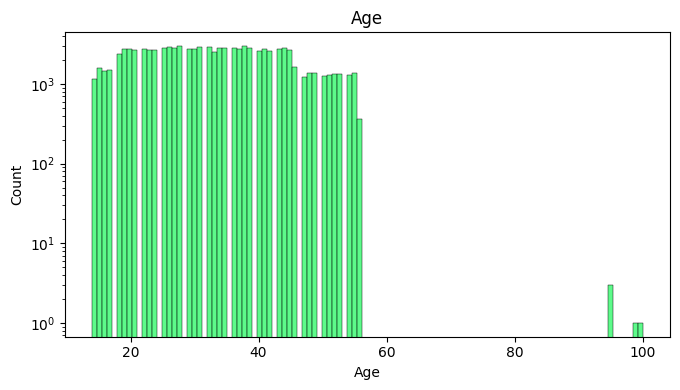

In [99]:
# Se filtran los valores inferiores a 100 y superiores a 0
values_outliers = df_credit_score[(df_credit_score['Age'] <=100)&(df_credit_score['Age'] >=0)]
plot_violin_hist_feature(values_outliers,'Age',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

Se observa como los valores cercanos a 100 tienen una frecuencia muy baja. Además, las edades negativas no tienen sentido.

In [100]:
# Se identifican las filas que consideramos outliers 
rows_with_outliers = (df_credit_score['Age'] > 56) | (df_credit_score['Age'] < 0)

Los valores de Age iguales a -500 y superiores a 56 los convertimos a nulos.

In [101]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Age',rows_with_outliers)

In [102]:
# Convertir la columna 'Age' a tipo numérico
df_credit_score['Age'] = df_credit_score['Age'].astype(int)

In [103]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [104]:
valores_outliers = df_credit_score['Age'].unique()
valores_outliers.sort()
print(valores_outliers) 

[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


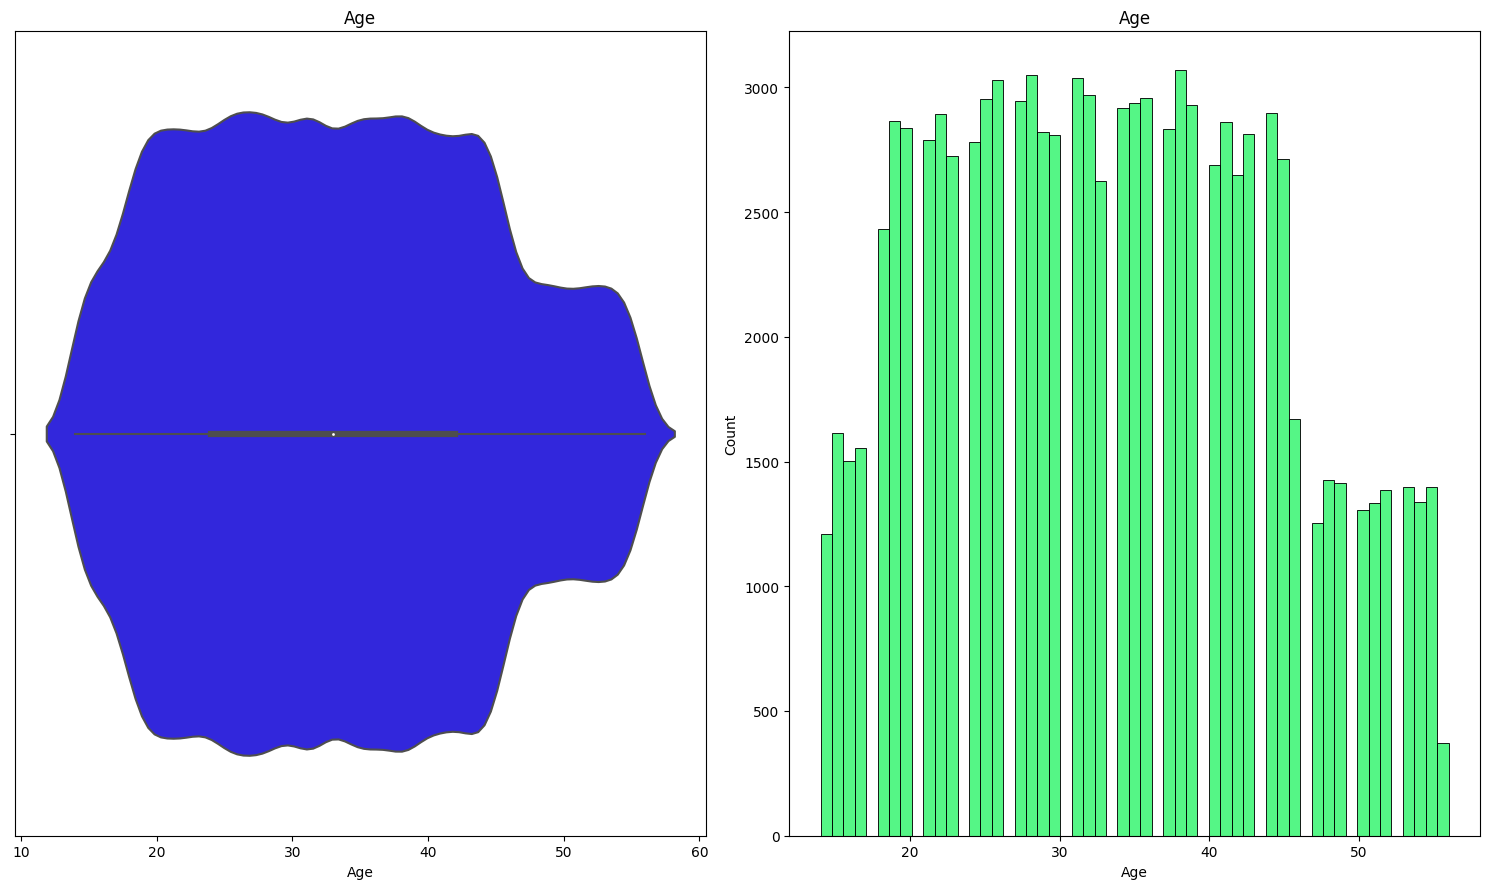

In [105]:
plot_violin_hist_feature(df_credit_score,'Age')

# Variables Categoricas

Vamos a encodear la variable Month, occupation, type_of_loan,credit_mix, payment_of_min_amount a través de la técnica **Target_Encoder**. 

Pero primero vamos a limpiar cada una de esas variables.

# Variable Month

Se transforma la variable a numérica haciendo la conversión mes -> entero.

In [106]:
values_uniques = df_credit_score['Month'].unique()
print(values_uniques) 

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


In [107]:
df_credit_score['Month'] = pd.to_datetime(df_credit_score['Month'],format="%B").dt.month
df_credit_score['Month'] = df_credit_score['Month'].astype(np.int64)

In [108]:
values_uniques = df_credit_score['Month'].unique()
print(values_uniques) 

[1 2 3 4 5 6 7 8]


# Variable Occupation

Se detectan valores erróneos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.


In [109]:
values_uniques = df_credit_score['Occupation'].unique()
print(values_uniques) 

['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


In [110]:
# Ver si hay string con "_" en 
df_credit_score[df_credit_score['Occupation'].str.contains('___')]

Customer_ID  Month              Name  Age Occupation  Annual_Income  \
8      CUS_0x21b1      1   Rick Rothackerj   28    _______       34847.84   
16     CUS_0x2dbc      1            Langep   34    _______      143162.64   
18     CUS_0x2dbc      3            Langep   34    _______      143162.64   
20     CUS_0x2dbc      5            Langep   34    _______      143162.64   
29     CUS_0xb891      6            Jasond   55    _______       30689.89   
...           ...    ...               ...  ...        ...            ...   
99920  CUS_0x2654      1               enj   37    _______      139664.96   
99935  CUS_0xb11c      8    Yinka Adegokej   38    _______       15319.65   
99937  CUS_0xad4f      2  Sabina Zawadzkig   47    _______       22620.79   
99943  CUS_0xad4f      8  Sabina Zawadzkig   48    _______       22620.79   
99989  CUS_0x8600      6    Sarah McBridec   28    _______       20002.88   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
8                3037.986667                  2                4   
16              12187.220000                  1                5   
18              12187.220000                  1                5   
20              12187.220000                  1                5   
29               2612.490833                  2                5   
...                      ...                ...              ...   
99920           11777.746667                  3                6   
99935            1460.637500                  6                7   
99937            1722.065833                  7                3   
99943            1722.065833                  6                2   
99989            1929.906667                 10                8   

       Interest_Rate  ...  Credit_Mix Outstanding_Debt  \
8                  6  ...        Good           605.03   
16                 8  ...        Good          1303.01   
18                 8  ...        Good          1303.01   
20                 8  ...        Good          1303.01   
29                 4  ...           _           632.46   
...              ...  ...         ...              ...   
99920             12  ...           _           365.66   
99935             15  ...         Bad          1453.61   
99937              9  ...    Standard           642.46   
99943              9  ...           _           642.46   
99989             29  ...         Bad           3571.7   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
8                     24.464031                 319                    No   
16                    28.616735                 213                    No   
18                    26.519815                 215                    No   
20                    31.376150                 217                    No   
29                    27.445422                 212                    No   
...                         ...                 ...                   ...   
99920                 31.043048                 355                   Yes   
99935                 34.557510                 136                   Yes   
99937                 31.841872                 351                    No   
99943                 34.026427                 358                    No   
99989                 33.359987                  73                   Yes   

       Total_EMI_per_month Amount_invested_monthly  \
8                18.816215              104.291825   
16              246.992319              168.413703   
18              246.992319              363.070024   
20              246.992319              430.947528   
29               16.415452               84.952848   
...                    ...                     ...   
99920           423.731016              282.782346   
99935            28.182033              191.877779   
99937             0.000000              105.076293   
99943             0.000000              205.217280   
99989            60.964772               74.3666

In [111]:
# Se identifican las filas que contengan el "_" en Occupation
rows_with_characters = df_credit_score['Occupation'].str.contains('___')

In [112]:
# Se actualizan los valores erróneos 
update_outliers_by_mode(df_credit_score,'Occupation',rows_with_characters)

In [113]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [114]:
values_uniques = df_credit_score['Occupation'].unique()
print(values_uniques) 

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


# Variable Credit Mix

Se procede igual que **Occupation**.

In [115]:
values_uniques = df_credit_score['Credit_Mix'].unique()
print(values_uniques) 

['_' 'Good' 'Standard' 'Bad']


In [116]:
# Ver si hay string con "_" en 
df_credit_score[df_credit_score['Credit_Mix'].str.contains('_')][['Customer_ID','Age','Month','Occupation','Credit_Mix','Num_of_Loan','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']]

Customer_ID  Age  Month    Occupation Credit_Mix  Num_of_Loan  \
0       CUS_0xd40   23      1     Scientist          _            4   
10     CUS_0x21b1   28      3       Teacher          _            1   
19     CUS_0x2dbc   34      4      Engineer          _            3   
29     CUS_0xb891   55      6  Entrepreneur          _            1   
35     CUS_0x1cdb   21      4     Developer          _            0   
...           ...  ...    ...           ...        ...          ...   
99988  CUS_0x8600   28      5     Architect          _            5   
99992  CUS_0x942c   24      1      Mechanic          _            2   
99994  CUS_0x942c   25      3      Mechanic          _            2   
99995  CUS_0x942c   25      4      Mechanic          _            2   
99996  CUS_0x942c   25      5      Mechanic          _            2   

                                            Type_of_Loan  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...   
10                                   Credit-Builder Loan   
19               Auto Loan, Auto Loan, and Not Specified   
29                                         Not Specified   
35                                             None Loan   
...                                                  ...   
99988  Personal Loan, Auto Loan, Mortgage Loan, Stude...   
99992                        Auto Loan, and Student Loan   
99994                        Auto Loan, and Student Loan   
99995                        Auto Loan, and Student Loan   
99996                        Auto Loan, and Student Loan   

       Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_History_Age  \
0                           7                     4                 265   
10                          4                     2                 321   
19                          5                     3                 213   
29                          6                     4                 212   
35                         15                     4                 371   
...                       ...                   ...                 ...   
99988                      25                     9                  72   
99992                       6                     3                 375   
99994                       6                     3                 377   
99995                       7                     3                 378   
99996                       7                     3                 379   

       Amount_invested_monthly  Monthly_Balance  
0                    80.415295       312.494089  
10                   58.515976       466.466476  
19                  825.216270       426.513411  
29                   84.952848       419.880784  
35                   96.785485       438.545432  
...                        ...              ...  
99988               213.978010       208.047884  
99992               401.196481       189.641080  
99994               140.581403       410.256158  
99995                60.971333       479.866228  
99996                54.185950       496.651610  

[20195 rows x 12 columns]

In [117]:
# Se identifican las filas que contengan el "_" en Credit_Mix
rows_with_characters = df_credit_score['Credit_Mix'].str.contains('_')

In [118]:
# Se actualizan los valores erróneos 
update_outliers_by_mode(df_credit_score,'Credit_Mix',rows_with_characters)

In [119]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [120]:
values_uniques = df_credit_score['Credit_Mix'].unique()
print(values_uniques) 

['Good' 'Standard' 'Bad']


# Variable Payment_Of_Min_Amount

Lo mismo que **Occupation** y **Credit_Mix**.

In [121]:
values_uniques = df_credit_score['Payment_of_Min_Amount'].unique()
print(values_uniques) 

['No' 'NM' 'Yes']


In [122]:
# Valores erróneos
df_credit_score[df_credit_score['Payment_of_Min_Amount'].str.contains('NM')][['Customer_ID','Age','Month','Payment_of_Min_Amount','Occupation','Credit_Mix','Num_of_Loan','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']]

Customer_ID  Age  Month Payment_of_Min_Amount     Occupation Credit_Mix  \
14     CUS_0x21b1   28      7                    NM        Teacher       Good   
26     CUS_0xb891   55      3                    NM   Entrepreneur       Good   
33     CUS_0x1cdb   21      2                    NM      Developer   Standard   
41     CUS_0x95ee   31      2                    NM         Lawyer       Good   
48     CUS_0x284a   33      1                    NM         Lawyer       Good   
...           ...  ...    ...                   ...            ...        ...   
99939  CUS_0xad4f   47      4                    NM      Developer   Standard   
99949  CUS_0x51b3   33      6                    NM  Media_Manager       Good   
99968   CUS_0xf16   44      1                    NM  Media_Manager       Good   
99979  CUS_0xaf61   49      4                    NM         Writer       Good   
99981  CUS_0xaf61   50      6                    NM         Writer       Good   

       Num_of_Loan                                       Type_of_Loan  \
14               1                                Credit-Builder Loan   
26               1                                      Not Specified   
33               0                                          None Loan   
41               0                                          None Loan   
48               2             Credit-Builder Loan, and Mortgage Loan   
...            ...                                                ...   
99939            0                                          None Loan   
99949            1                                      Personal Loan   
99968            4  Payday Loan, Student Loan, Mortgage Loan, and ...   
99979            3  Home Equity Loan, Mortgage Loan, and Student Loan   
99981            3  Home Equity Loan, Mortgage Loan, and Student Loan   

       Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_History_Age  \
14                          4                     2                 325   
26                          9                     4                 209   
33                         15                     4                 369   
41                          7                     2                 384   
48                          3                     2                 367   
...                       ...                   ...                 ...   
99939                      19                     2                 354   
99949                       6                     5                 246   
99968                       0                     4                 254   
99979                      12                     3                 360   
99981                      12                     3                 362   

       Amount_invested_monthly  Monthly_Balance  
14                   70.101774       464.880678  
26                   83.406509       411.427123  
33                   74.443641       460.887276  
41                  172.939214       705.931286  
48                  378.171254       858.462474  
...                        ...              ...  
99939               205.756074       256.450509  
99949                91.321664       622.786250  
99968                52.951978       318.737378  
99979               215.486386       300.008498  
99981               147.339908       368.154976  

[12007 rows x 13 columns]

In [123]:
# Se identifican las filas que contengan el "NM" en Payment_of_Min_Amount
rows_with_characters = df_credit_score['Payment_of_Min_Amount'].str.contains('NM')

In [124]:
# Se actualizan los valores erróneos 
update_outliers_by_mode(df_credit_score,'Payment_of_Min_Amount',rows_with_characters)

In [125]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [126]:
values_uniques = df_credit_score['Payment_of_Min_Amount'].unique()
print(values_uniques) 

['No' 'Yes']


# Variable Payment_Behaviour

Lo mismo que las anteriores variables categóricas.

In [127]:
values_uniques = df_credit_score['Payment_Behaviour'].unique()
print(values_uniques) 

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [128]:
# Se identifican las filas que contengan el "!@9#%8" en Payment_Behaviour
rows_with_characters = df_credit_score['Payment_Behaviour'].str.contains('!@9#%8')

In [129]:
# Se actualizan los valores erróneos 
update_outliers_by_mode(df_credit_score,'Payment_Behaviour',rows_with_characters)

In [130]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [131]:
values_uniques = df_credit_score['Payment_Behaviour'].unique()
print(values_uniques) 

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


# Variable Credit Score

Bad 0
Standard 1
Good 2

In [132]:
# Frecuencia de la variable objetivo credit_Score
credit_score_frequence = df_credit_score["Credit_Score"].value_counts()
print("La frecuencia de la variable del scoring de crédito es:\n{}".format(credit_score_frequence))

La frecuencia de la variable del scoring de crédito es:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [133]:
# Valores que quiero mapear a la variable credit_score
mapeo = {"Poor": 0,"Standard": 1, "Good": 2}

# Se utiliza el mapeo a la variable objetivo
df_credit_score['Credit_Score'] = df_credit_score['Credit_Score'].map(mapeo)


In [134]:
# Frecuencia de la variable objetivo credit_Score
credit_score_frequence = df_credit_score["Credit_Score"].value_counts()
print("La frecuencia de la variable del scoring de crédito es:\n{}".format(credit_score_frequence))

La frecuencia de la variable del scoring de crédito es:
Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64


# Variable Num Bank accounts

Se detectan valores atípicos,  se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [135]:
# Frecuencia de la variable objetivo credit_Score
values_uniques = df_credit_score['Num_Bank_Accounts'].unique()
values_uniques.sort()
print(values_uniques) 

[  -1    0    1    2    3    4    5    6    7    8    9   10   11   18
   26   27   28   29   30   31   32   33   34   35   37   38   39   40
   41   42   43   45   49   50   53   55   57   59   60   61   64   67
   68   69   70   72   74   75   77   79   82   83   84   87   91   92
   93   94   97   99  100  103  104  105  108  109  112  115  116  119
  120  121  122  124  125  129  135  136  137  140  142  143  145  147
  148  151  156  157  158  159  160  161  162  166  167  170  172  175
  179  180  182  184  186  193  194  195  196  197  198  201  203  205
  210  211  212  216  217  218  222  224  226  228  229  230  232  239
  240  242  243  244  245  246  259  260  264  265  270  271  272  274
  275  280  281  283  285  288  290  292  295  296  298  299  300  302
  303  304  305  307  308  310  312  313  314  316  317  318  322  324
  326  327  328  330  331  333  334  335  338  339  340  341  342  346
  347  350  351  352  353  354  356  358  360  364  368  371  373  374
  375 

# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


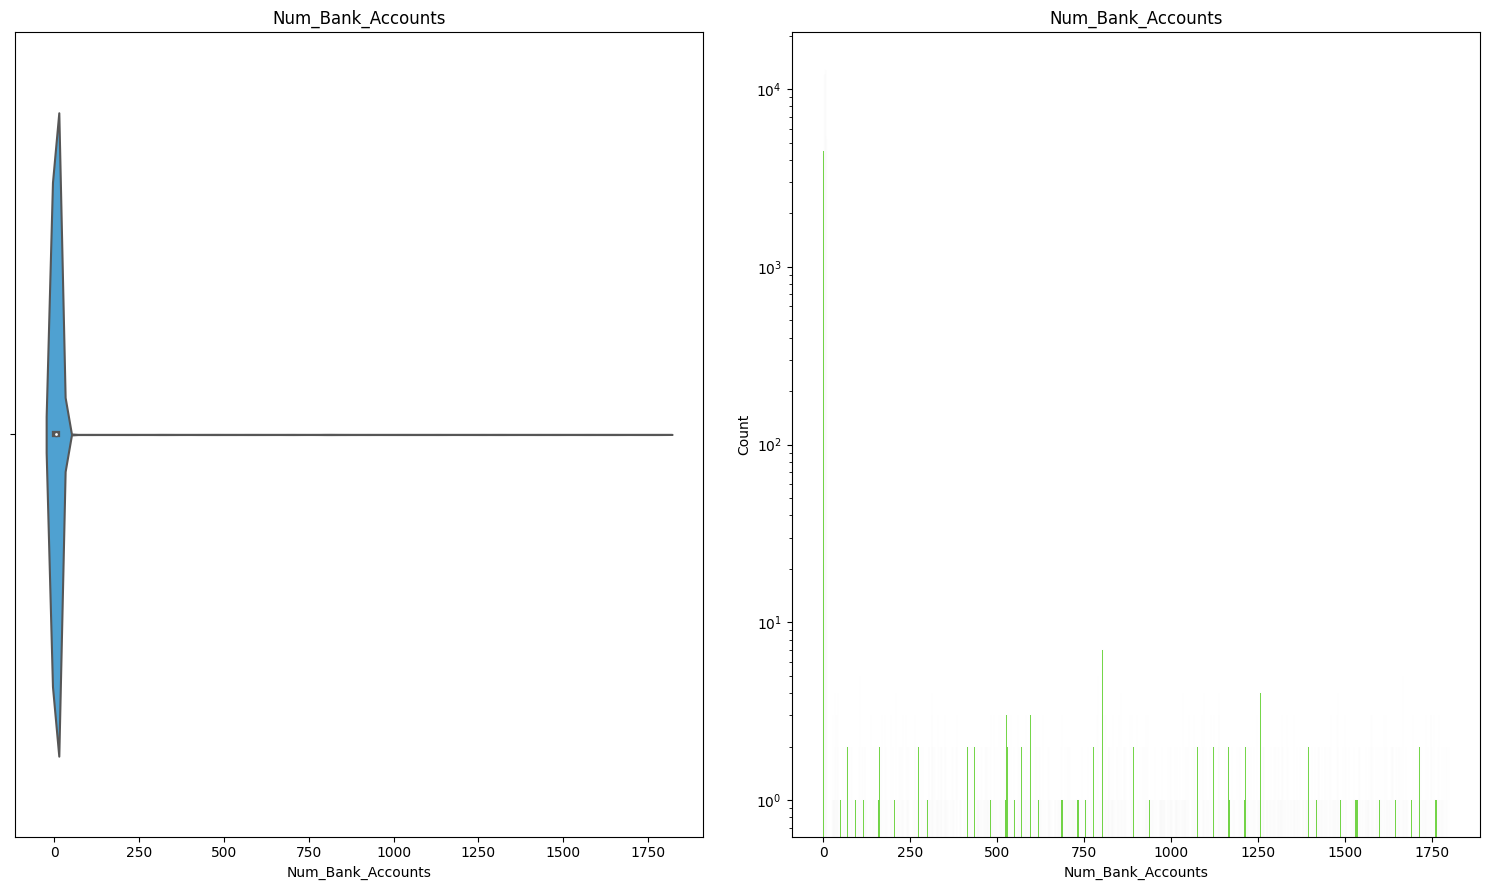

In [136]:
plot_violin_hist_feature(df_credit_score,'Num_Bank_Accounts')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


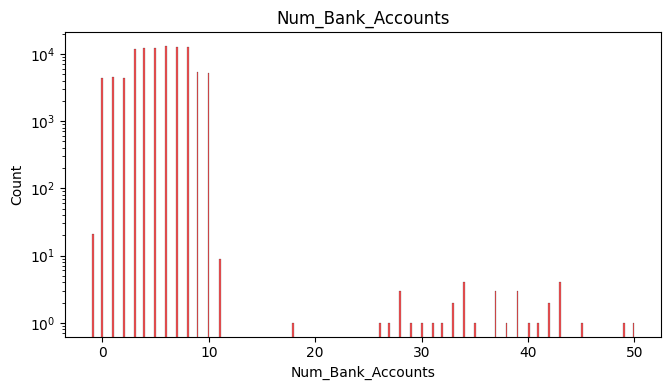

In [137]:
# Se filtran los valores inferiores a 50
values_inf_50 = df_credit_score[(df_credit_score['Num_Bank_Accounts'] <= 50)]

plot_violin_hist_feature(values_inf_50,'Num_Bank_Accounts',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

Consideramos valores anómalos a partir del 11 y negativos.

In [138]:
# Se identifican las filas que contengan con valores mayores 18 o menores que 0
rows_with_outliers = (df_credit_score['Num_Bank_Accounts']<0)|(df_credit_score['Num_Bank_Accounts']>=18)

In [139]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Num_Bank_Accounts',rows_with_outliers)

In [140]:
# Convertir la columna 'Num_Bank_Accounts' a tipo numérico
df_credit_score['Num_Bank_Accounts'] = df_credit_score['Num_Bank_Accounts'].astype(int)

# tipos
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [141]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [142]:
valores_uniques = df_credit_score['Num_Bank_Accounts'].unique()
valores_uniques.sort()
print(valores_uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


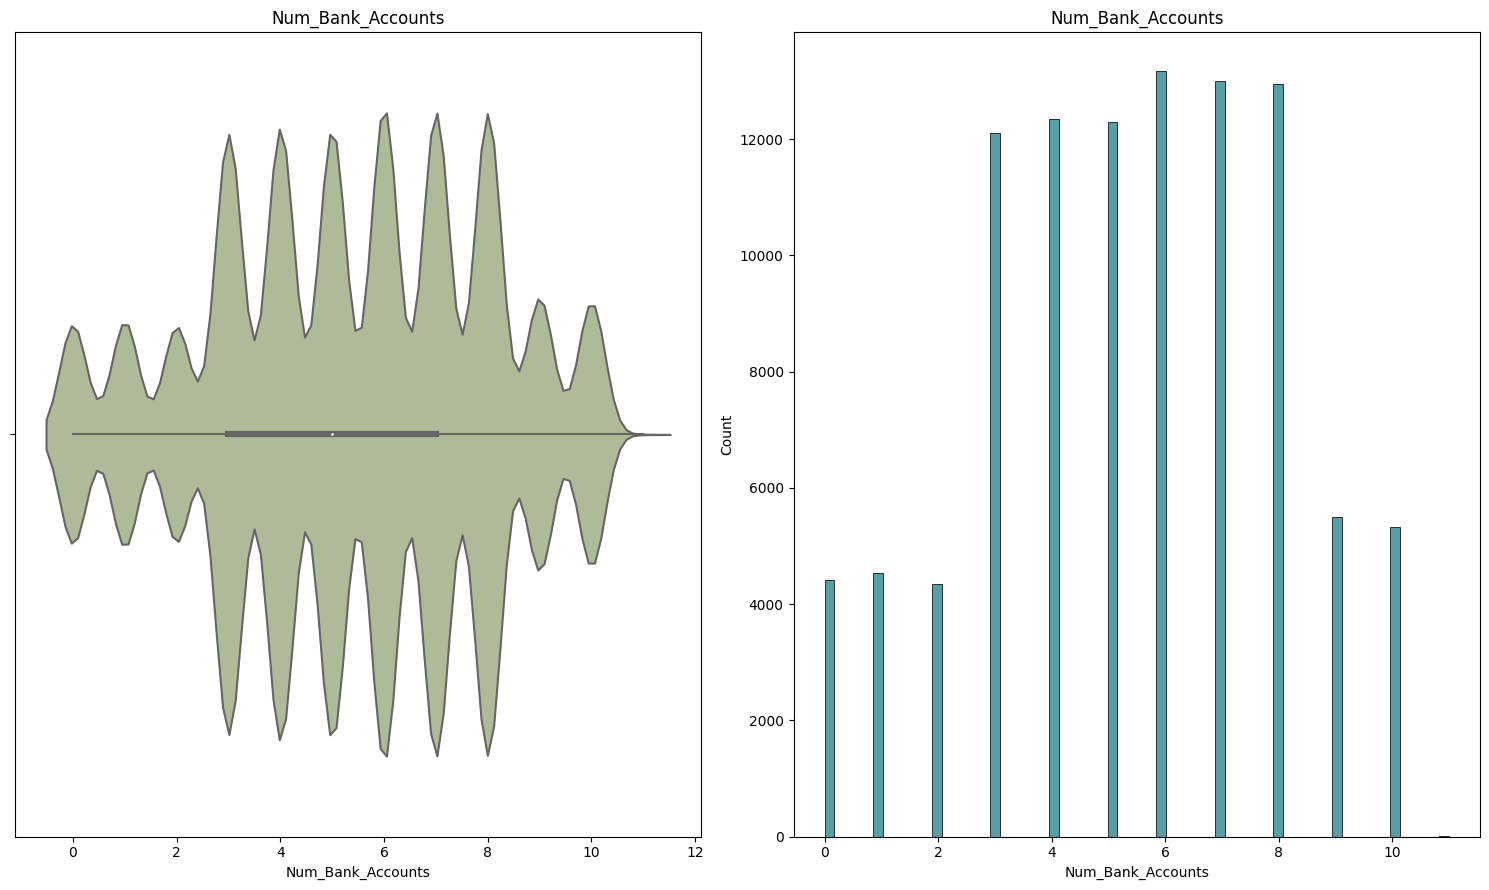

In [143]:
plot_violin_hist_feature(df_credit_score,'Num_Bank_Accounts')

# Variable Num Credit Card

Lo mismo que **Num_Bank_Accounts**.

In [144]:
# Frecuencia de la variable objetivo credit_Score
values_uniques = df_credit_score['Num_Credit_Card'].unique()
values_uniques.sort()
print(values_uniques) 

[   0    1    2 ... 1497 1498 1499]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


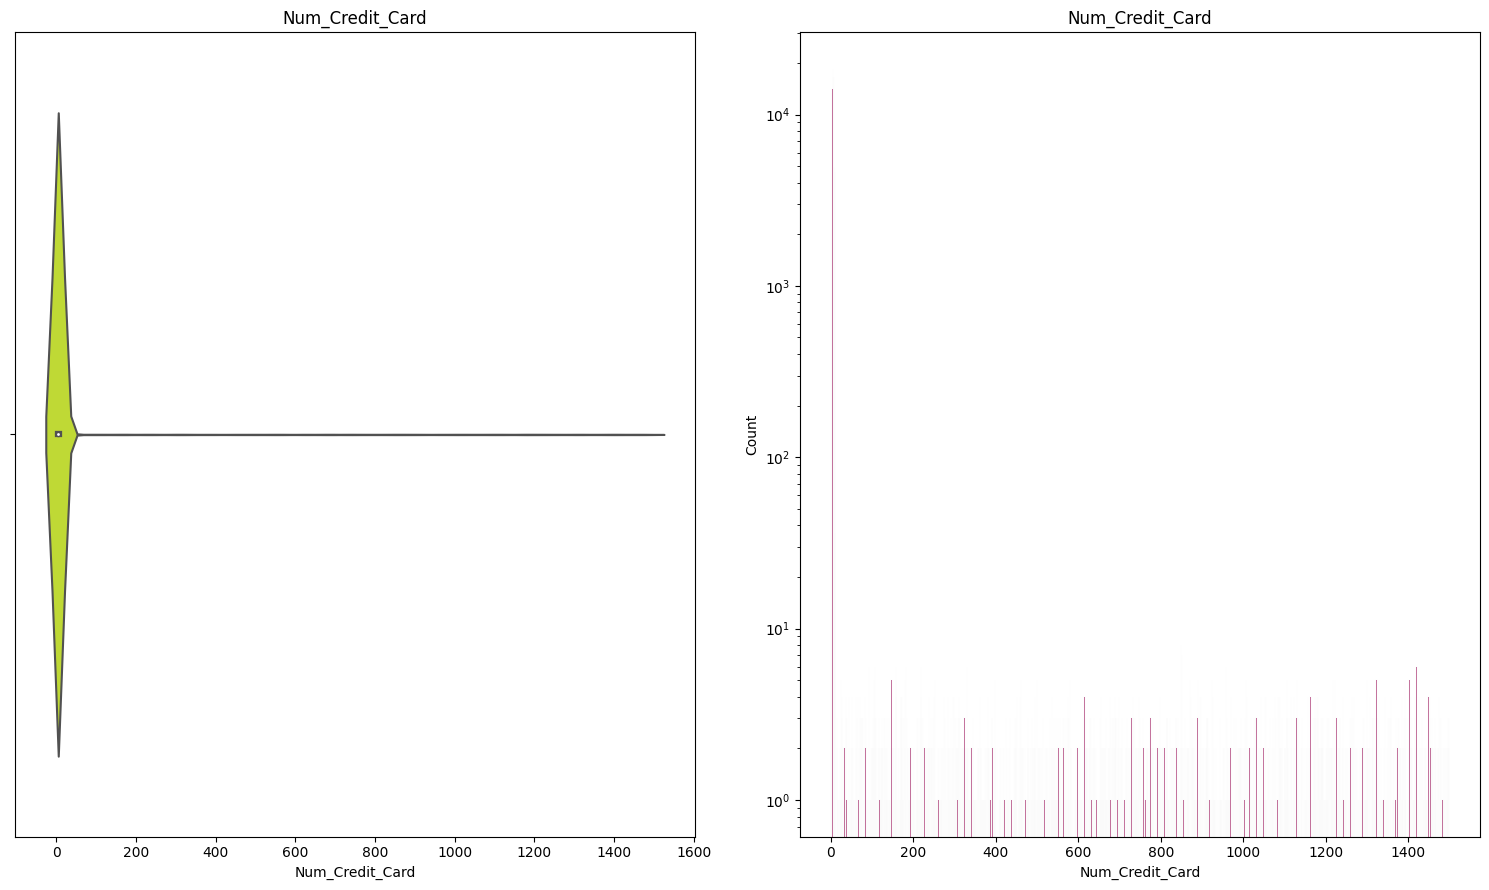

In [145]:
plot_violin_hist_feature(df_credit_score,'Num_Credit_Card')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


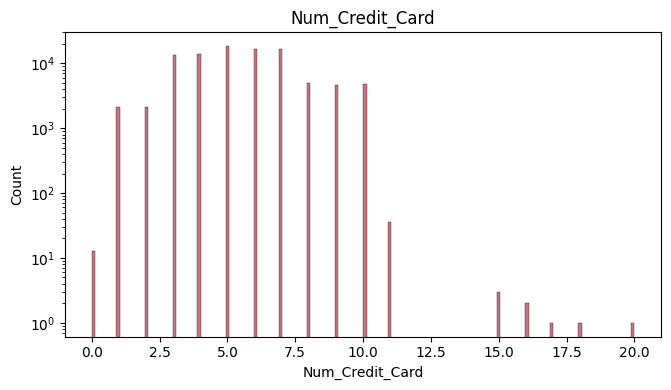

In [146]:
# Se filtran posibles outliers
values_outliers = df_credit_score[(df_credit_score['Num_Credit_Card'] <=20)]
plot_violin_hist_feature(values_outliers,'Num_Credit_Card',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

In [147]:
# Se identifican las filas que contengan con valores mayores o iguales a 15
rows_with_outliers = (df_credit_score['Num_Credit_Card']>=15)

In [148]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Num_Credit_Card',rows_with_outliers)

In [149]:
# Convertir la columna 'Num_Credit_Card' a tipo numérico
df_credit_score['Num_Credit_Card'] = df_credit_score['Num_Credit_Card'].astype(int)

In [150]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [151]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [152]:
valores_uniques = df_credit_score['Num_Credit_Card'].unique()
valores_uniques.sort()
print(valores_uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


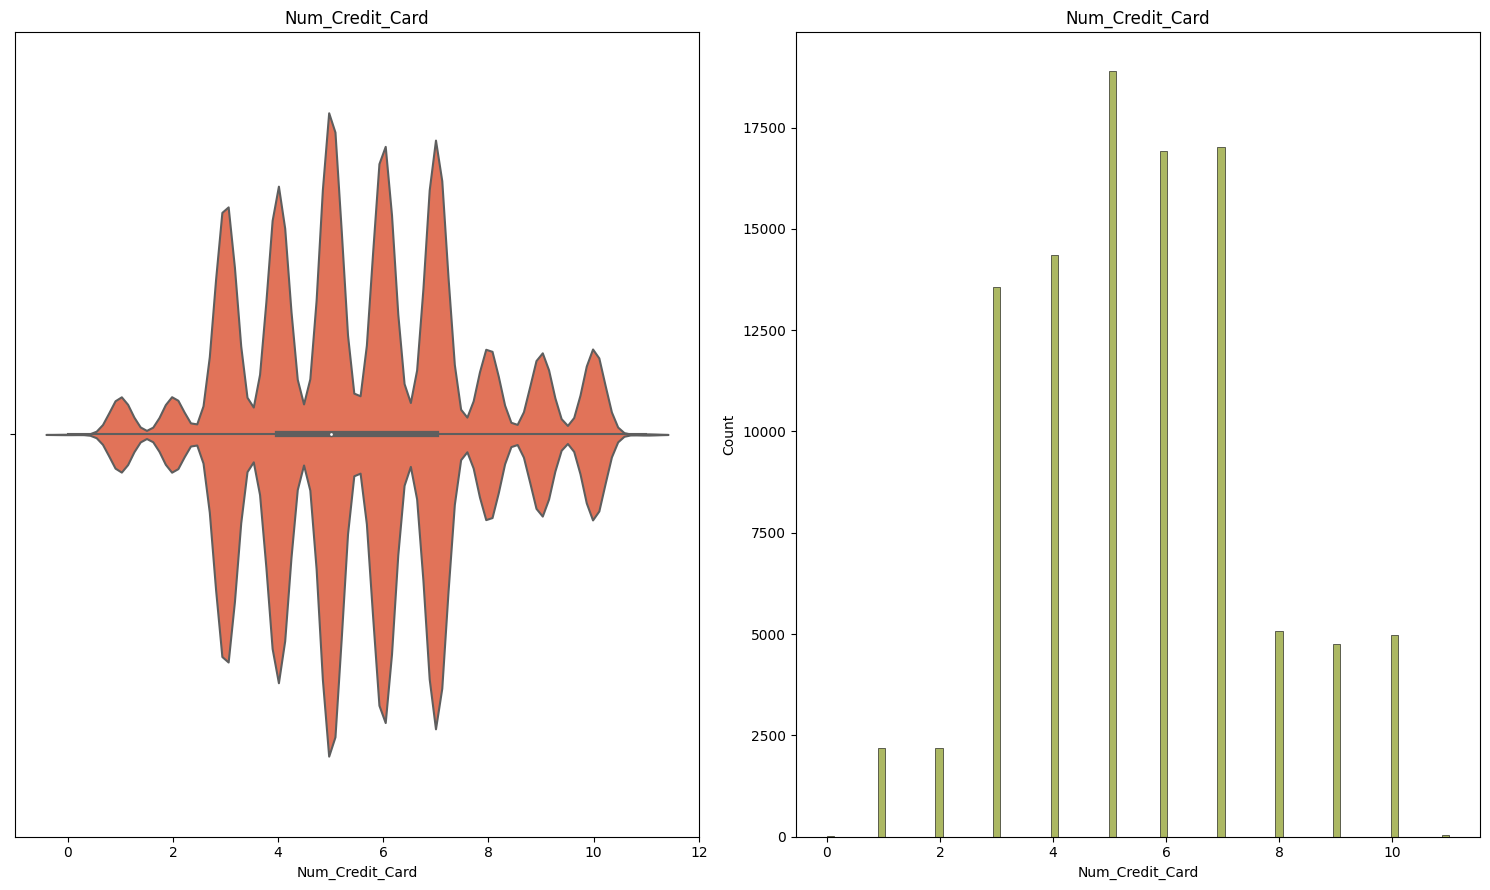

In [153]:
plot_violin_hist_feature(df_credit_score,'Num_Credit_Card')

# Variable Interest Rate

Lo mismo que la anterior variable.

In [154]:
# Frecuencia de la variable Interest_Rate
values_uniques = df_credit_score['Interest_Rate'].unique()
values_uniques.sort()
print(values_uniques) 

[   1    2    3 ... 5788 5789 5797]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


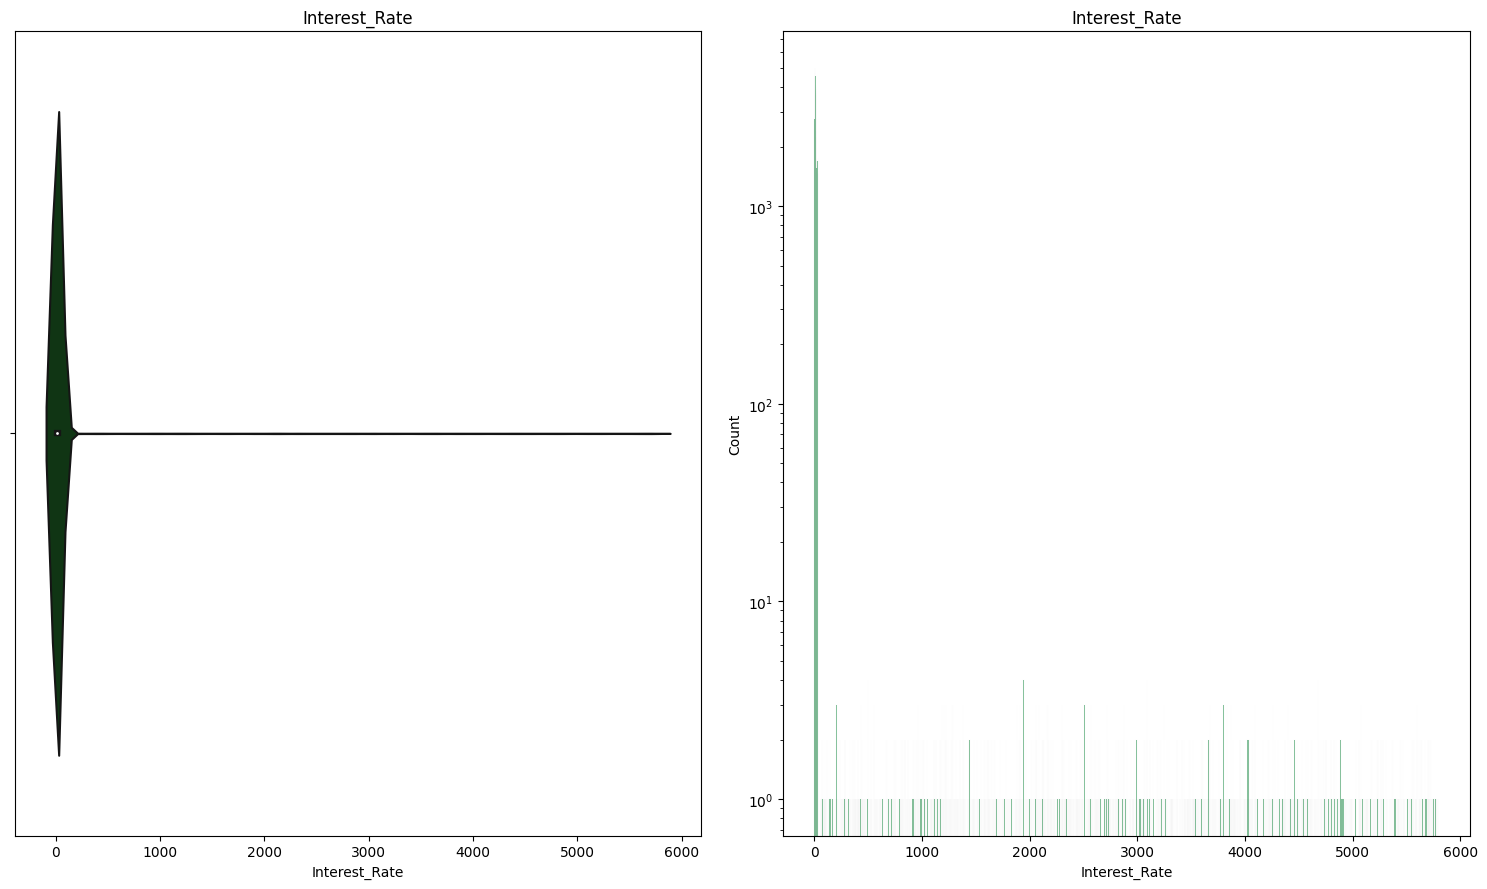

In [155]:
plot_violin_hist_feature(df_credit_score,'Interest_Rate')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


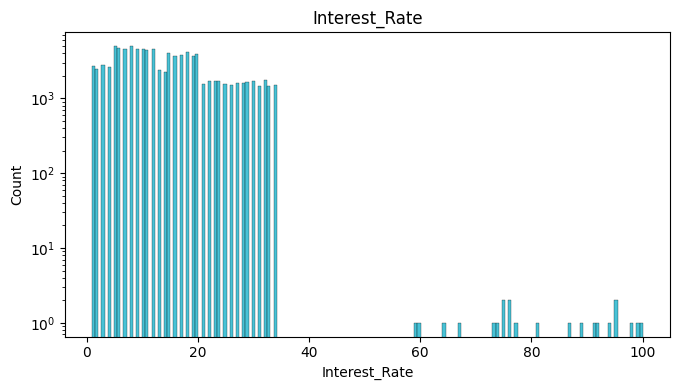

In [156]:
# Se filtran posibles outliers
values_outliers = df_credit_score[(df_credit_score['Interest_Rate'] <= 100)]
plot_violin_hist_feature(values_outliers,'Interest_Rate',violin=False)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

In [157]:
# Se identifican las filas que contengan con valores mayores o iguales a 59
rows_with_outliers = (df_credit_score['Interest_Rate']>=59)

In [158]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Interest_Rate',rows_with_outliers)

In [159]:
# Convertir la columna 'Num_Credit_Card' a tipo numérico
df_credit_score['Interest_Rate'] = df_credit_score['Interest_Rate'].astype(int)

In [160]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [161]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [162]:
valores_uniques = df_credit_score['Interest_Rate'].unique()
valores_uniques.sort()
print(valores_uniques)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


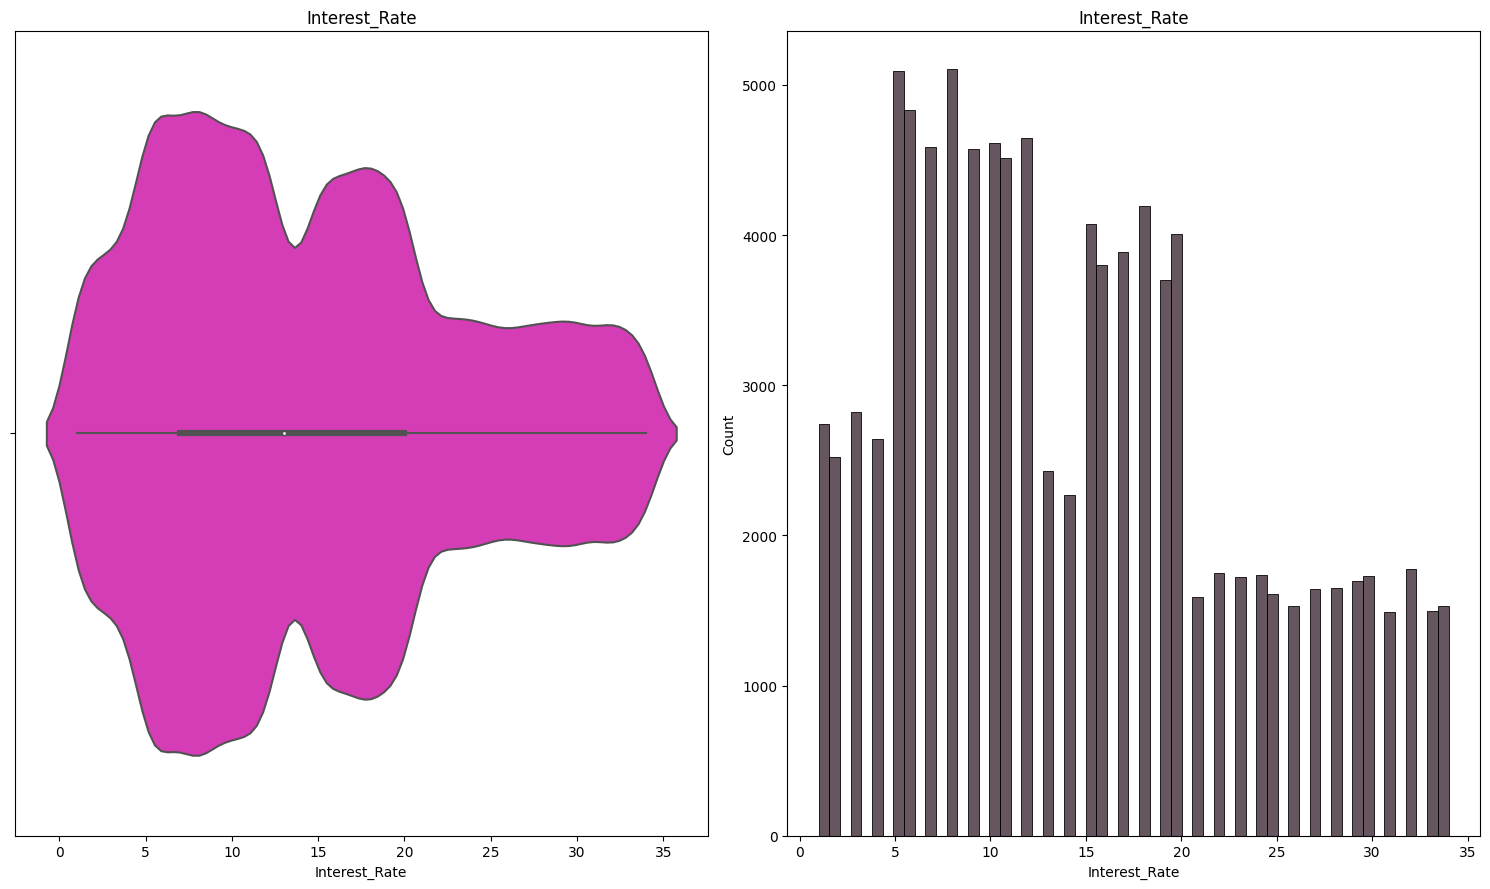

In [163]:
plot_violin_hist_feature(df_credit_score,'Interest_Rate')

# Variable delay_from_due_date

Lo mismo que la variable anterior. Los Outliers son los valores negativos.

In [164]:
# Frecuencia de la variable Delay_from_due_date
values_uniques = df_credit_score['Delay_from_due_date'].unique()
values_uniques.sort()
print(values_uniques) 

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


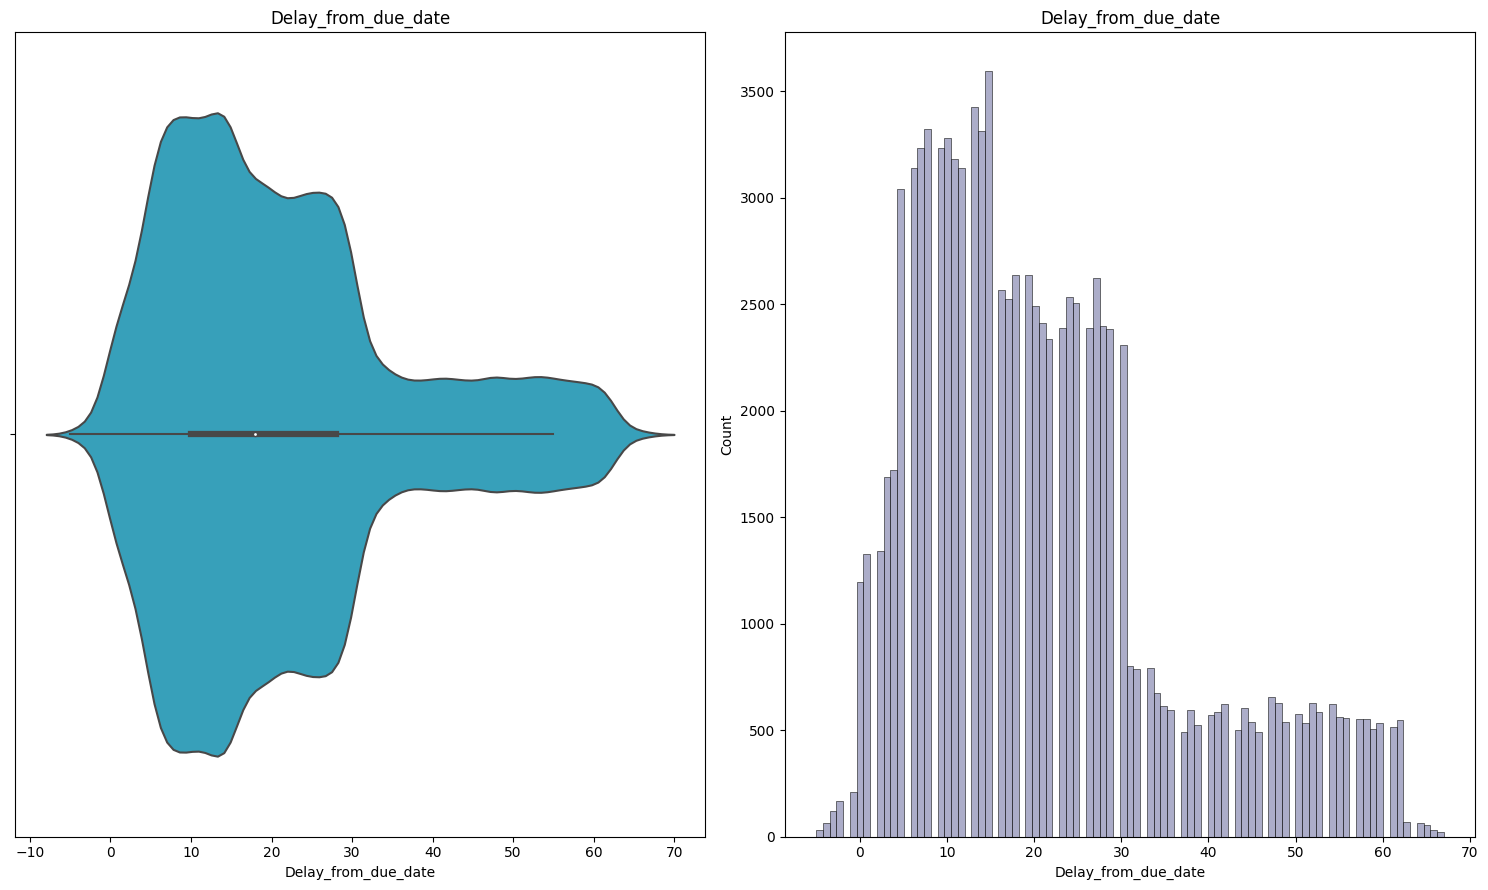

In [165]:
plot_violin_hist_feature(df_credit_score,'Delay_from_due_date')

Los outliers son los valores negativos que actualizaremos por la moda, el valor más frecuente.

In [166]:
# Se identifican las filas que contengan con valores negativos
rows_with_outliers = (df_credit_score['Delay_from_due_date']<0)

In [167]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Delay_from_due_date',rows_with_outliers)

In [168]:
# Convertir la columna 'Delay_from_due_date' a tipo entero
df_credit_score['Delay_from_due_date'] = df_credit_score['Delay_from_due_date'].astype(int)

In [169]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [170]:
# Frecuencia de la variable Delay_from_due_date
values_uniques = df_credit_score['Delay_from_due_date'].unique()
values_uniques.sort()
print(values_uniques) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


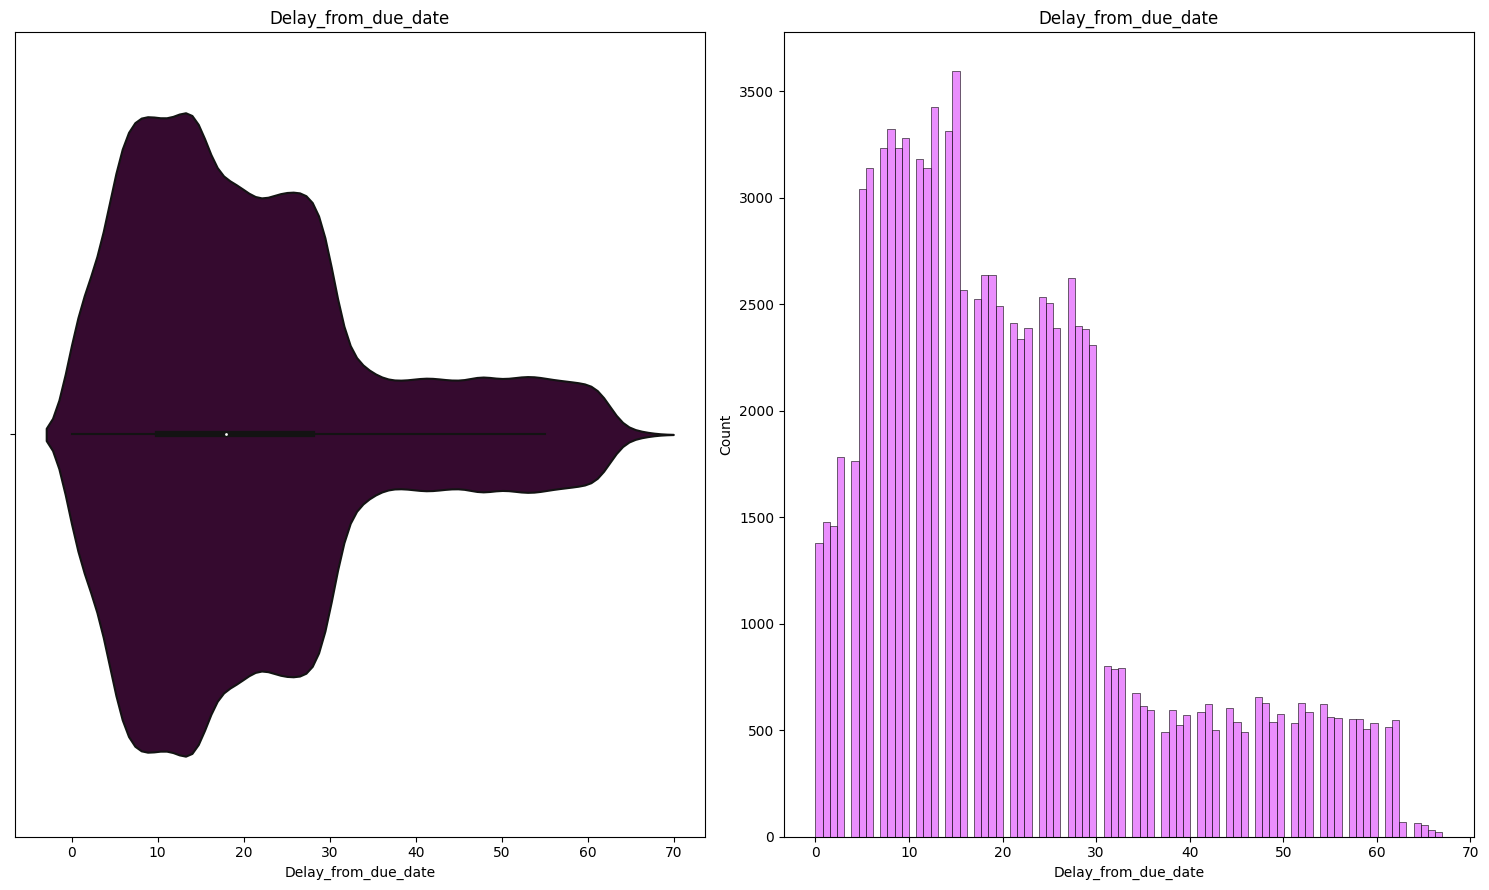

In [171]:
plot_violin_hist_feature(df_credit_score,'Delay_from_due_date')

# Changed_credit_limit

Se convierte la variable a numérica, se detectan valores atípicos e incorrectos (valor **-**), se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [172]:
# Frecuencia de la variable Changed_Credit_Limit
values_uniques = df_credit_score['Changed_Credit_Limit'].unique()
values_uniques.sort()
print(values_uniques) 

['-0.009999999999999787' '-0.01999999999999957' '-0.020000000000000014'
 ... '9.989999999999998' '9.99' '_']


In [173]:
# Ver si hay string con "_" en 
df_credit_score[df_credit_score['Changed_Credit_Limit'].notnull() & df_credit_score['Changed_Credit_Limit'].str.contains('_')][['Customer_ID','Age','Month','Changed_Credit_Limit','Num_Credit_Card','Num_Bank_Accounts','Payment_Behaviour','Occupation','Num_of_Loan','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries']]

Customer_ID  Age  Month Changed_Credit_Limit  Num_Credit_Card  \
2       CUS_0xd40   23      3                    _                4   
65     CUS_0x4157   23      2                    _                5   
66     CUS_0x4157   23      3                    _                5   
109    CUS_0x6c66   39      6                    _                5   
110    CUS_0x6c66   39      7                    _                5   
...           ...  ...    ...                  ...              ...   
99548  CUS_0x2637   28      5                    _                7   
99618  CUS_0xae66   30      3                    _                3   
99800  CUS_0x1232   16      1                    _                8   
99892  CUS_0x89aa   38      5                    _                7   
99931  CUS_0xb11c   38      4                    _                7   

       Num_Bank_Accounts                 Payment_Behaviour Occupation  \
2                      3   Low_spent_Medium_value_payments  Scientist   
65                     2   High_spent_Large_value_payments     Doctor   
66                     2   High_spent_Small_value_payments     Doctor   
109                    6   Low_spent_Medium_value_payments    Manager   
110                    6   Low_spent_Medium_value_payments    Manager   
...                  ...                               ...        ...   
99548                  5  High_spent_Medium_value_payments     Writer   
99618                  6   High_spent_Large_value_payments     Writer   
99800                  8    Low_spent_Small_value_payments  Developer   
99892                  6   High_spent_Large_value_payments    Manager   
99931                  6   High_spent_Large_value_payments    Manager   

       Num_of_Loan                                       Type_of_Loan  \
2                4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
65               3  Personal Loan, Debt Consolidation Loan, and Au...   
66               3  Personal Loan, Debt Consolidation Loan, and Au...   
109              7  Personal Loan, Payday Loan, Student Loan, Auto...   
110              7  Personal Loan, Payday Loan, Student Loan, Auto...   
...            ...                                                ...   
99548            4  Not Specified, Mortgage Loan, Personal Loan, a...   
99618            1                                       Student Loan   
99800            7  Student Loan, Mortgage Loan, Debt Consolidatio...   
99892            2             Auto Loan, and Debt Consolidation Loan   
99931            4  Home Equity Loan, Auto Loan, Auto Loan, and Au...   

       Num_of_Delayed_Payment  Num_Credit_Inquiries  
2                           7                     4  
65                          8                     3  
66                         11                     3  
109                         6                     6  
110                         9                     9  
...                       ...                   ...  
99548                      17                     6  
99618                      16                     0  
99800                      12                     6  
99892                      18                     5  
99931                      16                     6  

[2091 rows x 12 columns]

In [174]:
# Se guardan los registros que contienen el carácter "_" en Changed_Credit_Limit
rows_with_characters = df_credit_score['Changed_Credit_Limit'].str.contains('_')

# Se asignan valores nulos a esos registros
df_credit_score.loc[rows_with_characters, 'Changed_Credit_Limit'] = pd.NA

In [175]:
# Convertir la columna 'Changed_Credit_Limit' a tipo numérico
df_credit_score['Changed_Credit_Limit'] = pd.to_numeric(df_credit_score['Changed_Credit_Limit'])

# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


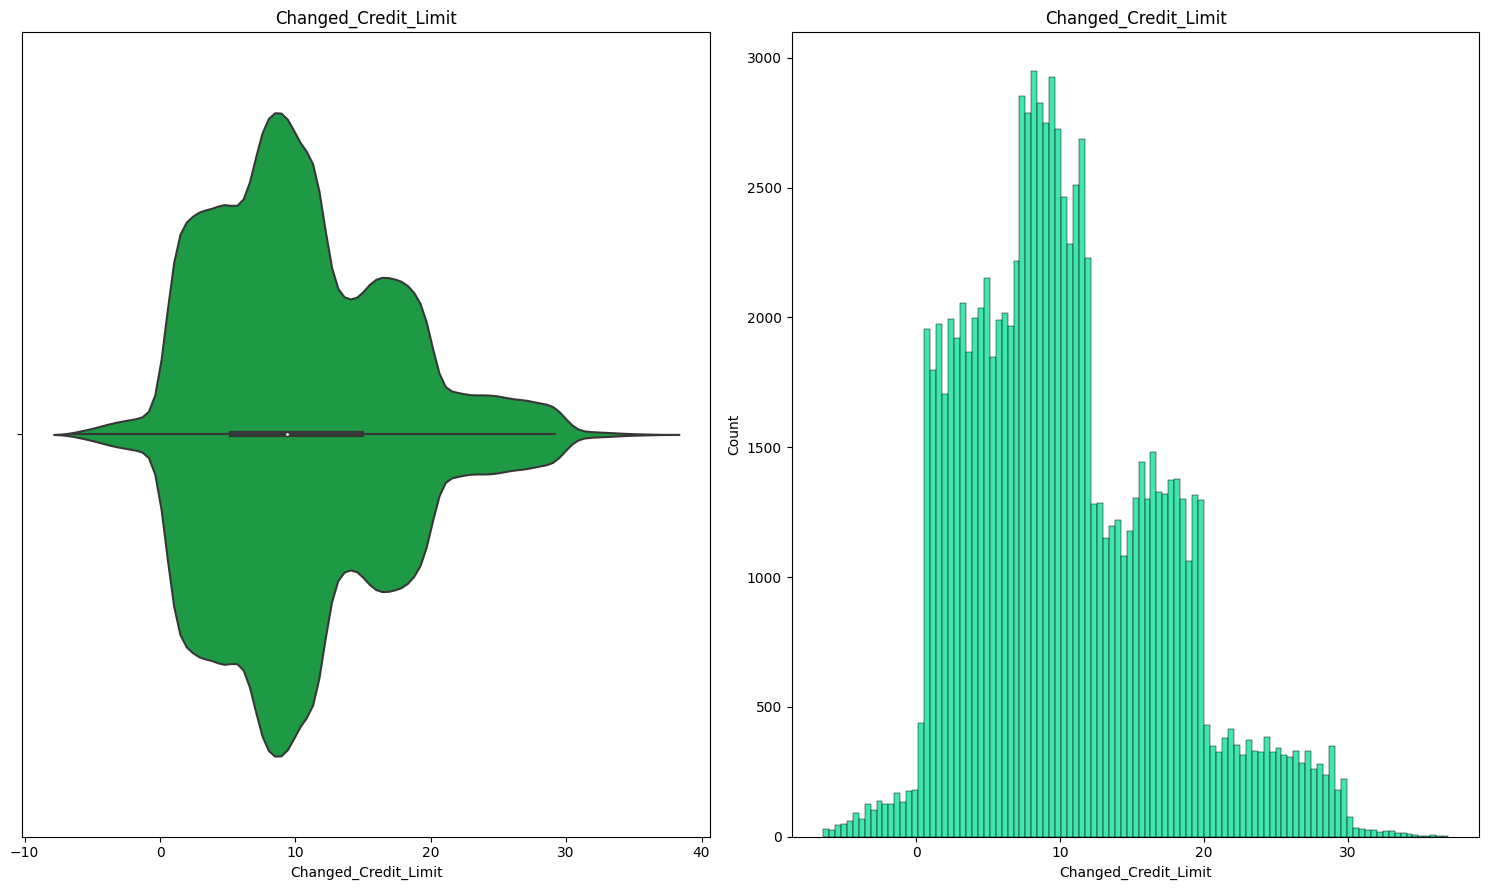

In [176]:
plot_violin_hist_feature(df_credit_score,'Changed_Credit_Limit')
#plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
#plt.show()

In [177]:
# Frecuencia de la variable Num_of_Delayed_Payment
values_uniques = df_credit_score['Changed_Credit_Limit'].unique()
values_uniques.sort()
print(values_uniques) 

[-6.49 -6.48 -6.45 ... 36.49 36.97   nan]


Tomamos como outliers los valores negativos.

In [178]:
# Se identifican las filas que consideramos outliers 
rows_with_outliers = (df_credit_score['Changed_Credit_Limit']<0)

In [179]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Changed_Credit_Limit',rows_with_outliers)

In [180]:
# Convertir la columna 'Changed_Credit_Limit' a tipo numérico
df_credit_score['Changed_Credit_Limit'] = pd.to_numeric(df_credit_score['Changed_Credit_Limit'])

In [181]:
# Frecuencia de la variable Num_of_Delayed_Payment
values_uniques = df_credit_score['Changed_Credit_Limit'].unique()
values_uniques.sort()
print(values_uniques) 

[0.000e+00 1.000e-02 2.000e-02 ... 3.629e+01 3.649e+01 3.697e+01]


In [182]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


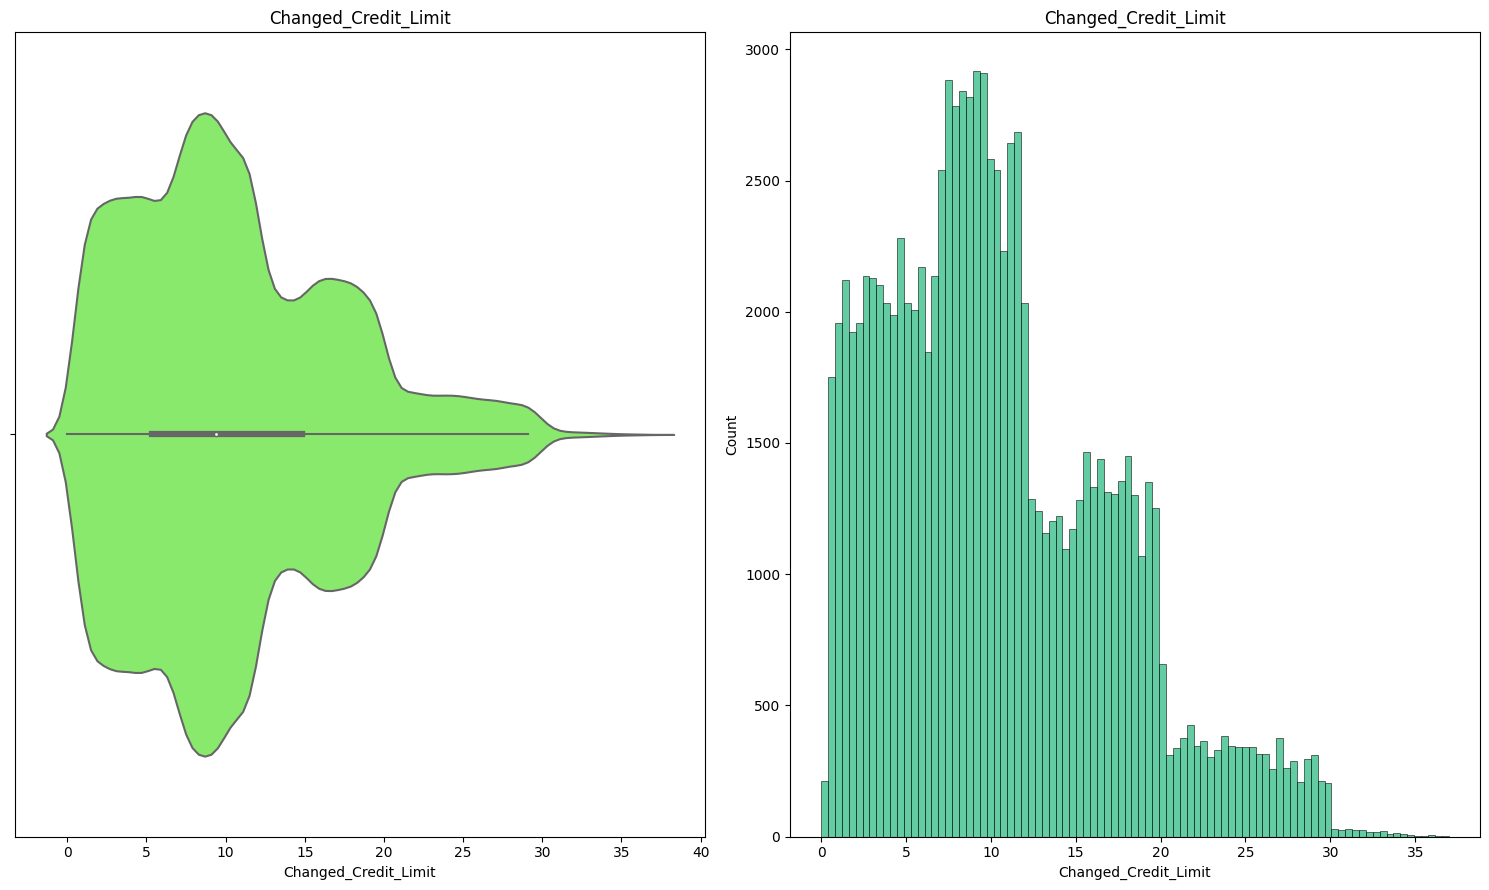

In [183]:
plot_violin_hist_feature(df_credit_score,'Changed_Credit_Limit')

# Outstanding_Debt

Se convierte la variable a numérica, se detectan valores atípicos (no hay) e incorrectos,  se transforman a nulos y todos ellos se imputan por otros.


In [184]:
# Se elimina el caracter('_') de la columna Outstanding_Debt y la convertimos a numerica
df_credit_score['Outstanding_Debt'] = df_credit_score['Outstanding_Debt'].str.replace('_', '')
# Se convierte la columna Outstanding_Debt a tipo numérico
df_credit_score['Outstanding_Debt'] = pd.to_numeric(df_credit_score['Outstanding_Debt'])

In [185]:
# Frecuencia de la variable Outstanding_Debt
values_uniques = df_credit_score['Outstanding_Debt'].unique()
values_uniques.sort()
print(values_uniques) 

[2.30000e-01 3.40000e-01 5.40000e-01 ... 4.99705e+03 4.99710e+03
 4.99807e+03]


# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


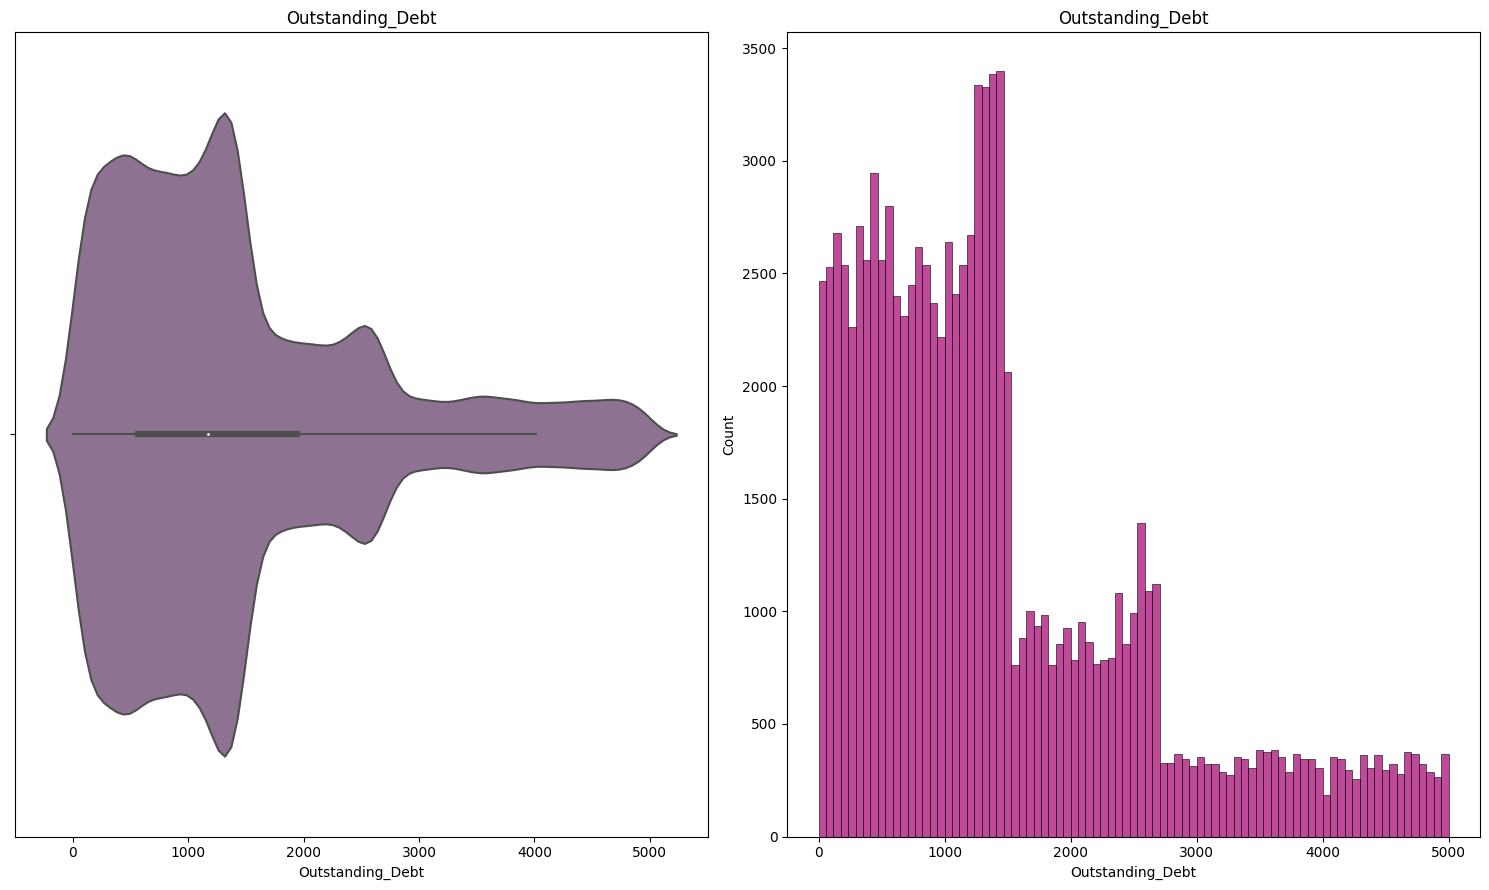

In [186]:
plot_violin_hist_feature(df_credit_score,'Outstanding_Debt')

No hay outliers en esta variable.

# Credit Utilization Ratio

In [187]:
# Frecuencia de la variable Credit_Utilization_Ratio
values_uniques = df_credit_score['Credit_Utilization_Ratio'].unique()
values_uniques.sort()
print(values_uniques) 

[20.         20.10076996 20.1729419  ... 49.5223243  49.56451935
 50.        ]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


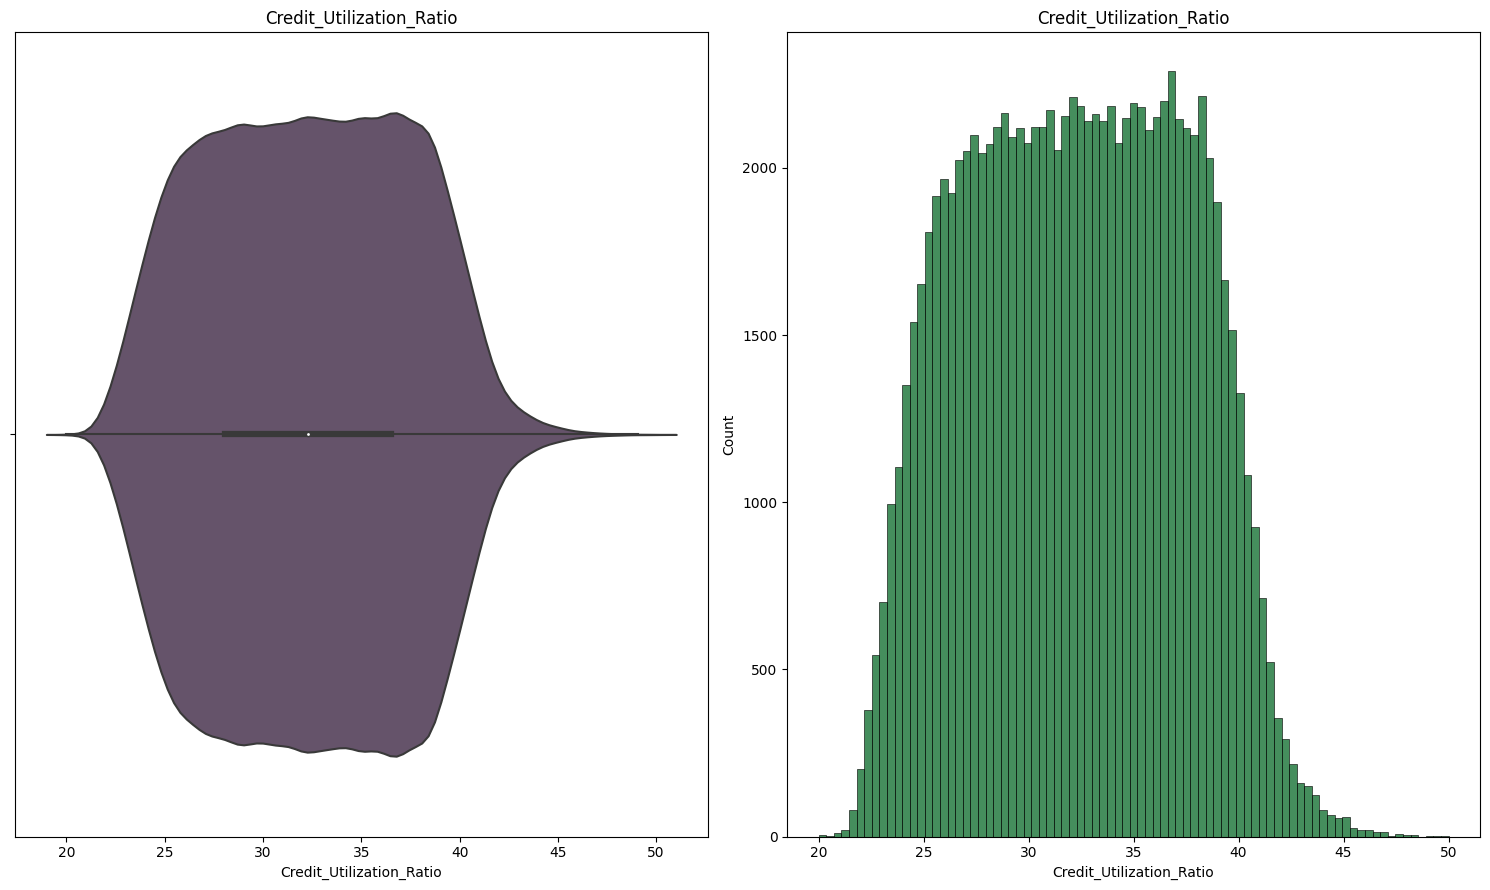

In [188]:
plot_violin_hist_feature(df_credit_score,'Credit_Utilization_Ratio')

Variable que no hay que transformar, está en el tipo correcto y no tiene valores outliers.

In [189]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


# Total_EMI_per_month

Se detectan valores atípicos, se transforman a nulos y todos ellos se imputan por otros.

Los registros que contengan valores nulos en esta variable, se imputarán por la **moda** que tengan los demás registros no nulos con el mismo **Customer_ID** que identifica al cliente.

In [190]:
# Frecuencia de la variable Total_EMI_per_month
values_uniques = df_credit_score['Total_EMI_per_month'].unique()
values_uniques.sort()
print(values_uniques) 

[0.00000000e+00 4.46283747e+00 4.71318357e+00 ... 8.22360000e+04
 8.22560000e+04 8.23310000e+04]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


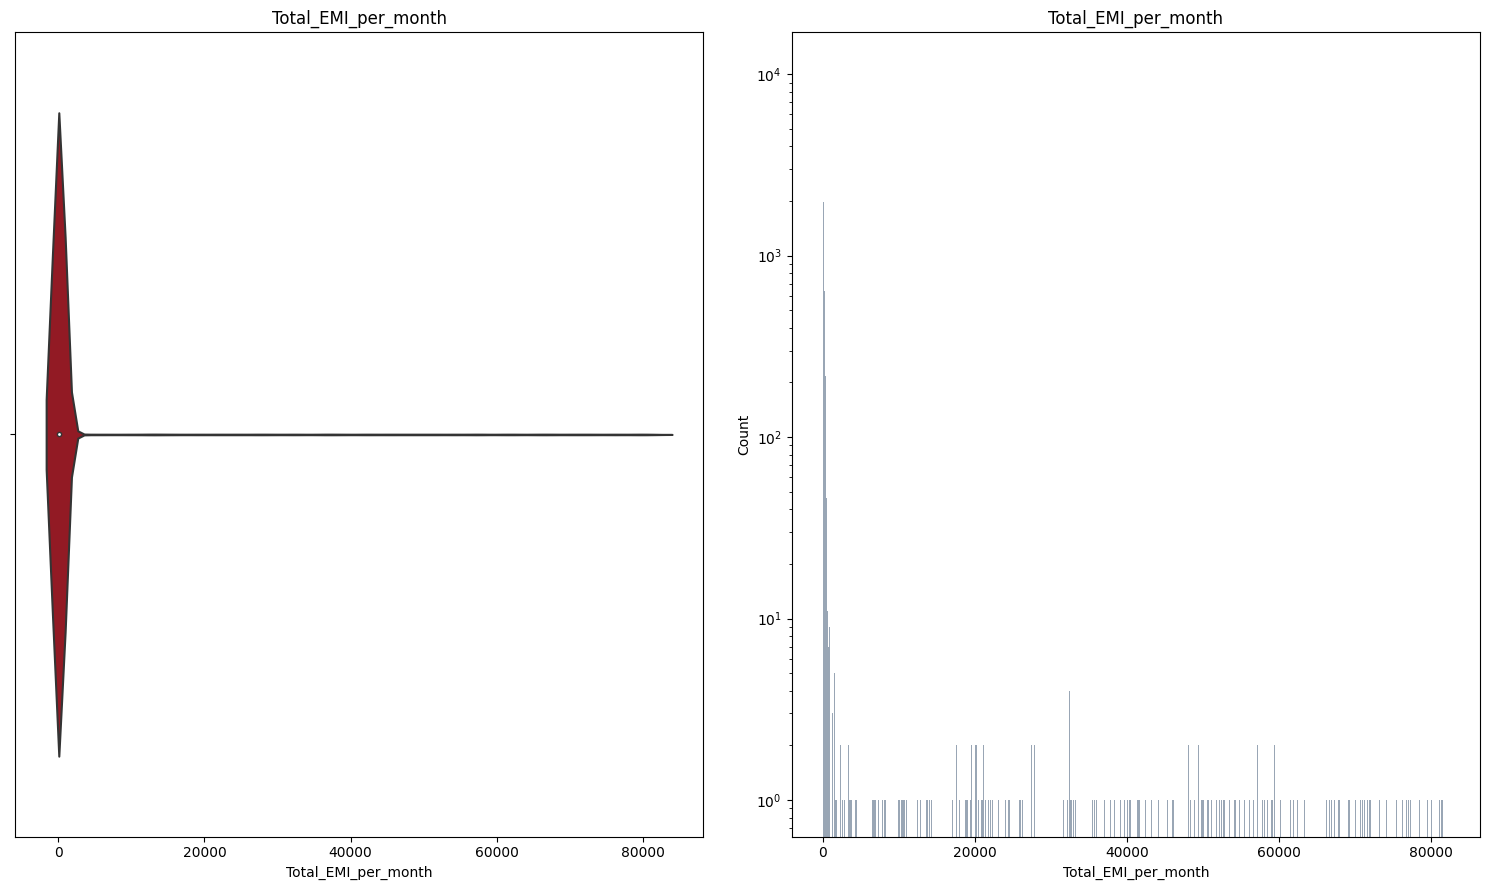

In [191]:
plot_violin_hist_feature(df_credit_score,'Total_EMI_per_month')
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

# Outliers

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


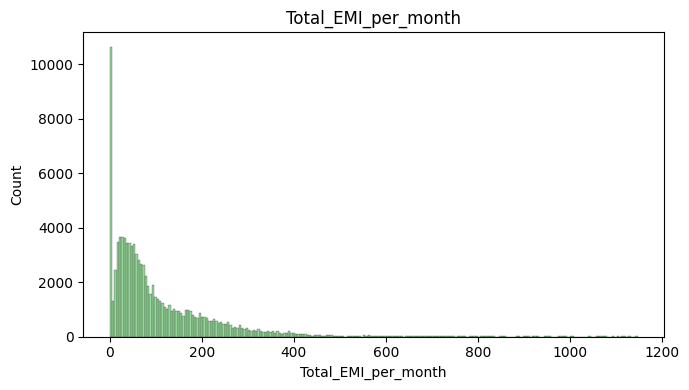

In [192]:
# Se filtran posibles outliers
values_outliers = df_credit_score[(df_credit_score['Total_EMI_per_month'] <=1150)]
plot_violin_hist_feature(values_outliers,'Total_EMI_per_month',violin=False)
#plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
#plt.show()

Outliers a partir de 1000.

In [193]:
# Se identifican las filas que consideramos outliers 
rows_with_outliers = (df_credit_score['Total_EMI_per_month']>=1100)

In [194]:
# Se actualizan los outliers 
update_outliers_by_mode(df_credit_score,'Total_EMI_per_month',rows_with_outliers)

In [195]:
# Frecuencia de la variable Total_EMI_per_month
values_uniques = df_credit_score['Total_EMI_per_month'].unique()
values_uniques.sort()
print(values_uniques) 

[   0.            4.46283747    4.71318357 ... 1093.         1094.60161307
 1095.26587589]


In [196]:
column_types = df_credit_score.dtypes
print(column_types)

Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [197]:
## Ver valores nulos
print(df_credit_score.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


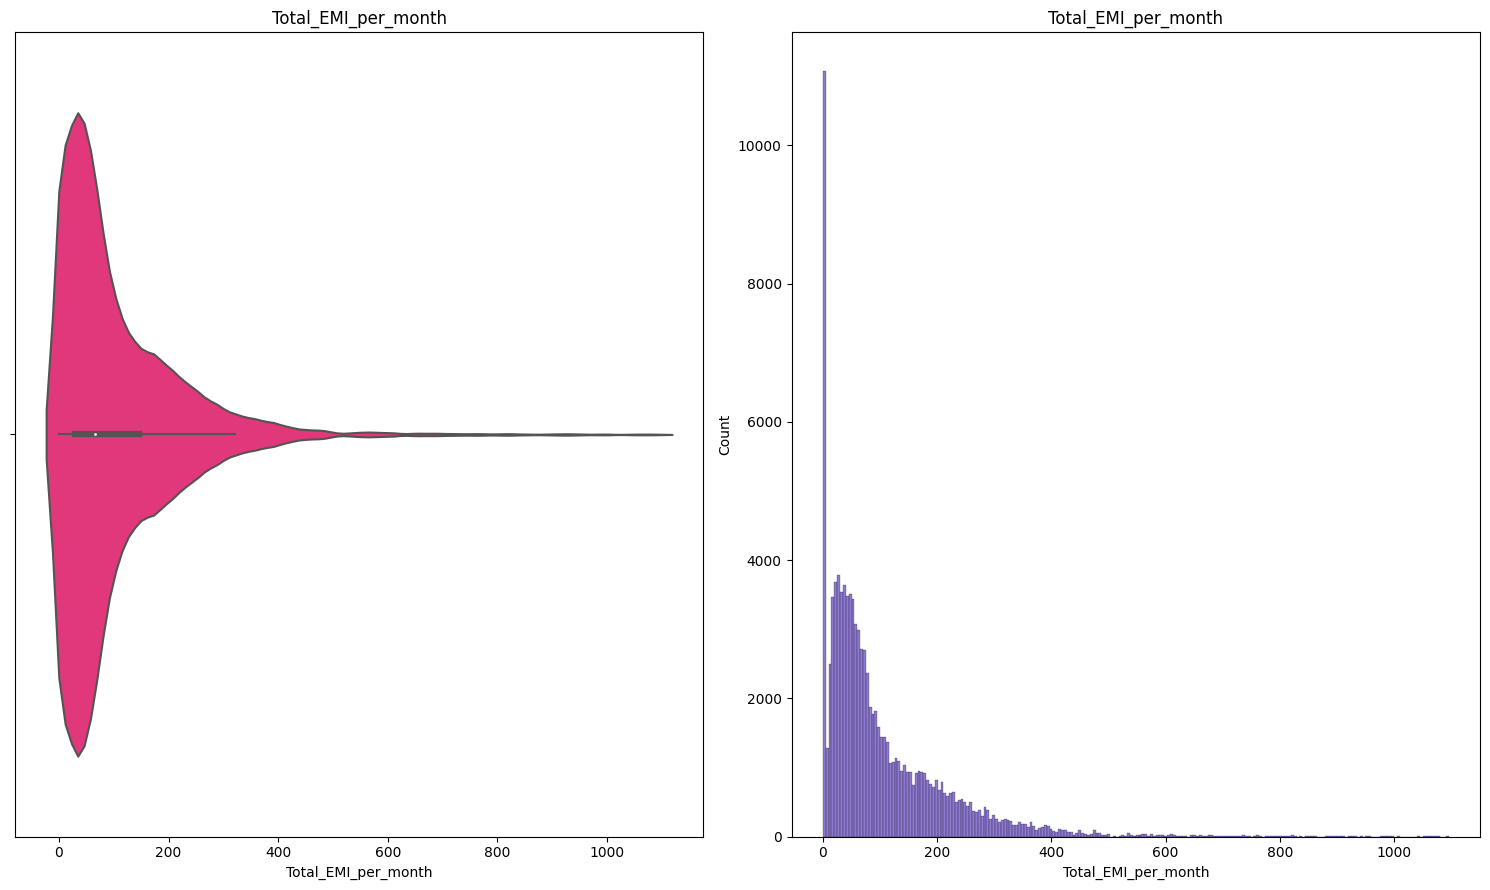

In [198]:
plot_violin_hist_feature(df_credit_score,'Total_EMI_per_month')

# Guardado del dataframe preprocesado

In [199]:
# Escribir el DataFrame en un archivo csv
df_credit_score.to_csv('df_credit_score_cleaned.csv', index=False)  # index=False para evitar escribir el índice
print("Archivo Excel creado con éxito:", 'df_credit_score_cleaned.csv')

Archivo Excel creado con éxito: df_credit_score_cleaned.csv


In [200]:
df_credit_score_cleaned = pd.read_csv('/kaggle/input/tfm-credit-score-clean-2/df_credit_score_cleaned.csv',sep=',')

In [201]:
## Ver valores nulos
print(df_credit_score_cleaned.isna().sum())

Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


## Correlación entre todas las variables numéricas y la variable objetivo

<Axes: >

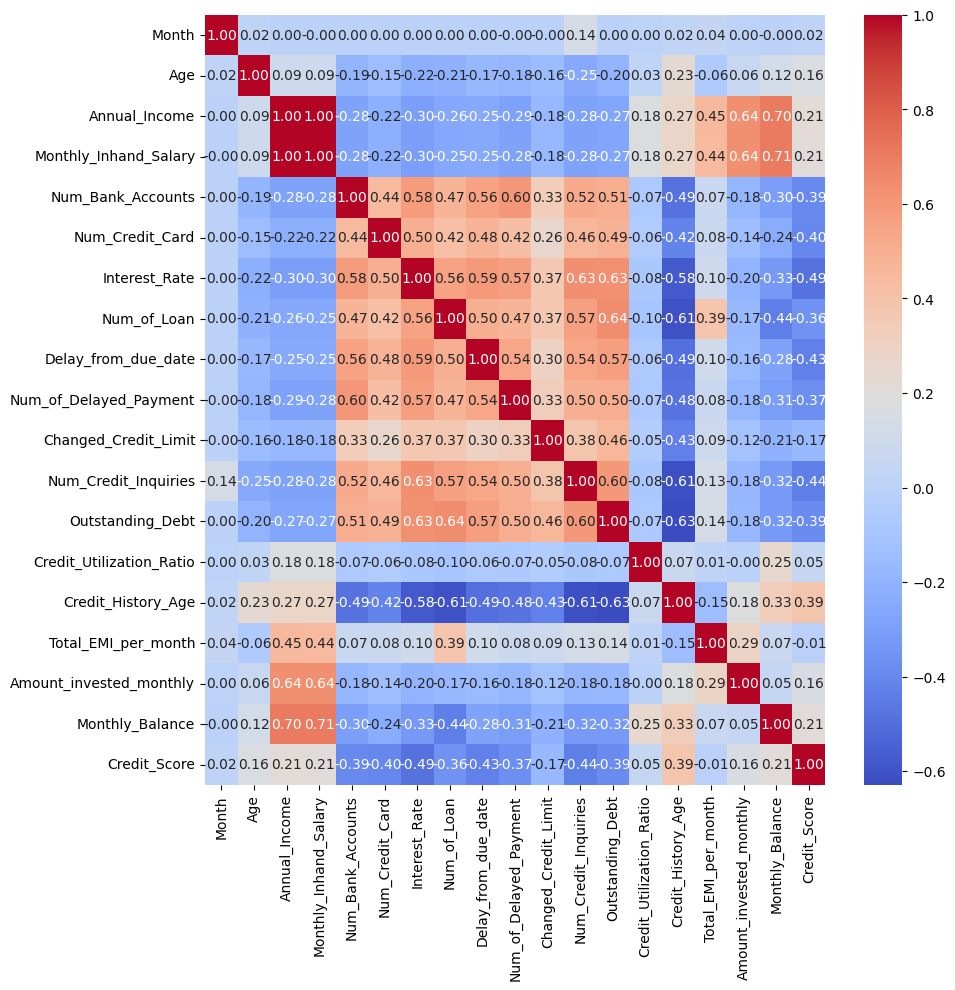

In [202]:
numeric_variables = df_credit_score_cleaned.select_dtypes(include=['number'])
# Subplot
fig, axes = plt.subplots(1, 1,figsize=(10,10))

# Se obtiene la matriz de correlación correspondiente
matriz_correlacion = numeric_variables.corr()

# Mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')

Analizando las matrices de correlación podemos ver:

- Las variables **Annual_Income y Monthly_Inhand_Salary** están muy correlacionadas entre ellas y están igual de correlacionadas con la variable objetivo, por lo que para evitar la multicolinealidad entre variables se eliminará una de ellas: **Annual_Income**.

- Algunas de las variables qué están altamente correlacionadas con el tipo de scoring crediticio son: **Num_Bank_Accounts**, **Num_Credit_Card**, **Interest Rate**, **Num_of_Loan**, **Delay_from_due_date**,**Num_of_Delayed_Payment**, **Num_Credit_Inquiries**, **Outstanding_Debt**,**Credit_History_Age**.

- Las variables **amount_invested_monthly** y **monthly_balance** tienen una fuerte correlación positiva con el **Monthly_inhand_salary**, como **Interest_rate** y **Num_of_Loan** con **Outstanding_Debt**.

- La variable **Credit_History_Age** tiene una fuerte correlación negativa con **Outstanding_Debt**, **Num_Credit_Inquiries** y **Num_of_Loan**.

## Violin plot e histograma de todas variables numéricas

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

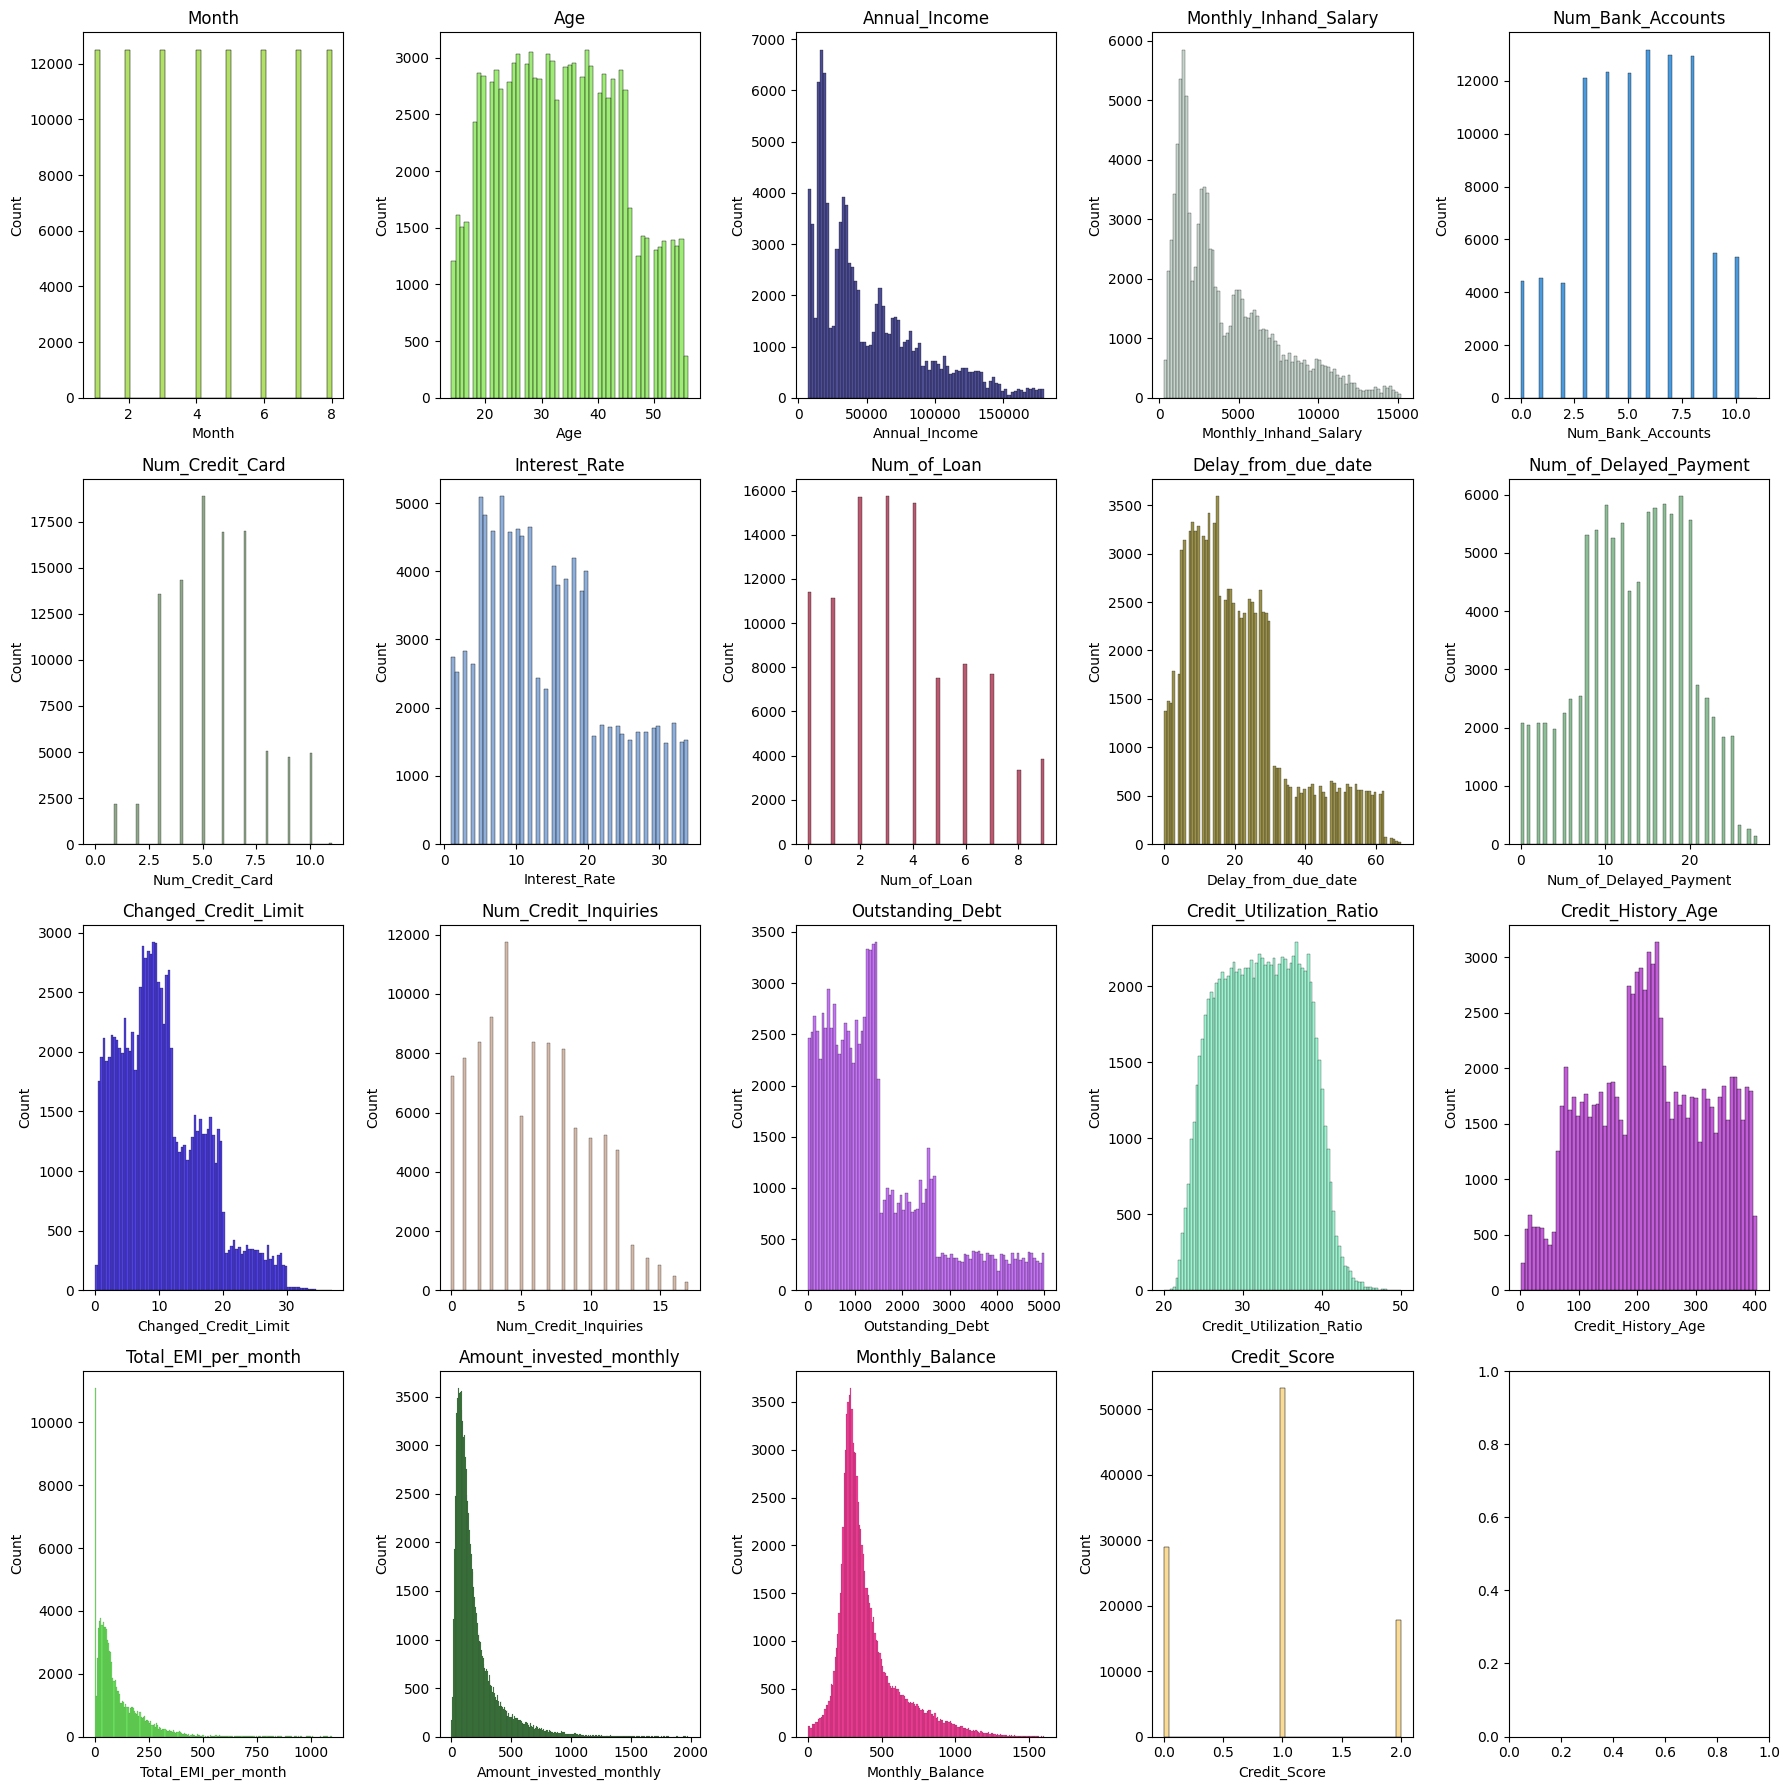

In [203]:
fig, axes = plt.subplots(4, 5, figsize=(18, 18)) 

axes = axes.flatten()

for i, feature in enumerate(numeric_variables.columns):
    sns.histplot(x=df_credit_score_cleaned[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'{feature}')
    
plt.tight_layout()


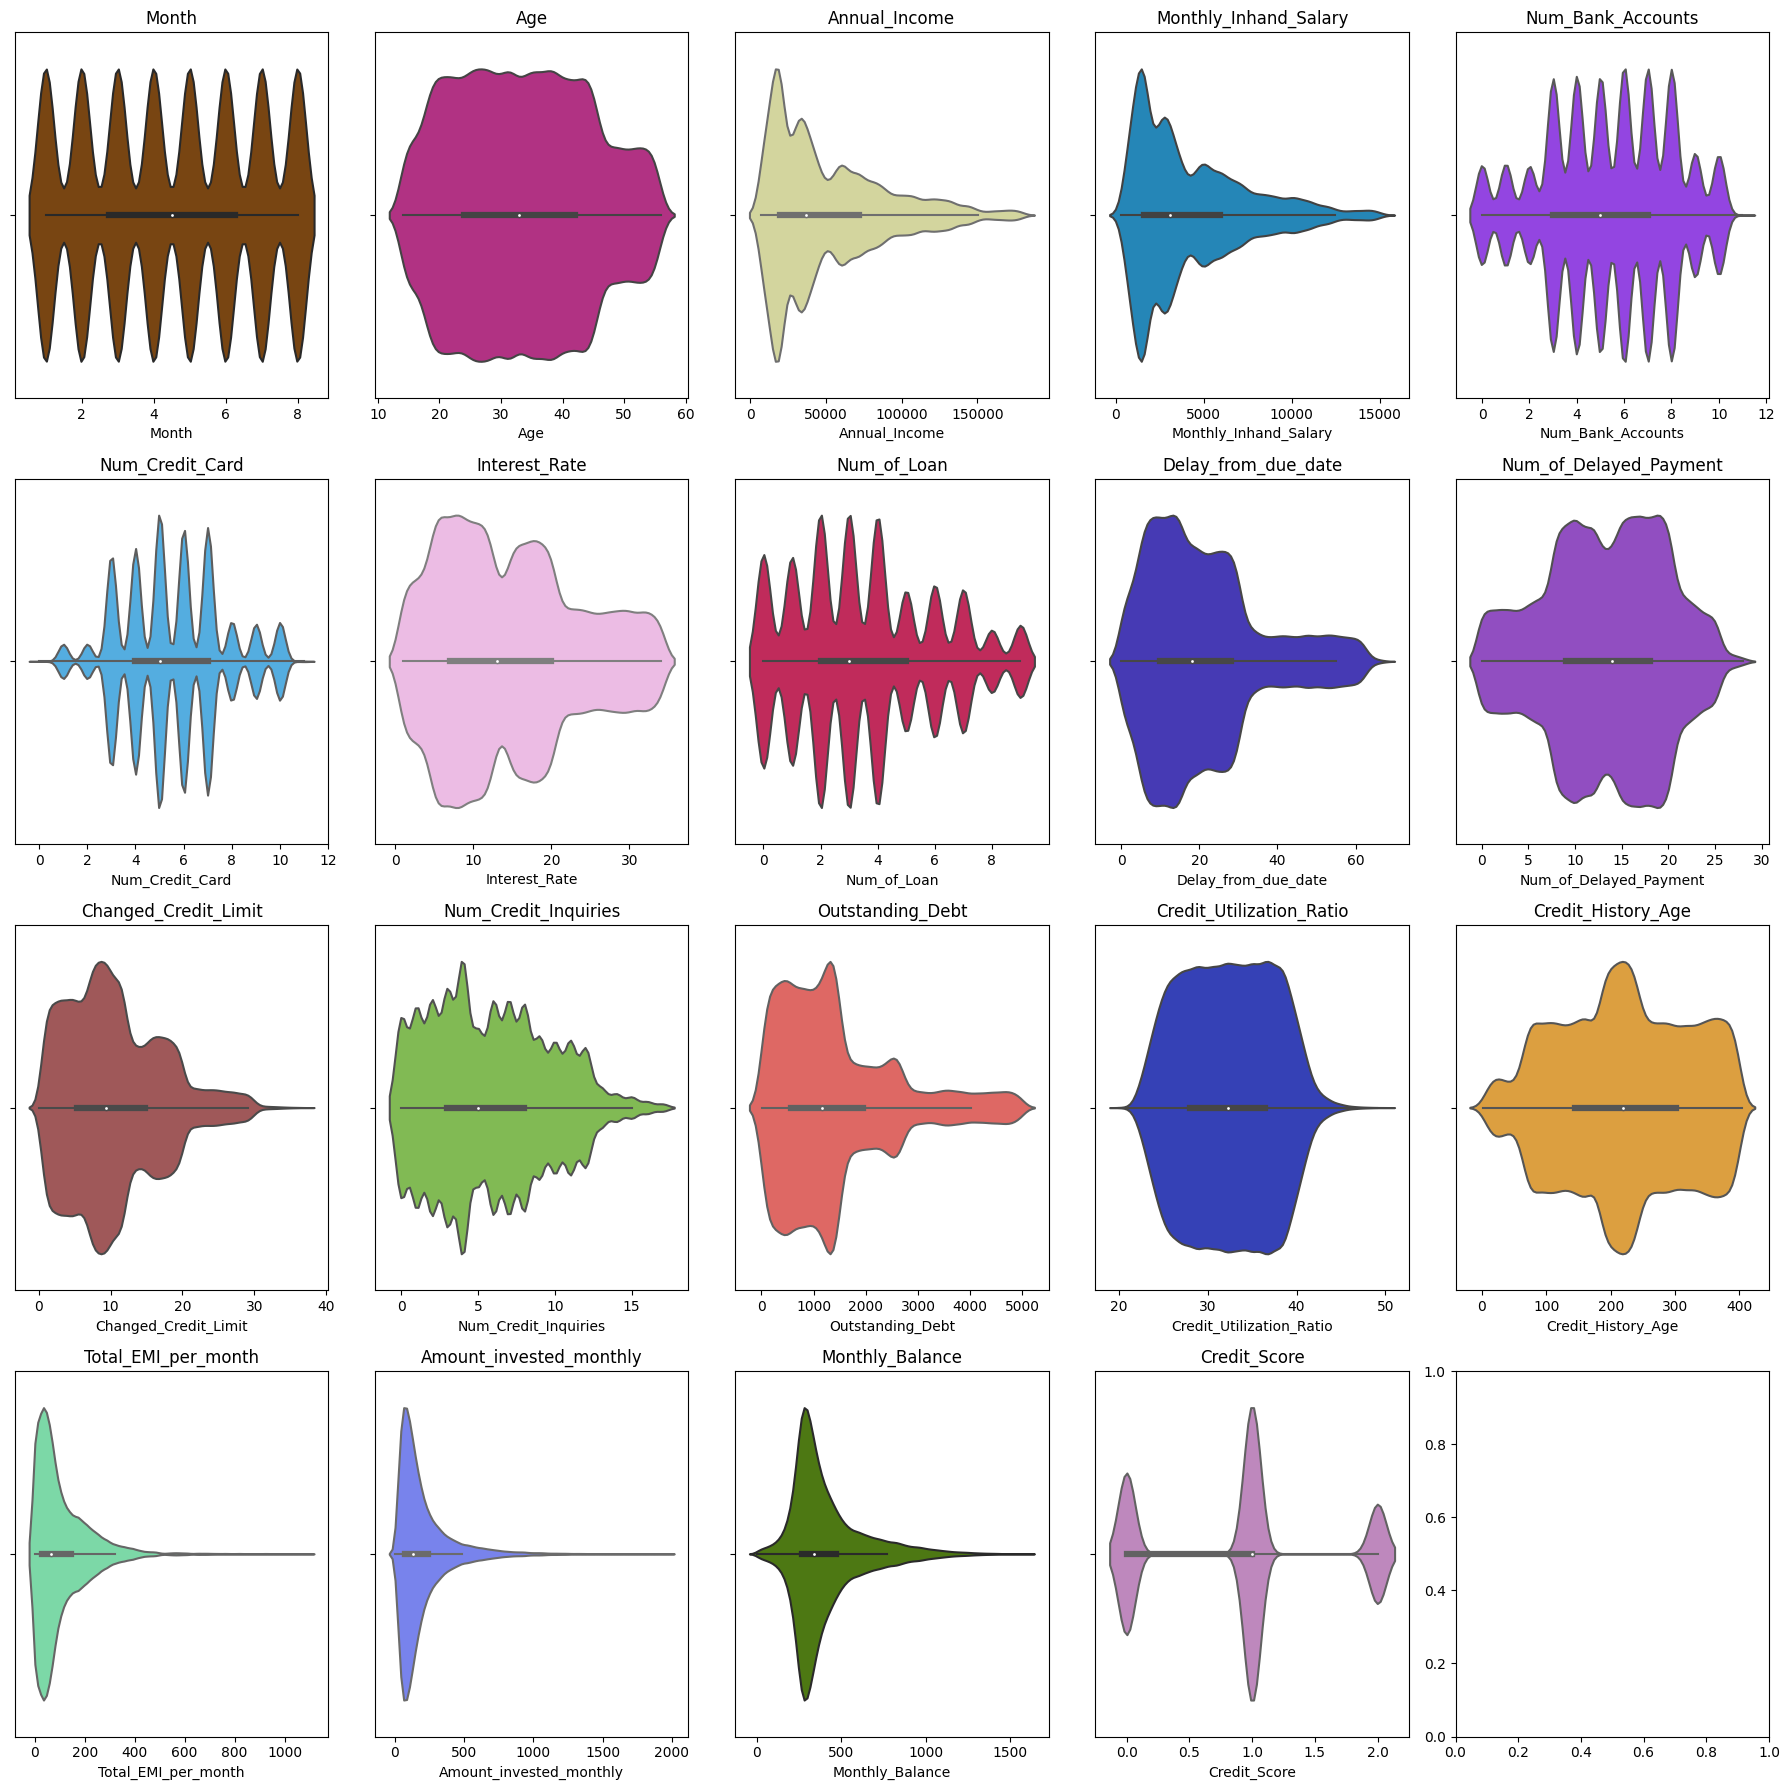

In [204]:
fig, axes = plt.subplots(4, 5, figsize=(18, 18)) 

axes = axes.flatten()

for i, feature in enumerate(numeric_variables.columns):
    sns.violinplot(x=df_credit_score_cleaned[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'{feature}')
    
plt.tight_layout()


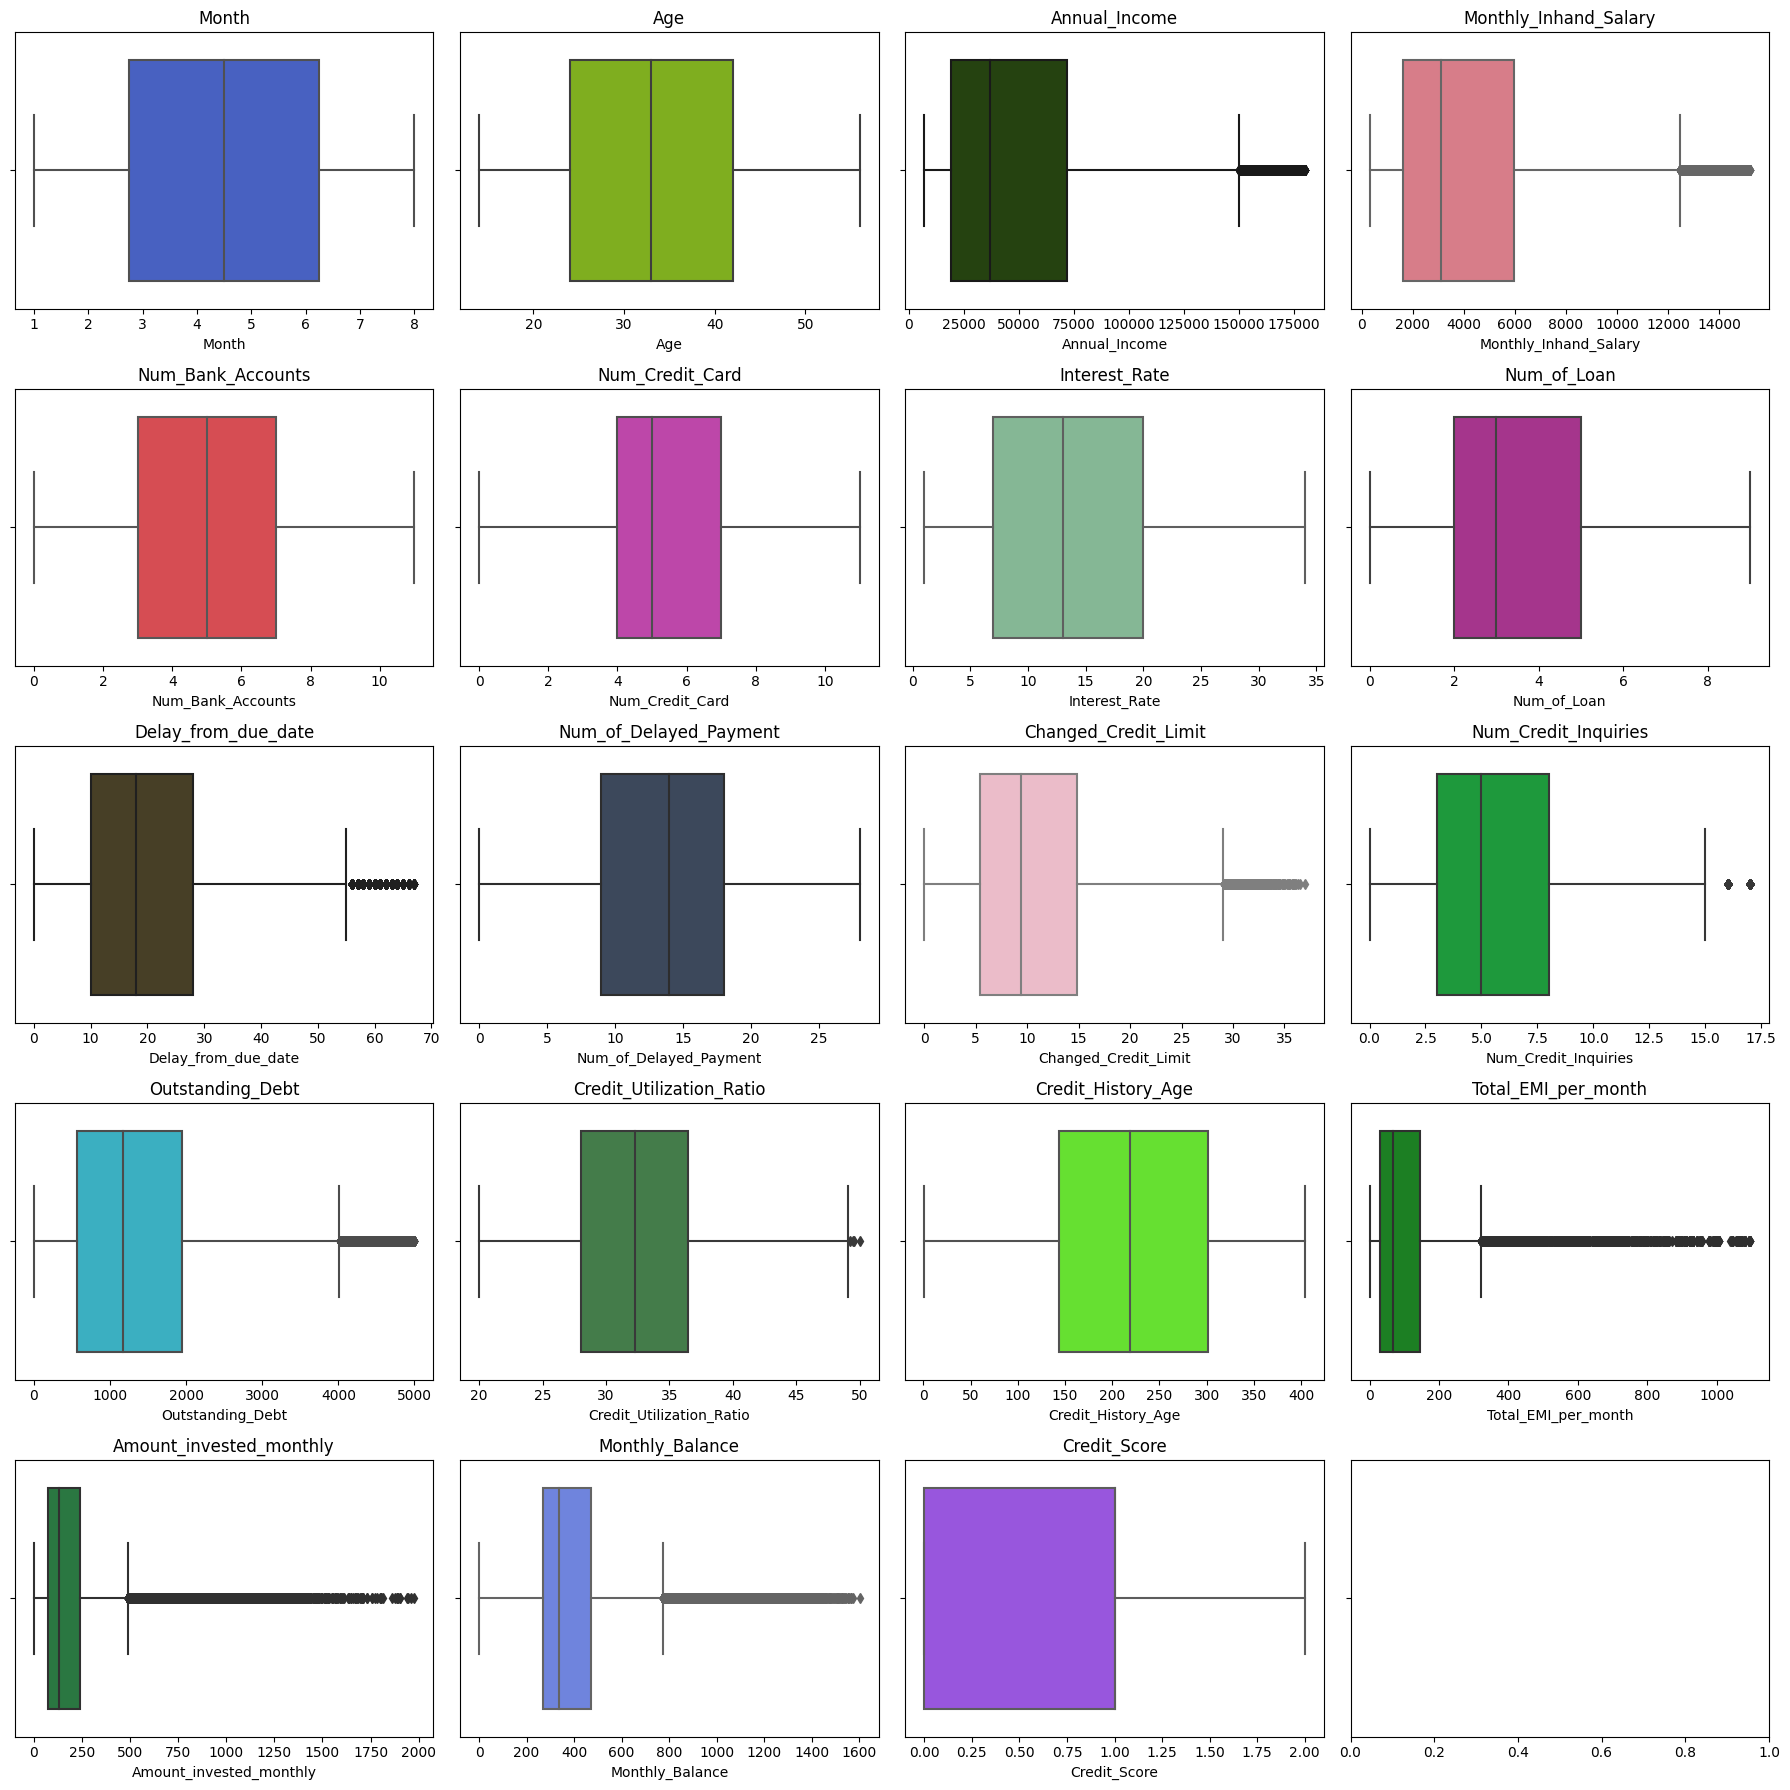

In [205]:
#sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(numeric_variables.columns):
    sns.boxplot(x=df_credit_score_cleaned[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'{feature}')  


plt.tight_layout()

plt.show()


## Variables más y menos correlacionadas con la variable objetivo

In [206]:
matrix_correlation_1 = numeric_variables.corr()

print("\n")
print("---------- Variables más correlacionadas con la variable objetivo")
print("\n")
correlations = matrix_correlation_1['Credit_Score'].abs().sort_values(ascending=False)[1:]
print(correlations)

print("\n")
print("---------- Variables menos correlacionadas con la variable objetivo")
print("\n")
correlations = matrix_correlation_1['Credit_Score'].abs().sort_values(ascending=True)[1:]
print(correlations)




---------- Variables más correlacionadas con la variable objetivo


Interest_Rate               0.485409
Num_Credit_Inquiries        0.435646
Delay_from_due_date         0.431241
Num_Credit_Card             0.404421
Credit_History_Age          0.388746
Num_Bank_Accounts           0.388164
Outstanding_Debt            0.386525
Num_of_Delayed_Payment      0.372888
Num_of_Loan                 0.358355
Annual_Income               0.212606
Monthly_Inhand_Salary       0.209725
Monthly_Balance             0.208350
Changed_Credit_Limit        0.170388
Age                         0.160345
Amount_invested_monthly     0.155921
Credit_Utilization_Ratio    0.045793
Month                       0.016291
Total_EMI_per_month         0.007636
Name: Credit_Score, dtype: float64


---------- Variables menos correlacionadas con la variable objetivo


Month                       0.016291
Credit_Utilization_Ratio    0.045793
Amount_invested_monthly     0.155921
Age                         0.160345
Changed_C

## Cálculo del Factor de inflación de la varianza para el estudio de la posible multicolinealidad entre las variables predictoras

In [207]:
# Eliminamos la variable objetivo
X = numeric_variables.drop('Credit_Score', axis=1)

# Se calcula el VIF para cada variable del dataset
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=True))



                    Variable         VIF
15       Total_EMI_per_month    4.300206
10      Changed_Credit_Limit    4.569105
0                      Month    5.032084
8        Delay_from_due_date    6.001327
12          Outstanding_Debt    6.438819
11      Num_Credit_Inquiries    7.403205
7                Num_of_Loan    8.744318
16   Amount_invested_monthly    8.950445
6              Interest_Rate    9.147719
14        Credit_History_Age   10.067001
1                        Age   10.287263
4          Num_Bank_Accounts   10.405900
9     Num_of_Delayed_Payment   10.413177
5            Num_Credit_Card   12.033435
13  Credit_Utilization_Ratio   28.704504
17           Monthly_Balance   29.761396
3      Monthly_Inhand_Salary  784.110377
2              Annual_Income  809.857359


In [208]:
# Eliminamos algunas variables por alta correlacion con otras variables
numeric_variables = numeric_variables.drop(['Annual_Income','Monthly_Inhand_Salary','Credit_Utilization_Ratio'], axis=1)

# Eliminamos la variable objetivo
X = numeric_variables.drop('Credit_Score', axis=1)

# Se calcula el VIF para cada variable del dataset
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=True))

                   Variable        VIF
13  Amount_invested_monthly   2.393683
12      Total_EMI_per_month   2.840509
8      Changed_Credit_Limit   4.487206
0                     Month   4.934866
14          Monthly_Balance   5.378568
6       Delay_from_due_date   6.000354
10         Outstanding_Debt   6.424370
9      Num_Credit_Inquiries   7.342155
5               Num_of_Loan   8.244638
11       Credit_History_Age   8.255869
4             Interest_Rate   9.109631
1                       Age   9.471883
7    Num_of_Delayed_Payment  10.286813
2         Num_Bank_Accounts  10.320753
3           Num_Credit_Card  11.711319


**Eliminaremos** del conjunto de datos las siguientes variables:

- Annual_Income

- Monthly_Inhand_Salary

- Credit_Utilization_Ratio

## Correlación entre las variables categóricas y la variable objetivo

In [209]:
# Obtener variables categóricas
categorical_variables = df_credit_score_cleaned.select_dtypes(include=['object']).columns.values

In [210]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

results_chi_squared = []

for categorical_variable in categorical_variables:
    
    # Se calcula la matriz de contingencia de los valores observados y esperados
    contingency_table = pd.crosstab(df_credit_score_cleaned[categorical_variable], df_credit_score_cleaned["Credit_Score"])
    
    # Se aplica el test chi cuadrado
    chi2_obs, p, df,_ = chi2_contingency(contingency_table)
    
    # Se calcula el valor crítico con un NC del 95 %
    critical_value = chi2.ppf(1 - 0.05, df)
    
    # Se agregan los resultados
    results_chi_squared.append({'Variable': categorical_variable, 'Chi-squared': chi2_obs, 'P-value': p,'Degrees of freedom':df,'Critical-value':critical_value})

# Tabla con los resultados
results_chi_squared = pd.DataFrame(results_chi_squared)
print(results_chi_squared)

                Variable    Chi-squared       P-value  Degrees of freedom  \
0            Customer_ID  133795.840861  0.000000e+00               24998   
1                   Name  108816.794660  0.000000e+00               20276   
2             Occupation     180.685888  2.907104e-24                  28   
3           Type_of_Loan   67905.898379  0.000000e+00               12520   
4             Credit_Mix   40489.417662  0.000000e+00                   4   
5  Payment_of_Min_Amount   22420.443703  0.000000e+00                   2   
6      Payment_Behaviour    1498.059487  0.000000e+00                  10   

   Critical-value  
0    25366.919254  
1    20608.365971  
2       41.337138  
3    12781.414229  
4        9.487729  
5        5.991465  
6       18.307038  


Viendo los resultados de la tabla anterior, podemos ver que:

- El estadístico chi cuadrado observado es mayor al valor crítico obtenido para todas las variables para un intervalo de confianza del 97%.

    – 133.795,84 > 25.366,91 
    
    – 108.816,79 > 20.608,36 
    
    – 180,68 > 41,33
    
    – 67.905,89,84 > 12781,41 
    
    – 40.489,41 > 9,48 
    
    – 22.420,44 > 5,99
   
    – 1498,05 > 18,30 
    
- El p-valor obtenido vuelve es prácticamente cero, que es inferior al nivel de significancia tomado. 

    – 0 < 0.05 
    
Por lo tanto, se rechaza la hipótesis nula a favor de la alternativa, es decir, todas tienen relación con la variable  objetivo.

# Eliminacion de Variables

Eliminamos variables que están muy correlacionadas entre ellas y las que que no aportan valor predictivo (customer_id y name).

In [211]:
# Eliminamos variables muy correlacionadas con otras
df_credit_score_cleaned = df_credit_score_cleaned.drop(['Customer_ID',"Name",'Annual_Income',"Credit_Utilization_Ratio"], axis=1)
df_credit_score_cleaned = df_credit_score_cleaned.drop(['Month'], axis=1)
df_credit_score_cleaned = df_credit_score_cleaned.drop(['Monthly_Balance'], axis=1)

# Division de los datos en conjuntos de train (80 %) y test (20 %)

## Variable objetivo numerica

In [212]:

# Se definen las variables y la variable objetivo
X = df_credit_score_cleaned.loc[:,df_credit_score_cleaned.columns!='Credit_Score']
Y = df_credit_score_cleaned.loc[:, 'Credit_Score']

# División en conjunto de train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/5,random_state=24,stratify=Y) 

# Verificar si el conjunto de entrenamiento esta bien balanceado o no 
chas_frequence = y_train.value_counts()
chas_frequence

print("Hay "+str(X_train.shape[0])+" instancias en el conjunto de entrenamiento y "+str(X_test.shape[0])+" instancias en el conjunto de test")

Hay 80000 instancias en el conjunto de entrenamiento y 20000 instancias en el conjunto de test


# Target Encoder de las variables categoricas

Se va a utilizar la técnica **Target_Encoder** para transformar las variables categóricas a un formato numérico, de modo que puedan ser utilizadas por algoritmos de aprendizaje automático.

In [213]:
# Se aplica Target Encoder codificando las variables categoricas, asignando a cada categoria 
# el promedio de la varible objetivo junto con probabilidades

# Se obtienen las variables categoricas
categorical_variables = df_credit_score_cleaned.select_dtypes(include=['object']).columns.values

In [214]:
# Variables categóricas en el conjunto de entrenamiento
X_train_categorical = X_train[categorical_variables]

# Variables categóricas en el conjunto de test
X_test_categorical = X_test[categorical_variables]

In [215]:
# Se crea instancia de LeaveOneOutEncoder
encoder = TargetEncoder(smoothing=1.0)

# Se aplica a las variables categóricas del conjunto de entrenamiento
X_train_encoded = encoder.fit_transform(X_train_categorical, y_train)

# Guardamos encoder
joblib.dump(encoder, 'encoder_train.joblib')

# Se transforman las variables categóricas del conjunto de test
X_test_encoded = encoder.transform(X_test_categorical)

In [216]:
# Variables encodeadas
encoded_variables = encoder.get_feature_names_out()

# Se reemplazan las variables codificadas por las variables categoricas originales en train
X_test[encoded_variables] = X_test_encoded

# Se reemplazan las variables codificadas por las variables categoricas originales en train
X_train[encoded_variables] = X_train_encoded

# Guardado dataframe encodeado

In [217]:
# Escribir el DataFrame en un archivo csv
X_train.to_csv('df_credit_score_cleaned_encoded_train.csv', index=False)  # index=False para evitar escribir el índice
X_test.to_csv('df_credit_score_cleaned_encoded_test.csv', index=False)  # index=False para evitar escribir el índice

print("Archivo Excel creado con éxito")

Archivo Excel creado con éxito


In [218]:
# Encodeados con target encoder
#df_credit_score_cleaned_encoded_train = pd.read_csv('/kaggle/input/tfm-encoded-train-2/df_credit_score_cleaned_encoded_train_2.csv',sep=',')
#df_credit_score_cleaned_encoded_test = pd.read_csv('/kaggle/input/tfm-encoded-test-2/df_credit_score_cleaned_encoded_test_2.csv',sep=',')

# Encodeados con target encoder
#df_credit_score_cleaned_encoded_train = pd.read_csv('/kaggle/input/tfm-credit-score-cleaned-encoded-train/df_credit_score_cleaned_encoded_train.csv',sep=',')
#df_credit_score_cleaned_encoded_test = pd.read_csv('/kaggle/input/tfm-credit-score-cleaned-encoded-test/df_credit_score_cleaned_encoded_test.csv',sep=',')

# Encodeados con target encoder
df_credit_score_cleaned_encoded_train = pd.read_csv('/kaggle/input/tfm-credit-score-cleaned-encoded-train-def/df_credit_score_cleaned_encoded_train-2.csv',sep=',')
df_credit_score_cleaned_encoded_test = pd.read_csv('//kaggle/input/tfm-credit-score-cleaned-encoded-test-def/df_credit_score_cleaned_encoded_test-2.csv',sep=',')

In [219]:
column_types = df_credit_score_cleaned_encoded_train.dtypes
print(column_types)

Age                          int64
Occupation                 float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts            int64
Num_Credit_Card              int64
Interest_Rate                int64
Num_of_Loan                  int64
Type_of_Loan               float64
Delay_from_due_date          int64
Num_of_Delayed_Payment       int64
Changed_Credit_Limit       float64
Num_Credit_Inquiries         int64
Credit_Mix                 float64
Outstanding_Debt           float64
Credit_History_Age           int64
Payment_of_Min_Amount      float64
Total_EMI_per_month        float64
Amount_invested_monthly    float64
Payment_Behaviour          float64
dtype: object


In [220]:
# Valores nulos
print(df_credit_score_cleaned_encoded_train.isnull().sum())
print(df_credit_score_cleaned_encoded_test.isnull().sum())

Age                        0
Occupation                 0
Monthly_Inhand_Salary      0
Num_Bank_Accounts          0
Num_Credit_Card            0
Interest_Rate              0
Num_of_Loan                0
Type_of_Loan               0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Credit_Mix                 0
Outstanding_Debt           0
Credit_History_Age         0
Payment_of_Min_Amount      0
Total_EMI_per_month        0
Amount_invested_monthly    0
Payment_Behaviour          0
dtype: int64
Age                        0
Occupation                 0
Monthly_Inhand_Salary      0
Num_Bank_Accounts          0
Num_Credit_Card            0
Interest_Rate              0
Num_of_Loan                0
Type_of_Loan               0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Credit_Mix                 0
Outstanding_Debt           0
Credit_History_Age         0
P

# Estandarización


Ajustamos la escala de los datos para que tengan una media de cero y una desviación estándar de uno para aplicar algoritmos que pueden ser sensibles a las diferencias en la escala de las características.

In [221]:
# Clase StandardScaler
scaler = StandardScaler()

# Se escala los df a un array (train y test)
credit_score_standardized_train = scaler.fit_transform(df_credit_score_cleaned_encoded_train)
credit_score_standardized_test = scaler.transform(df_credit_score_cleaned_encoded_test)

# Se crea los dfs estandarizado (train y test)
df_credit_score_standardized_train = pd.DataFrame(credit_score_standardized_train, columns=df_credit_score_cleaned_encoded_train.columns)
df_credit_score_standardized_test = pd.DataFrame(credit_score_standardized_test, columns=df_credit_score_cleaned_encoded_test.columns)

# Aplicacion Centroides

In [222]:
# Reenumeramos los índices
y_test.index = range(y_test.shape[0])
y_train.index = range(y_train.shape[0])

## Df encodeado

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


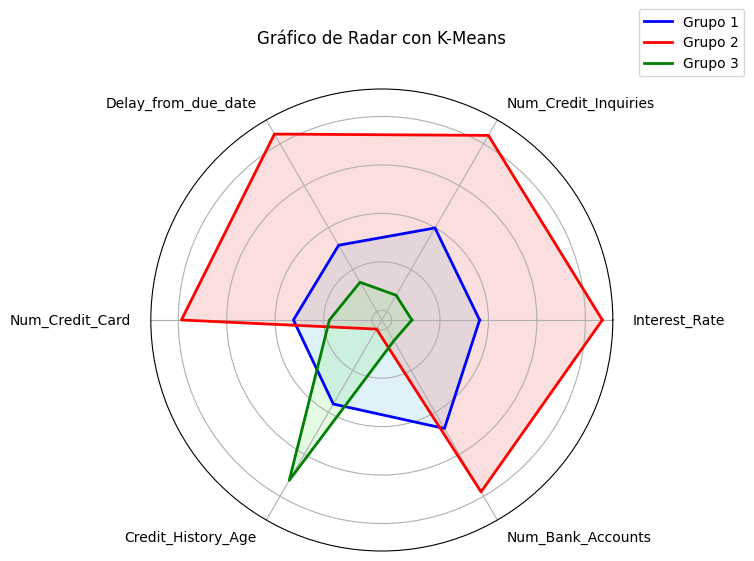

<Figure size 640x480 with 0 Axes>

In [223]:
# Fuente: https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

variables = ['Interest_Rate', 'Num_Credit_Inquiries', 'Delay_from_due_date', 'Num_Credit_Card', 'Credit_History_Age', 'Num_Bank_Accounts']

# K-Means
kmeans = cluster.KMeans(n_clusters=3, random_state=100)
kmeans = kmeans.fit(df_credit_score_standardized_train[variables])

# Grupos formados
labels = kmeans.labels_

# Centroides
centroids = kmeans.cluster_centers_

# Ángulos para cada variable
angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False)

# Se cierra el círculo con el primer ángulo
angles = np.concatenate((angles, [angles[0]]))

# Gráfico polar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.set_rlabel_position(45)  

# Se rellena el área entre centroides y ángulos 
ax.fill(angles, np.append(centroids[0], centroids[0][0]), color='skyblue', alpha=0.25)
ax.fill(angles, np.append(centroids[1], centroids[1][0]), color='lightcoral', alpha=0.25)
ax.fill(angles, np.append(centroids[2], centroids[2][0]), color='lightgreen', alpha=0.25)

# Se marcan los centroides
ax.plot(angles, np.append(centroids[0], centroids[0][0]), 'b-', linewidth=2, label='Grupo 1')
ax.plot(angles, np.append(centroids[1], centroids[1][0]), 'r-', linewidth=2, label='Grupo 2')
ax.plot(angles, np.append(centroids[2], centroids[2][0]), 'g-', linewidth=2, label='Grupo 3')

# Etiquetas para cada variable
ax.set_thetagrids((np.linspace(0, 2*np.pi, len(variables), endpoint=False)) * 180/np.pi, variables)

# Se ocultan los números del eje radial
ax.set_yticklabels([])

# Añadir leyenda
ax.legend(loc='center right', bbox_to_anchor=(1.3, 1.1))

# Añadir título
ax.set_title('Gráfico de Radar con K-Means',y=1.08)

# Se ajustan las etiquetas
for label, angle in zip(ax.get_xticklabels(), angles):
    if np.pi/2 <= angle <= 3*np.pi/2:
        label.set_horizontalalignment('right')
    else:
        label.set_horizontalalignment('left')

#
plt.show()
plt.tight_layout()


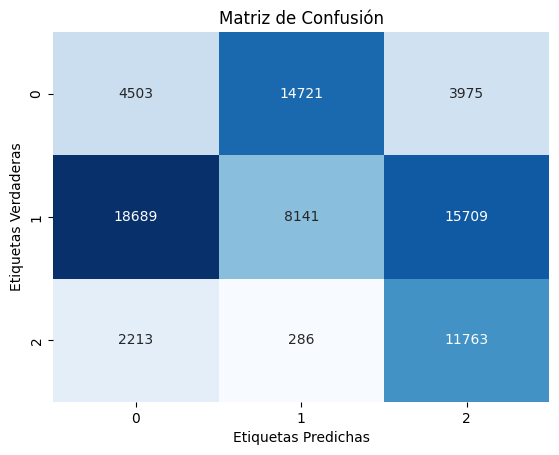

In [224]:
# Matriz de confusión
matrix_confusion = confusion_matrix(y_train,labels)

sns.heatmap(matrix_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

- **Grupo 0 (25405)**
    - 4503 observaciones son 0 -> **17.7 % bien clasificadas**
    - 18689 observaciones son 1 -> 74.27 %
    - 2213 observaciones son 2 -> 8.71 %
    
- **Grupo 1 (23148)** 
    - 14721 observaciones son 0 -> 63.6 % 
    - 8141 observaciones son 1 -> **35.17 % bien clasificadas**
    - 286 observaciones son 2 -> 1.24 %
    
- **Grupo 2 (31447)**
    - 3975 observaciones son 0 -> 12.64 % 
    - 15709 observaciones son 1 -> 49.95 %
    - 11763 observaciones son 2 -> **37.41 % bien clasificadas**

# Algoritmos Supervisados

Vamos a hacer un resumen de los datos obtenidos tras hacer divisiones en conjuntos de train y test, así como con los datos estandarizados y oversampling.

Para poder evaluar el rendimiento de los modelos se aplicaron divisiones en conjuntos de entrenamiento y prueba para obtener una primera evaluación del modelo. Posteriormente, se estandarizaron los datos para garantizar que todas las variables contribuyeran de manera equitativa para el aprendizaje del modelo. Por último, se aplicarán técnicas de oversampling como **SMOTE** para resolver el problema del desequilibrio entre clases e intentar mejorar la robustez y capacidad clasificatoria del modelo.

El árbol de división es el siguiente partiendo del primer conjunto preprocesado (menos la codificación de las variables categóricas): **df_credit_score_cleaned**:

- df_credit_score_cleaned (80/20): **X_train**, **X_test**, **y_train**, **y_test**:

    - **X_train**: se aplica target encoder y se consigue :

        - **df_credit_score_cleaned_encoded_train**: conjunto de entrenamiento preprocesado y listo para el modelado. Se estandariza y obtenemos:
        
             - **df_credit_score_standardized_train**: conjunto anterior pero estandarizado con unan media de 0 y desviación típica de 1.

    - **X_test**: se aplica target encoder y se consigue :

        - **df_credit_score_cleaned_encoded_test**: conjunto de test preprocesado y listo para el modelado. Se estandariza y obtenemos:
        
             - **df_credit_score_standardized_test**: conjunto anterior pero estandarizado con unan media de 0 y desviación típica de 1.

In [225]:
# Conjuntos creados hasta ahora y sus dimensiones
print("Conjuntos de x train:")
print("Conjunto de train original: "+str(df_credit_score_cleaned_encoded_train.shape))
print("Conjunto de train original estandarizado: "+str(df_credit_score_standardized_train.shape)+"\n")

print("Conjuntos de x test:")
print("Conjunto de test original: "+str(df_credit_score_cleaned_encoded_test.shape))
print("Conjunto de test original estandarizado: "+str(df_credit_score_standardized_test.shape)+"\n")

print("Conjunto de y train:")
print(str(y_train.shape)+"\n")

print("Conjunto de y test:")
print(str(y_test.shape)+"\n")

Conjuntos de x train:
Conjunto de train original: (80000, 19)
Conjunto de train original estandarizado: (80000, 19)

Conjuntos de x test:
Conjunto de test original: (20000, 19)
Conjunto de test original estandarizado: (20000, 19)

Conjunto de y train:
(80000,)

Conjunto de y test:
(20000,)



In [226]:
# Reenumeramos los índices
y_test.index = range(y_test.shape[0])
y_train.index = range(y_train.shape[0])

In [227]:
def grid_search_model(model,grid_values,cv,X_train,y_train):
    '''
    Dado un modelo de machine learning, se realiza una validación cruzada en forma de rejilla para buscar los mejores hiperparámetros.
    
    Se devuelve el estimador entrenado
    '''
    # Búsqueda por grid search basada en validación cruzada y se entrena la rejilla
    grid_search = GridSearchCV(estimator = model, 
                          param_grid = grid_values,
                          cv = cv,
                          n_jobs = -1,refit=True,scoring='accuracy')
             
    # Entrenamos el grid search basada en validación cruzada
    grid_search.fit(X_train,y_train)
    
    return grid_search
    

# Decision Tree

In [228]:
# Se crea clasificador
model = DecisionTreeClassifier(random_state=24)

# Se definen los distintos valores de los hiperparámetros max_depth y min_samples_split
max_depth = range(4,11)
min_samples_split = [2, 10, 20, 50, 100]

# Grid values
grid_values = {'max_depth': max_depth,
               'min_samples_split':min_samples_split
}

# Se aplica grid search (Decision Tree)
model_dt = grid_search_model(model,grid_values,3,df_credit_score_cleaned_encoded_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [229]:
# Obtener el estimador del mejor modelo
best_model_dt = model_dt.best_estimator_

best_params = model_dt.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_dt.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'max_depth': 9, 'min_samples_split': 2}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 75.56 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'max_depth': 9, 'min_samples_split': 2}
 con un valor del 75.56
-----------------------------------------------------------------------------------------------------------------------------------


In [230]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_dt.predict(df_credit_score_cleaned_encoded_train)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_dt.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train,pred_Y_train)
print("El accuracy obtenido del modelo del árbol de decisión simple en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del árbol de decisión simple en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_dt = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_dt = json.dumps(report_dt, indent=4)
print('Classification Report:\n', report_dt)

El accuracy obtenido del modelo del árbol de decisión simple en el conjunto de train es del 76.92%
El accuracy obtenido del modelo del árbol de decisión simple en el conjunto de test es de 73.66%

Accuracy: 0.7366
Classification Report:
 {
    "0": {
        "precision": 0.7471684962537027,
        "recall": 0.7394378341093292,
        "f1-score": 0.7432830646559196,
        "support": 5799
    },
    "1": {
        "precision": 0.7761950286806883,
        "recall": 0.7634226610249177,
        "f1-score": 0.7697558663190329,
        "support": 10635
    },
    "2": {
        "precision": 0.611681136543015,
        "recall": 0.6519910263600673,
        "f1-score": 0.6311931586806028,
        "support": 3566
    },
    "accuracy": 0.7366,
    "macro avg": {
        "precision": 0.711681553825802,
        "recall": 0.7182838404981048,
        "f1-score": 0.7147440298851852,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.7384459586353368,
        "recall": 0.7

In [231]:
def plot_confusion_matrix_train_test(confusion_matrix):

    """Visualiza las matrices de confusión del conjunto de test mediante un mapa de calor
    
    Args:
        confusion_matrix: np.ndarray
            matriz de confusión.
    """
    # Visualización de las matrices de confusión
    fig, axes = plt.subplots(1, 1,figsize = (5, 5))
    sns.heatmap(confusion_matrix,annot=True,cmap='coolwarm',fmt="d")
    axes.set_title("Matriz de confusión sobre conjunto de test")
    axes.set_ylabel('Predicción')
    axes.set_xlabel('Realidad')

    plt.tight_layout()

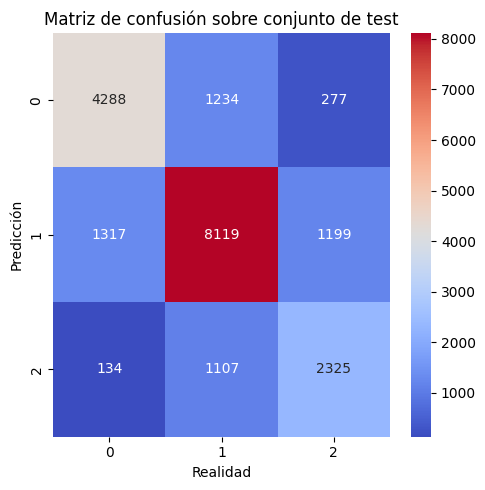

In [232]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Shap Values

In [233]:
# Fuente: https://shap-lrjball.readthedocs.io/en/latest/api.html#plots

# Se crea un objeto explainer para el modelo
explainer_model_dt = shap.Explainer(best_model_dt)

# Se calculan los valores SHAP para el conjunto de datos de prueba
shap_values_model_dt = explainer_model_dt.shap_values(df_credit_score_cleaned_encoded_test)

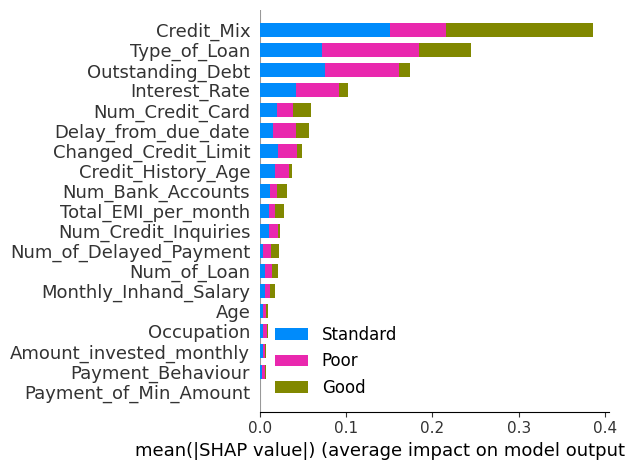

In [234]:
# Gráfico resumen
shap.summary_plot(shap_values_model_dt, df_credit_score_cleaned_encoded_test,class_names=["Poor", "Standard", "Good"],plot_size=None)

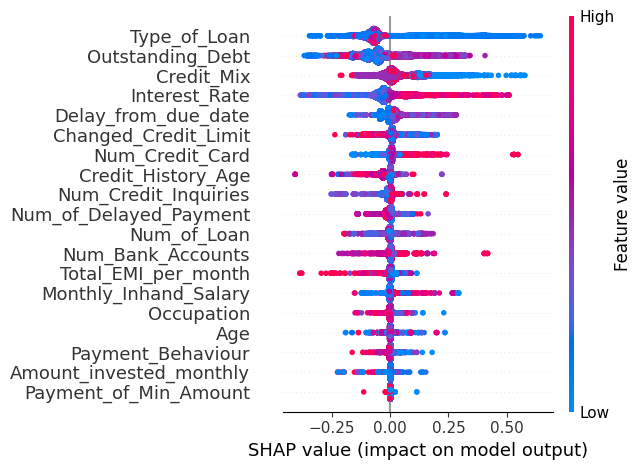

In [235]:
# Primer Gráfico resumen 
shap.summary_plot(shap_values_model_dt[0], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

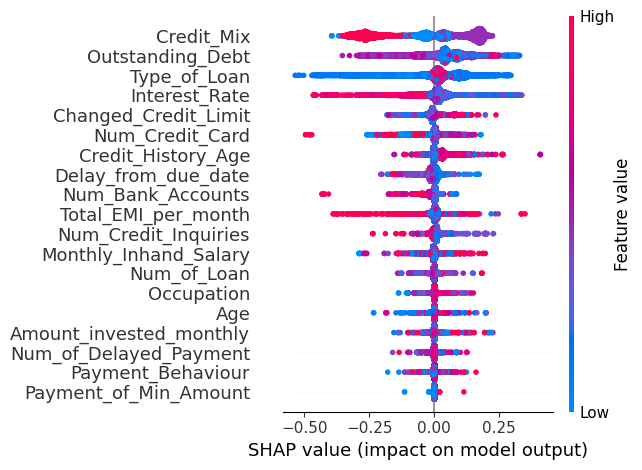

In [236]:
# Segundo Gráfico resumen 
shap.summary_plot(shap_values_model_dt[1], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

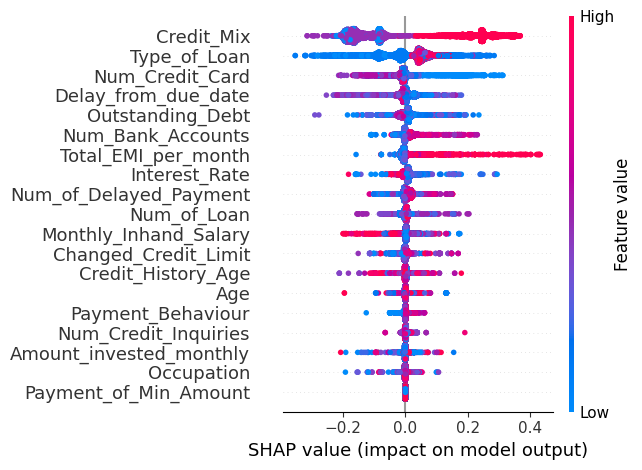

In [237]:
# Tercer Gráfico resumen 
shap.summary_plot(shap_values_model_dt[2], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

# Random Forests

In [238]:
# Se crea clasificador
rf_model = RandomForestClassifier(random_state=24)

In [239]:
# Se definen los distintos valores de los hiperparámetros max_depth y n_estimators
max_depth = range(8,13)
n_estimators = [50,100,200]

# Grid values
grid_values = {'max_depth': max_depth,
               'n_estimators':n_estimators}

# Se aplica grid search (Random Forest)
model_rf = grid_search_model(rf_model,grid_values,3,df_credit_score_cleaned_encoded_train,y_train)


In [240]:
# Obtener el mejor modelo
best_model_rf = model_rf.best_estimator_

best_params = model_rf.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_rf.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")


-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'max_depth': 12, 'n_estimators': 200}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 77.56 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'max_depth': 12, 'n_estimators': 200}
 con un valor del 77.56
-----------------------------------------------------------------------------------------------------------------------------------


In [241]:

# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_rf.predict(df_credit_score_cleaned_encoded_train)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_rf.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train,pred_Y_train)
print("El accuracy obtenido del modelo del random forest en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del random forest en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_rf = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_rf = json.dumps(report_rf, indent=4)
print('Classification Report:\n', report_rf)

El accuracy obtenido del modelo del random forest en el conjunto de train es del 80.03%
El accuracy obtenido del modelo del random forest en el conjunto de test es de 75.46%

Accuracy: 0.75455
Classification Report:
 {
    "0": {
        "precision": 0.7806873977086743,
        "recall": 0.7403000517330575,
        "f1-score": 0.7599575146043548,
        "support": 5799
    },
    "1": {
        "precision": 0.7896356119603885,
        "recall": 0.7722614010343206,
        "f1-score": 0.780851872979654,
        "support": 10635
    },
    "2": {
        "precision": 0.6304878048780488,
        "recall": 0.7249018508132361,
        "f1-score": 0.6744064701278372,
        "support": 3566
    },
    "accuracy": 0.75455,
    "macro avg": {
        "precision": 0.7336036048490372,
        "recall": 0.745821101193538,
        "f1-score": 0.7384052859039487,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.7586650232353228,
        "recall": 0.75455,
        "f1-sc

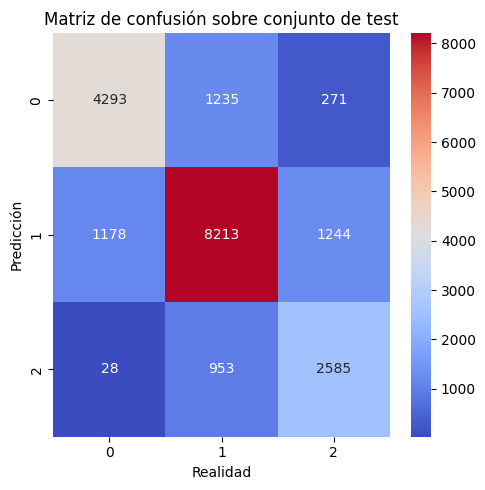

In [242]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Aplicacion de SMOTE al conjunto sin estandarizar

Se aplica la técnica de oversampling **SMOTE** para aumentar el conjunto de entrenamiento y poder mejorar el accuracy del modelo.

In [243]:
# Smote
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(df_credit_score_cleaned_encoded_train, y_train)
print("Dimensiones de los conjuntos tras aplicar SMOTE:\n")
print("Conjunto X_Train_resampled: "+str(X_train_resampled.shape))
print("Conjunto y_Train_resampled: "+str(y_train_resampled.shape))

Dimensiones de los conjuntos tras aplicar SMOTE:

Conjunto X_Train_resampled: (127617, 19)
Conjunto y_Train_resampled: (127617,)


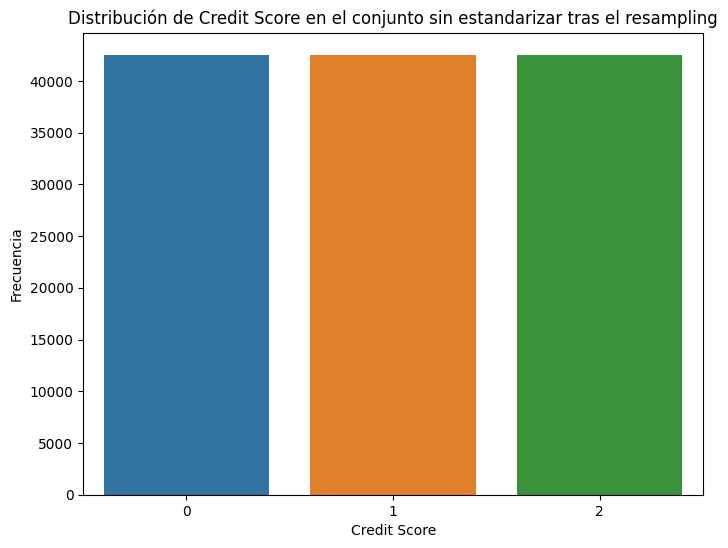

In [244]:
# Se crea un DataFrame con las clases resampleadas
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Distribución de la variable objetivo después del resampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x='Credit_Score')
plt.title('Distribución de Credit Score en el conjunto sin estandarizar tras el resampling')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')
plt.show()


# Aplicacion de SMOTE al conjunto estandarizado

Dimensiones de los conjuntos estandarizados tras aplicar SMOTE:

Conjunto X_Train_resampled_stand: (127617, 19)
Conjunto y_Train_resampled_stand: (127617,)


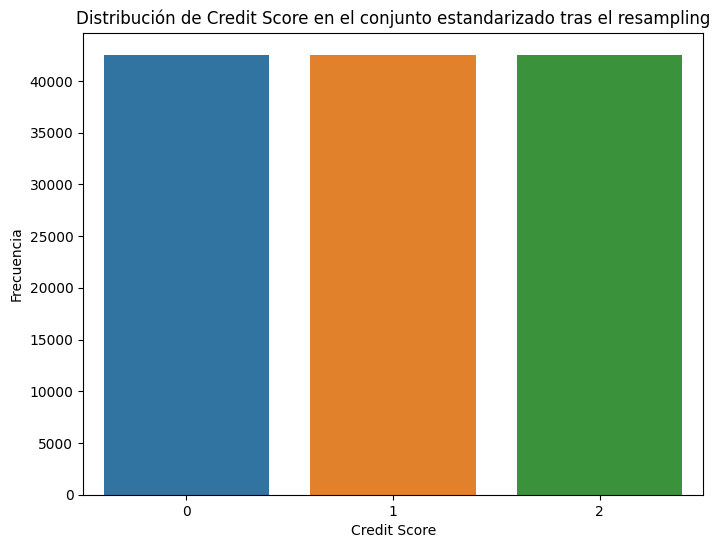

In [245]:
# Smote
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled_stand, y_train_resampled_stand = smote.fit_resample(df_credit_score_standardized_train,y_train)
print("Dimensiones de los conjuntos estandarizados tras aplicar SMOTE:\n")
print("Conjunto X_Train_resampled_stand: "+str(X_train_resampled_stand.shape))
print("Conjunto y_Train_resampled_stand: "+str(y_train_resampled_stand.shape))

# Se crea un DataFrame con las clases resampleadas
df_resampled_stand = pd.concat([X_train_resampled_stand, y_train_resampled_stand], axis=1)

# Distribución de la variable objetivo después del resampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled_stand, x='Credit_Score')
plt.title('Distribución de Credit Score en el conjunto estandarizado tras el resampling')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')
plt.show()

# Random Forest sin datos estandarizados (tras aplicar SMOTE)

In [246]:
# Se crea clasificador
rf_model = RandomForestClassifier(random_state=24)

In [247]:
# Se definen los distintos valores de los hiperparámetros max_depth, n_estimators y min_samples_split
grid_values = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

# Se aplica grid search (Random Forest)
model_rf_2 = grid_search_model(rf_model,grid_values,2,X_train_resampled,y_train_resampled)

In [248]:
# Obtener el mejor modelo
best_model_rf_2 = model_rf_2.best_estimator_

In [249]:
best_params = model_rf_2.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_rf_2.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")


-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 85.51 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
 con un valor del 85.51
-----------------------------------------------------------------------------------------------------------------------------------


In [250]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_rf_2.predict(X_train_resampled)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_rf_2.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled,pred_Y_train)
print("El accuracy obtenido del modelo del Random Forest sin stand en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del Random Forest sin stand en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_rf_2 = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_rf_2 = json.dumps(report_rf_2, indent=4)
print('Classification Report:\n', report_rf_2)

El accuracy obtenido del modelo del Random Forest sin stand en el conjunto de train es del 100.0%
El accuracy obtenido del modelo del Random Forest sin stand en el conjunto de test es de 81.33%

Accuracy: 0.8133
Classification Report:
 {
    "0": {
        "precision": 0.7902053712480253,
        "recall": 0.8625625107777203,
        "f1-score": 0.8248000659576222,
        "support": 5799
    },
    "1": {
        "precision": 0.8514060287274934,
        "recall": 0.7914433474377057,
        "f1-score": 0.8203303932556893,
        "support": 10635
    },
    "2": {
        "precision": 0.7523784355179705,
        "recall": 0.7983735277621985,
        "f1-score": 0.7746938775510204,
        "support": 3566
    },
    "accuracy": 0.8133,
    "macro avg": {
        "precision": 0.797996611831163,
        "recall": 0.8174597953258749,
        "f1-score": 0.8066081122547774,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.8160042782220637,
        "recall": 0.81

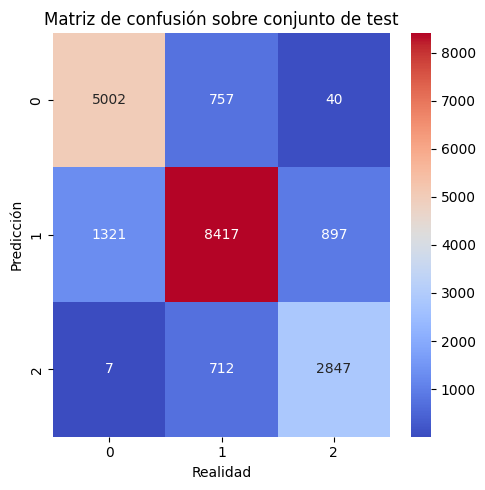

In [251]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Shap Values

In [252]:
# Fuente: https://shap-lrjball.readthedocs.io/en/latest/api.html#plots

# Se crea un objeto explainer para el modelo
#explainer_model_rf = shap.Explainer(best_model_rf_2)

# Se calculan los valores SHAP para el conjunto de datos de prueba
#shap_values_model_rf = explainer_model_rf.shap_values(df_credit_score_cleaned_encoded_test)

In [253]:
# Gráfico resumen
#shap.summary_plot(shap_values_model_rf, df_credit_score_cleaned_encoded_test,class_names=["Poor", "Standard", "Good"],plot_size=None)

In [254]:
# Primer Gráfico resumen 
#shap.summary_plot(shap_values_model_rf[0], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)


In [255]:
# Segundo Gráfico resumen 
#shap.summary_plot(shap_values_model_rf[1], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

In [256]:
# Tercer Gráfico resumen 
#shap.summary_plot(shap_values_model_rf[2], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

# Random Forest con datos estandarizados (tras aplicar SMOTE)

In [257]:
# Se crea clasificador
rf_model = RandomForestClassifier(random_state=24)

In [258]:

# Se definen los distintos valores de los hiperparámetros max_depth, n_estimators y min_samples_split
grid_values = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]  
}

# Se aplica grid search (Random Forest)
model_rf_3 = grid_search_model(rf_model,grid_values,2,X_train_resampled_stand,y_train_resampled_stand)

# Obtener el mejor modelo
best_model_rf_3 = model_rf_3.best_estimator_

In [259]:
best_params = model_rf_3.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_rf_3.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 86.97 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
 con un valor del 86.97
-----------------------------------------------------------------------------------------------------------------------------------


In [260]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_rf_3.predict(X_train_resampled_stand)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_rf_3.predict(df_credit_score_standardized_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled_stand,pred_Y_train)
print("El accuracy obtenido del modelo del Random Forest stand en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del Random Forest stand en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_rf_3 = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_rf_3 = json.dumps(report_rf_3, indent=4)
print('Classification Report:\n', report_rf_3)

El accuracy obtenido del modelo del Random Forest stand en el conjunto de train es del 100.0%
El accuracy obtenido del modelo del Random Forest stand en el conjunto de test es de 81.64%

Accuracy: 0.81635
Classification Report:
 {
    "0": {
        "precision": 0.7891453524641298,
        "recall": 0.8725642352129678,
        "f1-score": 0.828760953238883,
        "support": 5799
    },
    "1": {
        "precision": 0.8544290938642828,
        "recall": 0.7908791725434885,
        "f1-score": 0.8214268274818106,
        "support": 10635
    },
    "2": {
        "precision": 0.7628205128205128,
        "recall": 0.8008973639932697,
        "f1-score": 0.7813953488372093,
        "support": 3566
    },
    "accuracy": 0.81635,
    "macro avg": {
        "precision": 0.8021316530496417,
        "recall": 0.8214469239165753,
        "f1-score": 0.8105277098526343,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.8191662630452042,
        "recall": 0.81635,
 

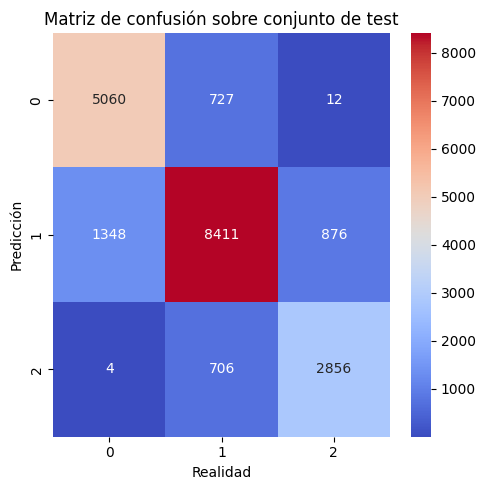

In [261]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# SVM con datos estandarizados (tras aplicar SMOTE)


In [262]:
# Se crea el clasificador con kernel radial
svm_model = SVC(decision_function_shape='ovr',random_state=24,kernel = 'rbf')

In [263]:
# Se definen los distintos valores de los hiperparámetros C y gama
C = [0.001,0.01, 0.1]
gamma = [0.001,0.01,0.1]


# Grid values
grid_values = {'C': C,
               'gamma':gamma
}

# Se aplica grid search (SVM)
model_svm = grid_search_model(svm_model,grid_values,3,X_train_resampled_stand,y_train_resampled_stand)

In [264]:
# Obtener el mejor modelo
best_model_svm_stand = model_svm.best_estimator_

In [265]:
best_params = model_svm.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_svm.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'C': 0.1, 'gamma': 0.1}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 73.42 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'C': 0.1, 'gamma': 0.1}
 con un valor del 73.42
-----------------------------------------------------------------------------------------------------------------------------------


In [266]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_svm_stand.predict(X_train_resampled_stand)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_svm_stand.predict(df_credit_score_standardized_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled_stand,pred_Y_train)
print("El accuracy obtenido del modelo del SVM estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del SVM estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_svm = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_svm = json.dumps(report_svm, indent=4)
print('Classification Report:\n', report_svm)

El accuracy obtenido del modelo del SVM estandarizado en el conjunto de train es del 73.97%
El accuracy obtenido del modelo del SVM estandarizado en el conjunto de test es de 67.38%

Accuracy: 0.67375
Classification Report:
 {
    "0": {
        "precision": 0.6348346636259977,
        "recall": 0.7680634592171064,
        "f1-score": 0.6951229028482248,
        "support": 5799
    },
    "1": {
        "precision": 0.8586305278174037,
        "recall": 0.5659614480488951,
        "f1-score": 0.6822329271748371,
        "support": 10635
    },
    "2": {
        "precision": 0.502510880482089,
        "recall": 0.8418395961862031,
        "f1-score": 0.6293501048218029,
        "support": 3566
    },
    "accuracy": 0.67375,
    "macro avg": {
        "precision": 0.6653253573084968,
        "recall": 0.7252881678174016,
        "f1-score": 0.6689019782816216,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.730244783875219,
        "recall": 0.67375,
      

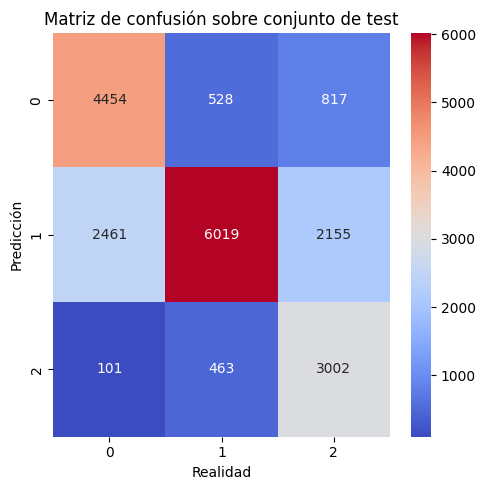

In [267]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# SVM sin datos estandarizados (tras aplicar SMOTE)

In [268]:
# Se crea el clasificador con kernel radial
svm_model = SVC(decision_function_shape='ovr',random_state=24,kernel = 'rbf')

In [269]:
# Se definen los distintos valores de los hiperparámetros C y gama
C = [0.001,0.01, 0.1]
gamma = [0.001,0.01,0.1]


# Grid values
grid_values = {'C': C,
               'gamma':gamma
}

# Se aplica grid search (SVM)
model_svm_2 = grid_search_model(svm_model,grid_values,3,X_train_resampled,y_train_resampled)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [270]:
# Obtener el mejor modelo
best_model_svm = model_svm_2.best_estimator_

In [271]:
best_params = model_svm_2.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_svm_2.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'C': 0.1, 'gamma': 0.001}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 47.93 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'C': 0.1, 'gamma': 0.001}
 con un valor del 47.93
-----------------------------------------------------------------------------------------------------------------------------------


In [272]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_svm.predict(X_train_resampled)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_svm.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled,pred_Y_train)
print("El accuracy obtenido del modelo del SVM no estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del modelo del SVM no estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_svm_2 = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_svm_2 = json.dumps(report_svm_2, indent=4)
print('Classification Report:\n', report_svm_2)

El accuracy obtenido del modelo del SVM no estandarizado en el conjunto de train es del 58.23%
El accuracy obtenido del modelo del SVM no estandarizado en el conjunto de test es de 58.56%

Accuracy: 0.58555
Classification Report:
 {
    "0": {
        "precision": 0.8095238095238095,
        "recall": 0.18175547508191067,
        "f1-score": 0.29685959723982536,
        "support": 5799
    },
    "1": {
        "precision": 0.5644744794242075,
        "recall": 0.9660554771979314,
        "f1-score": 0.712581495353031,
        "support": 10635
    },
    "2": {
        "precision": 0.7706237424547284,
        "recall": 0.1074032529444756,
        "f1-score": 0.188530642382476,
        "support": 3566
    },
    "accuracy": 0.58555,
    "macro avg": {
        "precision": 0.7148740104675818,
        "recall": 0.41840473507477255,
        "f1-score": 0.3993239116584441,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.6722829462849289,
        "recall": 0.5855

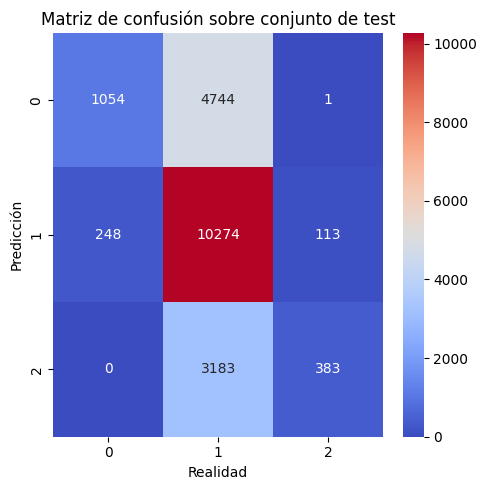

In [273]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# XGBoost con datos estandarizados (tras aplicar SMOTE)

In [274]:
# Se crea clasificador
xgb_model = xgb.XGBClassifier()

In [275]:
# Se definen los distintos valores de los hiperparámetros 
grid_values = { 'n_estimators': [50, 100, 200],
    'objective': ['multi:softmax'],# Función objetivo: clasificación multiclase
    'num_class':[3],
    'eval_metric': ['mlogloss'],# Métrica: clasificación multiclase
    'max_depth': [None, 10, 20],
     'learning_rate': [0.1, 0.01, 0.001]
}

# Se aplica grid search (XG Boosting)
model_xgb = grid_search_model(xgb_model,grid_values,4,X_train_resampled_stand,y_train_resampled_stand)

# Obtener el mejor modelo
best_model_xgb_stand = model_xgb.best_estimator_

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [276]:
best_params = model_xgb.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_xgb.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'num_class': 3, 'objective': 'multi:softmax'}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 87.8 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'num_class': 3, 'objective': 'multi:softmax'}
 con un valor del 87.8
-----------------------------------------------------------------------------------------------------------------------------------


In [277]:

# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_xgb_stand.predict(X_train_resampled_stand)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_xgb_stand.predict(df_credit_score_standardized_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled_stand,pred_Y_train)
print("El accuracy obtenido del eXtreme Gradient Boost estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del eXtreme Gradient Boost estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_xgb = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_xgb = json.dumps(report_xgb, indent=4)
print('Classification Report:\n', report_xgb)


El accuracy obtenido del eXtreme Gradient Boost estandarizado en el conjunto de train es del 99.98%
El accuracy obtenido del eXtreme Gradient Boost estandarizado en el conjunto de test es de 80.58%

Accuracy: 0.80575
Classification Report:
 {
    "0": {
        "precision": 0.7914290369887568,
        "recall": 0.8375581996896017,
        "f1-score": 0.8138404825737265,
        "support": 5799
    },
    "1": {
        "precision": 0.8320910160847391,
        "recall": 0.7977433004231311,
        "f1-score": 0.8145552301857807,
        "support": 10635
    },
    "2": {
        "precision": 0.7564766839378239,
        "recall": 0.7779024116657319,
        "f1-score": 0.76703995575833,
        "support": 3566
    },
    "accuracy": 0.80575,
    "macro avg": {
        "precision": 0.7933322456704399,
        "recall": 0.8044013039261548,
        "f1-score": 0.7984785561726123,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.806819039824064,
        "recall": 

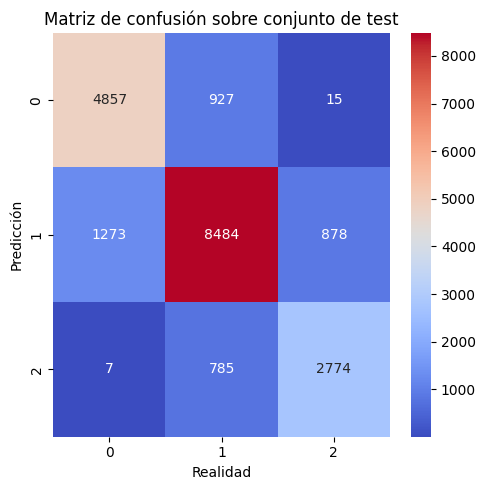

In [278]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# XGBoost sin datos estandarizados (tras aplicar SMOTE)

In [279]:
# Se crea clasificador
xgb_model = xgb.XGBClassifier()

In [280]:
# Se definen los distintos valores de los hiperparámetros 
grid_values = { 'n_estimators': [50, 100, 200],
    'objective': ['multi:softmax'],# Función objetivo: clasificación multiclase
    'num_class':[3],
    'eval_metric': ['mlogloss'],# Métrica: clasificación multiclase
    'max_depth': [None, 10, 20],
     'learning_rate': [0.1, 0.01, 0.001]
}

# Se aplica grid search (XG Boosting)
model_xgb_2 = grid_search_model(xgb_model,grid_values,4,X_train_resampled,y_train_resampled)

# Obtener el mejor modelo
best_model_xgb = model_xgb_2.best_estimator_

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is req

In [281]:
best_params = model_xgb_2.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_xgb_2.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_class': 3, 'objective': 'multi:softmax'}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 86.92 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_class': 3, 'objective': 'multi:softmax'}
 con un valor del 86.92
-----------------------------------------------------------------------------------------------------------------------------------


In [282]:

# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_xgb.predict(X_train_resampled)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_xgb.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled,pred_Y_train)
print("El accuracy obtenido del eXtreme Gradient Boost no estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido del eXtreme Gradient Boost no estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_xgb_2 = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_xgb_2 = json.dumps(report_xgb_2, indent=4)
print('Classification Report:\n', report_xgb_2)


El accuracy obtenido del eXtreme Gradient Boost no estandarizado en el conjunto de train es del 100.0%
El accuracy obtenido del eXtreme Gradient Boost no estandarizado en el conjunto de test es de 80.2%

Accuracy: 0.80205
Classification Report:
 {
    "0": {
        "precision": 0.7878391631252043,
        "recall": 0.8311777892740128,
        "f1-score": 0.808928421582613,
        "support": 5799
    },
    "1": {
        "precision": 0.8290405033425089,
        "recall": 0.792947813822285,
        "f1-score": 0.8105925890325372,
        "support": 10635
    },
    "2": {
        "precision": 0.7514824797843666,
        "recall": 0.7818283791362871,
        "f1-score": 0.7663551401869159,
        "support": 3566
    },
    "accuracy": 0.80205,
    "macro avg": {
        "precision": 0.7894540487506932,
        "recall": 0.8019846607441949,
        "f1-score": 0.7952920502673554,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.8032655791460845,
        "rec

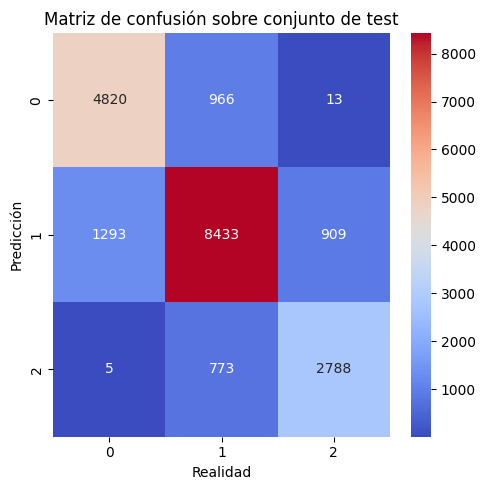

In [283]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Shap Values

In [284]:
# Fuente: https://shap-lrjball.readthedocs.io/en/latest/api.html#plots

# Se crea un objeto explainer para el modelo
#explainer_model_xgb = shap.Explainer(best_model_xgb)

# Se calculan los valores SHAP para el conjunto de datos de prueba
#shap_values_model_xgb = explainer_model_xgb.shap_values(df_credit_score_cleaned_encoded_test)

In [285]:
# Gráfico resumen
#shap.summary_plot(shap_values_model_xgb, df_credit_score_cleaned_encoded_test,class_names=["Poor", "Standard", "Good"],plot_size=None)

In [286]:
# Primer Gráfico resumen 
#shap.summary_plot(shap_values_model_xgb[0], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

In [287]:
# Segundo Gráfico resumen 
#shap.summary_plot(shap_values_model_xgb[1], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

In [288]:
# Tercer Gráfico resumen 
#shap.summary_plot(shap_values_model_xgb[2], df_credit_score_cleaned_encoded_test,show=False,plot_size=None)

# Regresion Logistica Multinomial con datos estandarizados (tras aplicar SMOTE)

In [289]:
# Modelo de regresión logística multinomial
lr_mn_model = LogisticRegression(max_iter=1000)

In [290]:
# Se definen los distintos valores de los hiperparámetros 
grid_values = { 
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs', 'liblinear','newton-cg', 'sag']
}

# Se aplica grid search (Regresión Logística)
model_lr_mn = grid_search_model(lr_mn_model,grid_values,4,X_train_resampled_stand,y_train_resampled_stand)

# Obtener el mejor modelo
best_model_lr_mn_stand = model_lr_mn.best_estimator_

/opt/conda/lib/python3.10/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model

In [291]:
best_params = model_lr_mn.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_lr_mn.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 70.94 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
 con un valor del 70.94
-----------------------------------------------------------------------------------------------------------------------------------


In [292]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_lr_mn_stand.predict(X_train_resampled_stand)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_lr_mn_stand.predict(df_credit_score_standardized_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled_stand,pred_Y_train)
print("El accuracy obtenido de la regresión logística multinomial estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido de la regresión logística multinomial estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_lr_mn = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print("\n"+f'Accuracy: {accuracy_result_test}')
report_lr_mn = json.dumps(report_lr_mn, indent=4)
print('Classification Report:\n', report_lr_mn)


El accuracy obtenido de la regresión logística multinomial estandarizado en el conjunto de train es del 70.91%
El accuracy obtenido de la regresión logística multinomial estandarizado en el conjunto de test es de 65.22%

Accuracy: 0.65225
Classification Report:
 {
    "0": {
        "precision": 0.6157772621809745,
        "recall": 0.686497672012416,
        "f1-score": 0.6492172211350294,
        "support": 5799
    },
    "1": {
        "precision": 0.8160704751735184,
        "recall": 0.5748942172073342,
        "f1-score": 0.6745738401279859,
        "support": 10635
    },
    "2": {
        "precision": 0.48816812841303986,
        "recall": 0.8272574312955693,
        "f1-score": 0.6140077011135394,
        "support": 3566
    },
    "accuracy": 0.65225,
    "macro avg": {
        "precision": 0.6400052885891776,
        "recall": 0.6962164401717731,
        "f1-score": 0.645932920792185,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.699530469638

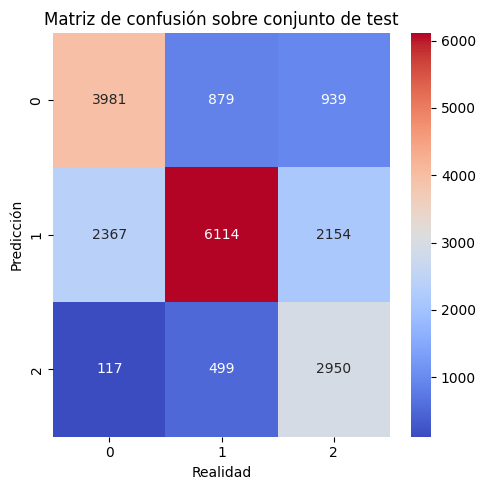

In [293]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Regresion Logistica Multinomial sin datos estandarizados (tras aplicar SMOTE)

In [294]:
# Modelo de regresión logística multinomial
lr_mn_model = LogisticRegression(max_iter=1000)

In [295]:
# Se definen los distintos valores de los hiperparámetros 
grid_values = { 
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs', 'liblinear','newton-cg', 'sag']
}

# Se aplica grid search (Regresión Logística)
model_lr_mn_2 = grid_search_model(lr_mn_model,grid_values,4,X_train_resampled,y_train_resampled)

# Obtener el mejor modelo
best_model_lr_mn = model_lr_mn_2.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [296]:
best_params = model_lr_mn_2.best_params_
print("-----------------------------------------------------------------------------------------------------")
print("Mejor hiperparámetro encontrado: "+str(best_params))
print("-----------------------------------------------------------------------------------------------------\n")

best_score = round(model_lr_mn_2.best_score_*100,2)
print("--------------------------------------")
print("Mejor Score promedio obtenido: "+str(best_score)+ " %")
print("--------------------------------------\n")

print("-----------------------------------------------------------------------------------------------------------------------------------")
print("Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: "+str(best_params)+"\n con un valor del "+str(best_score))
print("-----------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
Mejor hiperparámetro encontrado: {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
-----------------------------------------------------------------------------------------------------

--------------------------------------
Mejor Score promedio obtenido: 71.09 %
--------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------
Mejor resultado obtenido: El mejor score promedio se obtiene para los hiperparámetros: {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
 con un valor del 71.09
-----------------------------------------------------------------------------------------------------------------------------------


In [297]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = best_model_lr_mn.predict(X_train_resampled)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = best_model_lr_mn.predict(df_credit_score_cleaned_encoded_test)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train_resampled,pred_Y_train)
print("El accuracy obtenido de la regresión logística multinomial no estandarizado en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test)
print("El accuracy obtenido de la regresión logística multinomial no estandarizado en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_lr_mn_2 = classification_report(y_test, pred_Y_test,output_dict=True)

# Imprimir resultados
print(f'Accuracy: {accuracy_result_test}')
report_lr_mn_2 = json.dumps(report_lr_mn_2, indent=4)
print('Classification Report:\n', report_lr_mn_2)


El accuracy obtenido de la regresión logística multinomial no estandarizado en el conjunto de train es del 71.12%
El accuracy obtenido de la regresión logística multinomial no estandarizado en el conjunto de test es de 65.34%
Accuracy: 0.65345
Classification Report:
 {
    "0": {
        "precision": 0.615988909426987,
        "recall": 0.6896016554578376,
        "f1-score": 0.6507200390529655,
        "support": 5799
    },
    "1": {
        "precision": 0.8163728632478633,
        "recall": 0.574800188058298,
        "f1-score": 0.6746123710202505,
        "support": 10635
    },
    "2": {
        "precision": 0.49119601328903656,
        "recall": 0.8292204150308469,
        "f1-score": 0.616941372835385,
        "support": 3566
    },
    "accuracy": 0.65345,
    "macro avg": {
        "precision": 0.641185928654629,
        "recall": 0.6978740861823275,
        "f1-score": 0.647424594302867,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.7002925034

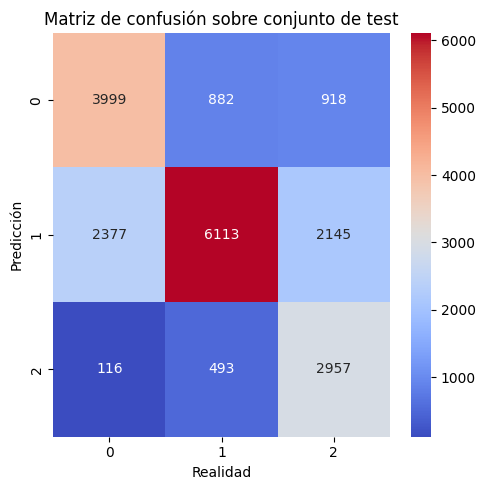

In [298]:
# Cálculo de las matrices de confusión
confusion_test = confusion_matrix(y_test,pred_Y_test) 
#confusion_train = confusion_matrix(y_train_resampled,pred_Y_train)

# Visualización de la matriz de confusión
plot_confusion_matrix_train_test(confusion_test)

# Redes Neuronales

In [299]:
# Crear el modelo MLP
model = Sequential()

model.add(Dense(1024, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))  # 3 clases, softmax para la clasificación multiclase

model.summary()

# Compilar el modelo
model.compile(loss='SparseCategoricalCrossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenamiento de la red
stopping =  EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              20480     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [300]:
# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled,  # tus características
    y_train_resampled,  # tus etiquetas
    test_size=0.2,      # proporción para validación
    random_state=42     # semilla para reproducibilidad
)

# Verificar las formas de los subconjuntos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (102093, 19)
Forma de X_val: (25524, 19)
Forma de y_train: (102093,)
Forma de y_val: (25524,)


In [301]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[stopping],validation_data=(X_val, y_val))

Epoch 1/100
3191/3191 [==============================] - 26s 6ms/step - loss: 0.9262 - accuracy: 0.5902 - val_loss: 0.7988 - val_accuracy: 0.6756
Epoch 2/100
3191/3191 [==============================] - 19s 6ms/step - loss: 0.8096 - accuracy: 0.6606 - val_loss: 0.7714 - val_accuracy: 0.6809
Epoch 3/100
3191/3191 [==============================] - 19s 6ms/step - loss: 0.7937 - accuracy: 0.6705 - val_loss: 0.7654 - val_accuracy: 0.6944
Epoch 4/100
3191/3191 [==============================] - 20s 6ms/step - loss: 0.7848 - accuracy: 0.6755 - val_loss: 0.7477 - val_accuracy: 0.6951
Epoch 5/100
3191/3191 [==============================] - 20s 6ms/step - loss: 0.7822 - accuracy: 0.6775 - val_loss: 0.7689 - val_accuracy: 0.6899
Epoch 6/100
3191/3191 [==============================] - 19s 6ms/step - loss: 0.7768 - accuracy: 0.6796 - val_loss: 0.7494 - val_accuracy: 0.6987
Epoch 7/100
3191/3191 [==============================] - 20s 6ms/step - loss: 0.7737 - accuracy: 0.6795 - val_loss: 0.7529 -

In [302]:
# Plot del training loss y el accuracy
def plot_training_loss_accuracy(model):
  # Se representan ambas gráficas
  fig, ax = plt.subplots(1, 2, figsize=(16, 5))

  # Accuracy
  ax[0].plot(model.history.history['val_accuracy'],label='validation')
  ax[0].plot(model.history.history['accuracy'],label='training') 
  ax[0].set_title('Model Accuracy')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epochs')
  ax[0].legend()

  # Loss 
  ax[1].plot(model.history.history['val_loss'],label='validation') 
  ax[1].plot(model.history.history['loss'],label='training') 
  ax[1].set_title('Model Loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epochs')
  ax[1].legend()
    
  plt.show()

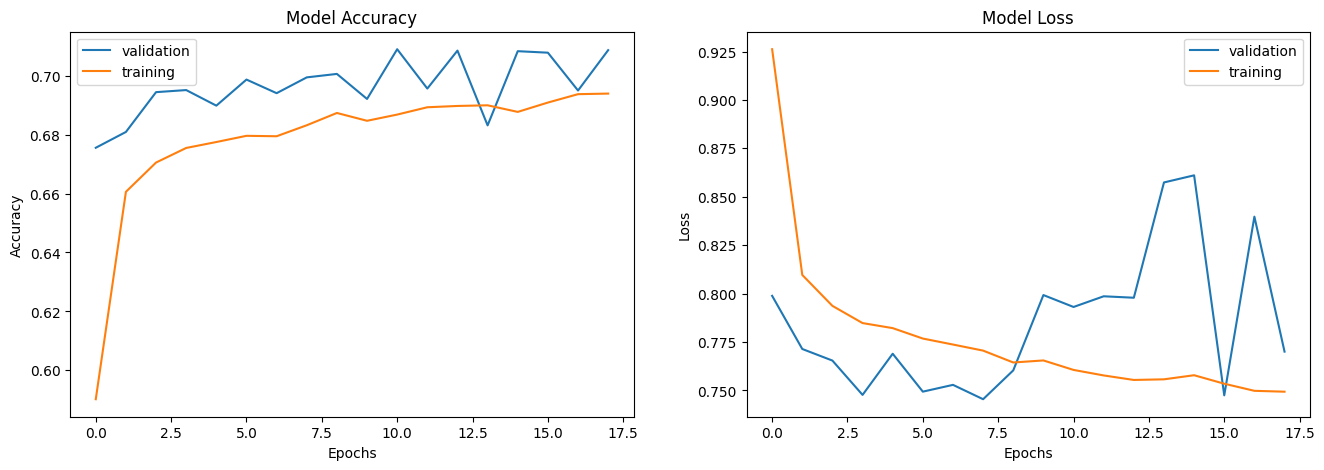

In [303]:
# Plot del training loss y el accuracy
plot_training_loss_accuracy(model)

In [304]:
# Predecimos la variable respuesta del modelo con el conjunto de train
pred_Y_train = model.predict(X_train)
pred_Y_train_classes = np.argmax(pred_Y_train, axis=1)

# Predecimos la variable respuesta del modelo con el conjunto de test
pred_Y_test = model.predict(df_credit_score_cleaned_encoded_test)
pred_Y_test_classes = np.argmax(pred_Y_test, axis=1)

# Se calcula el accuracy en el conjunto de train
accuracy_result_train = accuracy_score(y_train,pred_Y_train_classes)
print("El accuracy obtenido de la red neuronal en el conjunto de train es del "+str(np.round(accuracy_result_train*100,2))+"%")

# Se calcula el accuracy en el conjunto de test
accuracy_result_test = accuracy_score(y_test,pred_Y_test_classes)
print("El accuracy obtenido de la red neuronal en el conjunto de test es de "+str(np.round(accuracy_result_test*100,2))+"%")

# Evaluar el rendimiento del modelo
report_mlp = classification_report(y_test, pred_Y_test_classes,output_dict=True)

# Imprimir resultados
print(f'Accuracy: {accuracy_result_test}')
report_mlp = json.dumps(report_mlp, indent=4)
print('Classification Report:\n', report_mlp)

625/625 [==============================] - 1s 2ms/step
El accuracy obtenido de la red neuronal en el conjunto de train es del 70.41%
El accuracy obtenido de la red neuronal en el conjunto de test es de 62.17%
Accuracy: 0.62165
Classification Report:
 {
    "0": {
        "precision": 0.6204453441295547,
        "recall": 0.7399551646835661,
        "f1-score": 0.6749508454581203,
        "support": 5799
    },
    "1": {
        "precision": 0.8339477480365444,
        "recall": 0.48923366243535493,
        "f1-score": 0.6166883963494133,
        "support": 10635
    },
    "2": {
        "precision": 0.4293644996347699,
        "recall": 0.8241727425687044,
        "f1-score": 0.5645951397560273,
        "support": 3566
    },
    "accuracy": 0.62165,
    "macro avg": {
        "precision": 0.6279191972669563,
        "recall": 0.6844538565625419,
        "f1-score": 0.6187447938545203,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.6999055328336763,
    

# Guardado del modelo

In [305]:
# Cargar modelo

print(type(best_model_dt))
# Guardar el modelo en un archivo joblib
file_name_best_model_dt = 'best_model_dt.joblib'
joblib.dump(best_model_dt, file_name_best_model_dt)

#modelo_cargado = joblib.load('/kaggle/input/model-dt-trained-tar-gz/best_model_dt.joblib')
#print(type(modelo_cargado))

# Cargar modelo
modelo_cargado = joblib.load('/kaggle/input/model-trained-dt/best_model_dt_2.joblib')
print(type(modelo_cargado))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
